In [ ]:
from classes import ethData, models

In [ ]:
ethData = ethData.ethData()

In [ ]:
ETHERSCAN_API_KEY = 'EWYSGQ5PEK84PRCNSCKHHZWJIWWKYYABCE'

In [ ]:
ethData.importAllDEX(ETHERSCAN_API_KEY, 100, 0, 10) #2-4 HOURS

In [ ]:
ethData.importTransactionsFromUsersDex(ETHERSCAN_API_KEY) #24-48 HOURS

In [ ]:
import pandas as pd

In [ ]:
transactionsFromUsersDex = pd.read_csv('export/CUSTOMERS_TRANSACTIONS_FROM_DEX.csv')

In [ ]:
transactionsFromUsersDex.set_index(transactionsFromUsersDex['from'])
transactionsFromUsersDex.rename(columns={'from':'fromAddress'}, inplace=True)
transactionsFromUsersDex.rename(columns={'to':'toAddress'}, inplace=True)

In [ ]:
customerList = pd.read_csv('export/CUSTOMERS_LIST_FROM_DEX.csv')
customerList.rename(columns={'from':'fromAddress'}, inplace=True)

In [ ]:
sql = "Select a.*, b.fromAddress as r_fromAddress From transactionsFromUsersDex a Left Join customerList b on a.fromAddress = b.fromAddress"

In [ ]:
import pandasql as psql
import numpy as np

In [ ]:
print("Defining In/Out Data...")
df = psql.sqldf(sql)
#print("Defined In/Out Data")

In [ ]:
sql = 'Select *, case when r_fromAddress IS NULL then "IN" else "OUT" end as IN_OUT from df'
#sql = 'Select * from df where LENGTH(r_fromAddress) > 0'
df = psql.sqldf(sql)

In [ ]:
df

In [ ]:
df['fromAddress'] = df['fromAddress'].str.upper()
df['toAddress'] = df['toAddress'].str.upper()

In [ ]:
for dex in range(0, ethData.getNumberContractAddressMap() + 1):
    print(ethData.getContractAddressMap(dex)[0])

In [ ]:
dexList = []
caseWhenStatement_IN = []
caseWhenStatement_OUT = []
for dexIndex in range(0, ethData.getNumberContractAddressMap() + 1):
    name = ethData.getContractAddressMap(dexIndex)[0]
    address = ethData.getContractAddressMap(dexIndex)[1]
    df[name + '_IN'] = np.where(df['fromAddress'] == address.upper(), True, False)
    dexList.append(name + '_IN')
    df[name + '_OUT'] = np.where(df['toAddress'] == address.upper(), True, False)
    dexList.append(name + '_OUT')
    caseWhenStatement_IN.append("WHEN {0} = 1 THEN '{0}'".format(name + '_IN'))
    caseWhenStatement_OUT.append("WHEN {0} = 1 THEN '{0}'".format(name + '_OUT'))
dexList = ", ".join(dexList)
caseWhenStatement_IN = " ".join(caseWhenStatement_IN)
caseWhenStatement_OUT = " ".join(caseWhenStatement_OUT)

In [ ]:
sql = "Select {0},SUM(value / 1000000000000000000)  AS SUM_ETH, count(*) as cnt from df GROUP BY {0}".format(dexList)
report_df = psql.sqldf(sql)

In [ ]:
sql = "Select {0},SUM(value / 1000000000000000000)  AS SUM_ETH, count(*) as cnt from df GROUP BY {0}".format(dexList)
report_df = psql.sqldf(sql)
report_df['cnt_perc'] = round(report_df['cnt'] / len(df) * 100, 6)
sql = 'WITH TMP AS (SELECT  \
       CASE {0} ELSE "" END AS DEX_IN, \
       CASE {1} ELSE "" END AS DEX_OUT, \
       SUM_ETH, CNT, CNT_PERC, SUM_ETH / CNT AS AVG_VOL_DEX \
       FROM report_df \
       ORDER BY CNT DESC) \
       SELECT \
       CASE WHEN DEX_IN = "" AND DEX_OUT = "" THEN "NO_DEX" ELSE DEX_IN || " " || DEX_OUT END AS IS_TX_DEX \
       , * FROM TMP'.format(caseWhenStatement_IN, caseWhenStatement_OUT)
report_df_tmp = psql.sqldf(sql)
import matplotlib.pyplot as plt
report_df_tmp.plot(kind='bar',x='IS_TX_DEX',y='CNT_PERC', figsize = (16,8))
report_df_tmp.plot(kind='bar',x='IS_TX_DEX',y='SUM_ETH', figsize = (16,8))

In [ ]:
sql = 'WITH TMP AS (SELECT  \
       CASE {0} ELSE "" END AS DEX_IN, \
       CASE {1} ELSE "" END AS DEX_OUT, \
       SUM_ETH, CNT, CNT_PERC, SUM_ETH / CNT AS AVG_VOL_DEX \
       FROM report_df \
       ORDER BY CNT DESC) \
       SELECT \
       CASE WHEN DEX_IN = "" AND DEX_OUT = "" THEN "NO_DEX" ELSE DEX_IN || " " || DEX_OUT END AS IS_TX_DEX \
       , * FROM TMP'.format(caseWhenStatement_IN, caseWhenStatement_OUT)
print(sql)


In [ ]:
report_df_tmp = psql.sqldf(sql)


In [ ]:
report_df_tmp

In [ ]:
import matplotlib.pyplot as plt
report_df_tmp.plot(kind='bar',x='IS_TX_DEX',y='CNT_PERC', figsize = (16,8))
report_df_tmp.plot(kind='bar',x='IS_TX_DEX',y='SUM_ETH', figsize = (16,8))

In [ ]:
#CAN BE USEFUL TO WRITE THE MIN-MAX BLOCK OF EACH DEX
#TO KNOW HOW MANY DEX AN ADDRESS IS USING SHOWING CNT SUMETH AND SO ON


In [1]:
from classes import ethData, models 
m = models.models()

In [2]:
from os import listdir
from os.path import isfile, join
import os.path
from os import path
import pandas as pd
import math
import pickle

In [3]:
MODELS_FOLDER = 'data/cryptoStock'
model_files = [f for f in listdir(MODELS_FOLDER) if isfile(join(MODELS_FOLDER, f))]

Epoch 1/10
1382/1382 [==============================] - 43s 28ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0301 - mape: 46594.4913
Epoch 2/10
1382/1382 [==============================] - 39s 28ms/step - loss: 9.1101e-04 - mse: 9.1101e-04 - mae: 0.0165 - mape: 21419.0270
Epoch 3/10
1382/1382 [==============================] - 39s 28ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0196 - mape: 259.5588
Epoch 4/10
1382/1382 [==============================] - 38s 28ms/step - loss: 7.8141e-04 - mse: 7.8141e-04 - mae: 0.0137 - mape: 34424.3989
Epoch 5/10
1382/1382 [==============================] - 39s 28ms/step - loss: 3.9074e-04 - mse: 3.9074e-04 - mae: 0.0114 - mape: 13020.8863
Epoch 6/10
1382/1382 [==============================] - 34s 25ms/step - loss: 4.4135e-04 - mse: 4.4135e-04 - mae: 0.0117 - mape: 8056.2641
Epoch 7/10
1382/1382 [==============================] - 38s 28ms/step - loss: 5.2190e-04 - mse: 5.2190e-04 - mae: 0.0122 - mape: 779.3214
Epoch 8/10
1382/1382 [===================

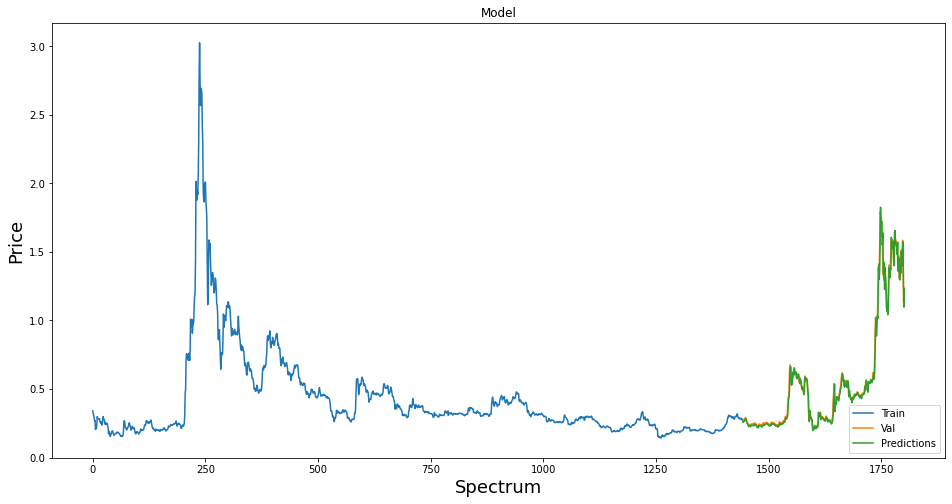

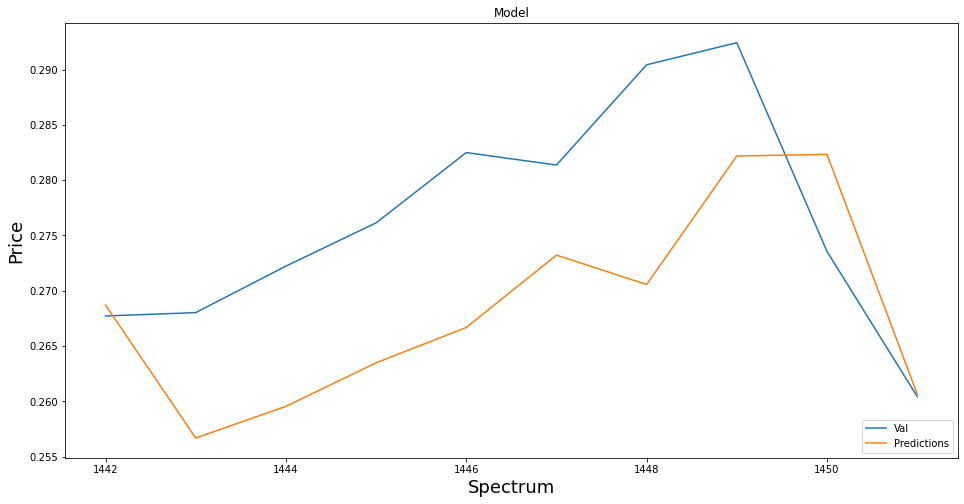

INFO:tensorflow:Assets written to: models/model_crypto_xrpusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_xrpusd/assets


Error on xrpusd!
Error on oxyust!
Error on waxusd!
Epoch 1/10
333/333 [==============================] - 13s 28ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0273 - mape: 822.9674
Epoch 2/10
333/333 [==============================] - 9s 28ms/step - loss: 6.3111e-04 - mse: 6.3111e-04 - mae: 0.0173 - mape: 17286.9447
Epoch 3/10
333/333 [==============================] - 9s 29ms/step - loss: 4.7294e-04 - mse: 4.7294e-04 - mae: 0.0142 - mape: 45790.3923
Epoch 4/10
333/333 [==============================] - 9s 28ms/step - loss: 7.3549e-04 - mse: 7.3549e-04 - mae: 0.0207 - mape: 96886.7451
Epoch 5/10
333/333 [==============================] - 9s 28ms/step - loss: 3.3779e-04 - mse: 3.3779e-04 - mae: 0.0130 - mape: 7759.6744
Epoch 6/10
333/333 [==============================] - 10s 30ms/step - loss: 3.5262e-04 - mse: 3.5262e-04 - mae: 0.0143 - mape: 41949.8416
Epoch 7/10
333/333 [==============================] - 9s 26ms/step - loss: 2.7601e-04 - mse: 2.7601e-04 - mae: 0.0118 - mape: 16136.2016

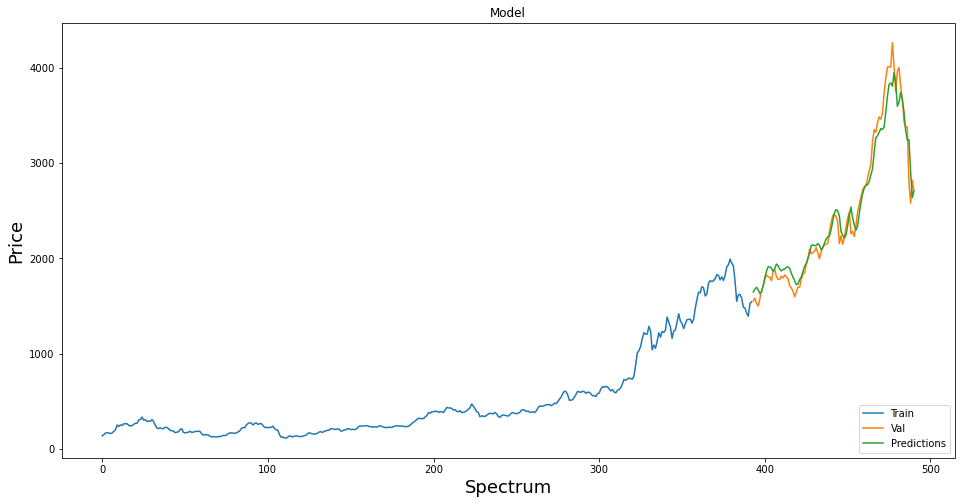

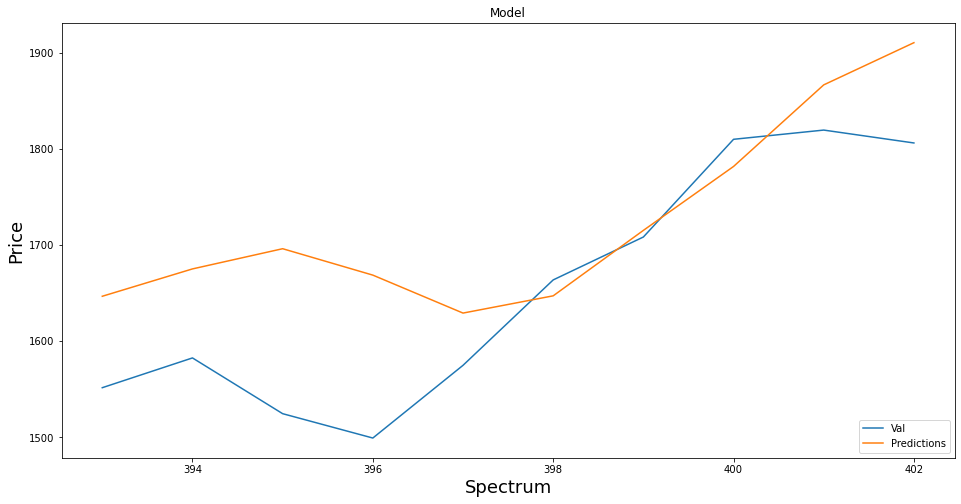

INFO:tensorflow:Assets written to: models/model_crypto_ethust/assets


INFO:tensorflow:Assets written to: models/model_crypto_ethust/assets


Error on ethust!
Error on astusd!
Error on eusbtc!
Epoch 1/10
258/258 [==============================] - 12s 29ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0446 - mape: 222871.1879
Epoch 2/10
258/258 [==============================] - 7s 25ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0257 - mape: 754.7589
Epoch 3/10
258/258 [==============================] - 7s 27ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0325 - mape: 37237.0376
Epoch 4/10
258/258 [==============================] - 7s 28ms/step - loss: 9.4530e-04 - mse: 9.4530e-04 - mae: 0.0221 - mape: 204073.0280
Epoch 5/10
258/258 [==============================] - 7s 28ms/step - loss: 8.4604e-04 - mse: 8.4604e-04 - mae: 0.0201 - mape: 9309.7538
Epoch 6/10
258/258 [==============================] - 7s 28ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0303 - mape: 25498.8314
Epoch 7/10
258/258 [==============================] - 7s 28ms/step - loss: 6.2010e-04 - mse: 6.2010e-04 - mae: 0.0167 - mape: 74360.6941
Epoch 8/10
258/258 [==

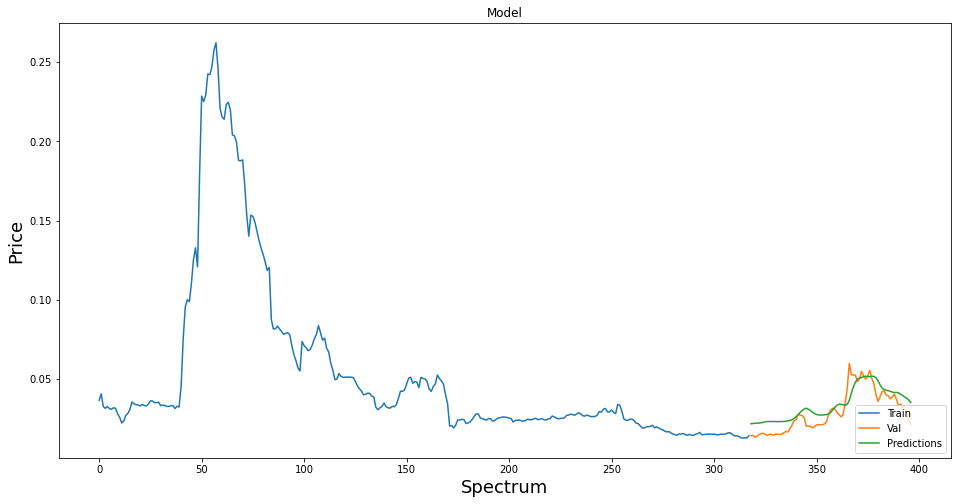

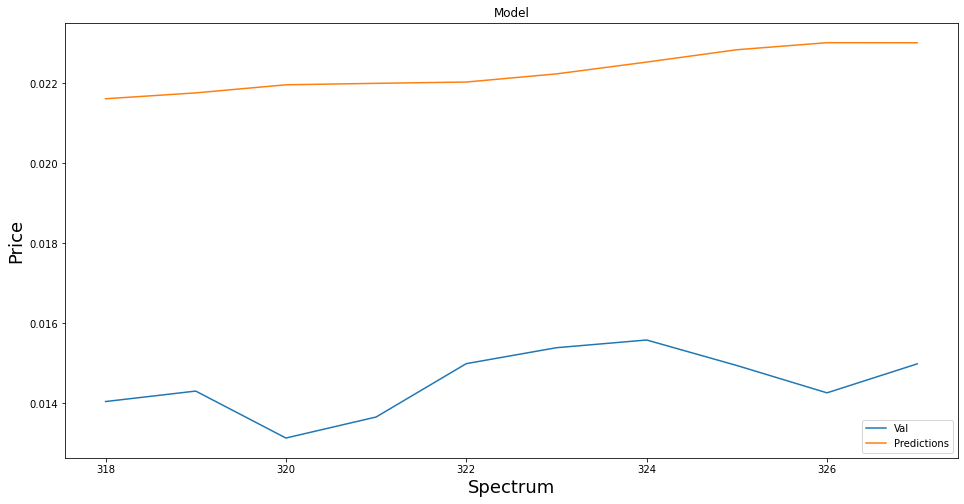

INFO:tensorflow:Assets written to: models/model_crypto_vsyusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_vsyusd/assets


Error on vsyusd!
Epoch 1/10
1119/1119 [==============================] - 36s 29ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0475 - mape: 5792.8131
Epoch 2/10
1119/1119 [==============================] - 32s 28ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0276 - mape: 2325.0772
Epoch 3/10
1119/1119 [==============================] - 32s 29ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0215 - mape: 7265.1138
Epoch 4/10
1119/1119 [==============================] - 31s 27ms/step - loss: 6.1970e-04 - mse: 6.1970e-04 - mae: 0.0173 - mape: 5840.2466
Epoch 5/10
1119/1119 [==============================] - 33s 30ms/step - loss: 8.3096e-04 - mse: 8.3096e-04 - mae: 0.0195 - mape: 4086.1397
Epoch 6/10
1119/1119 [==============================] - 31s 27ms/step - loss: 5.6924e-04 - mse: 5.6924e-04 - mae: 0.0165 - mape: 3622.4701
Epoch 7/10
1119/1119 [==============================] - 31s 28ms/step - loss: 7.1544e-04 - mse: 7.1544e-04 - mae: 0.0186 - mape: 2841.3714
Epoch 8/10
1119/1119 [============

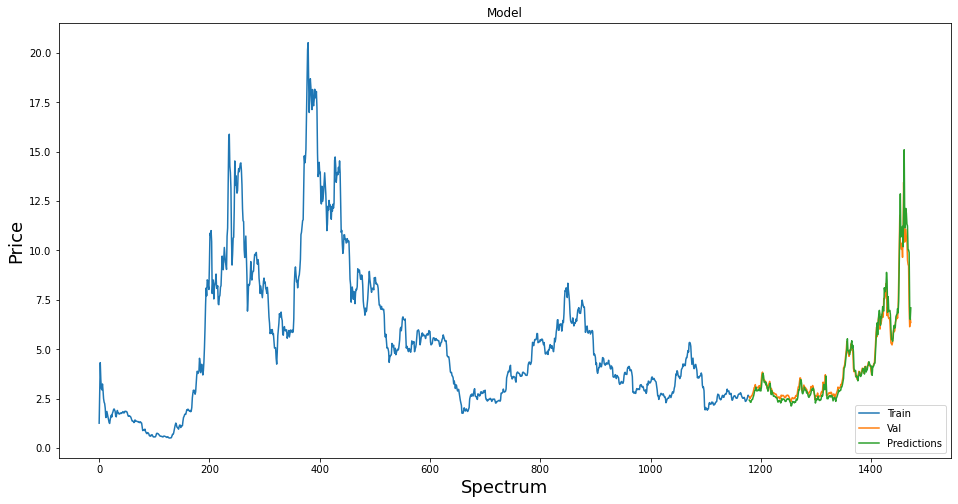

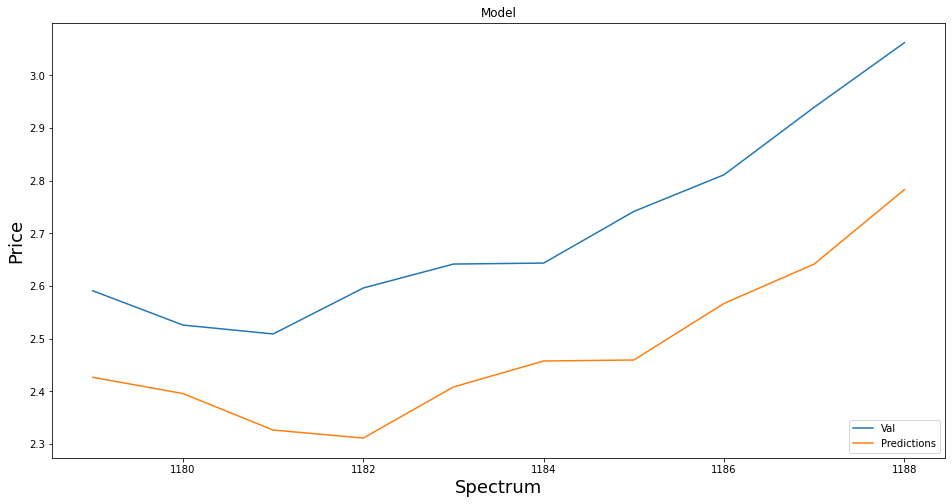

INFO:tensorflow:Assets written to: models/model_crypto_eosusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_eosusd/assets


Error on eosusd!
Error on edoeth!
Error on pnketh!
Epoch 1/10
432/432 [==============================] - 16s 27ms/step - loss: 0.0229 - mse: 0.0229 - mae: 0.0967 - mape: 28.6855
Epoch 2/10
432/432 [==============================] - 12s 28ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0524 - mape: 15.5319
Epoch 3/10
432/432 [==============================] - 12s 28ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0420 - mape: 12.6171
Epoch 4/10
432/432 [==============================] - 12s 28ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0355 - mape: 9.6164
Epoch 5/10
432/432 [==============================] - 13s 29ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0319 - mape: 9.2304
Epoch 6/10
432/432 [==============================] - 12s 28ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0270 - mape: 8.3656
Epoch 7/10
432/432 [==============================] - 12s 28ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0267 - mape: 7.8111
Epoch 8/10
432/432 [==============================] - 12s 28ms/s

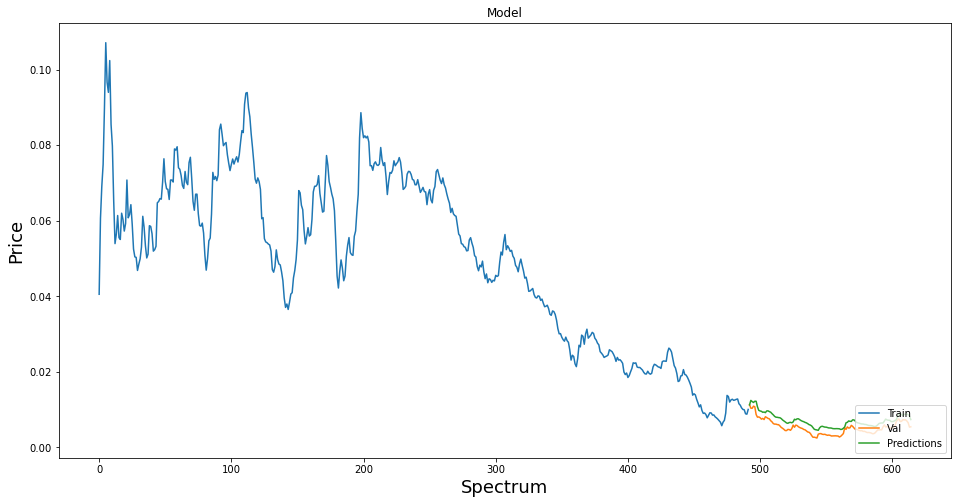

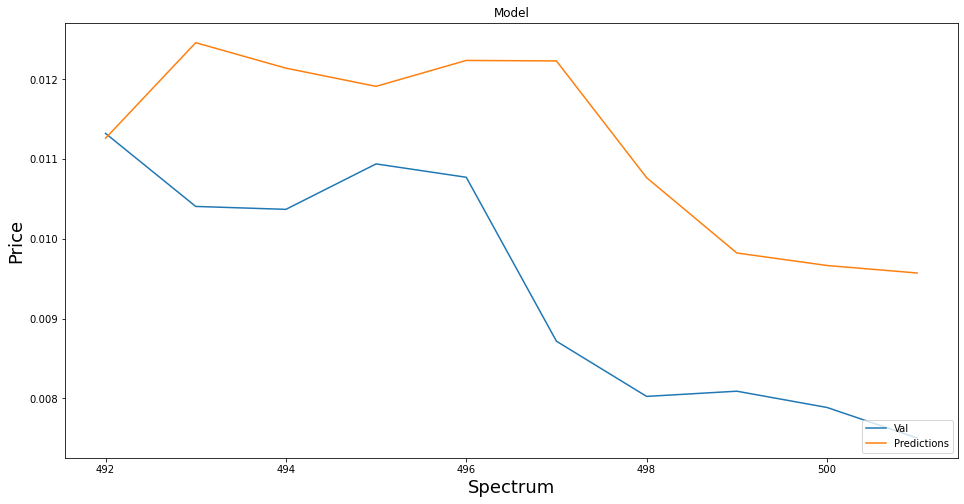

INFO:tensorflow:Assets written to: models/model_crypto_dshbtc/assets


INFO:tensorflow:Assets written to: models/model_crypto_dshbtc/assets


Error on dshbtc!
Error on okbust!
Error on chzusd!
Error on daibtc!
Error on dappust!
Error on mlnusd!
Error on iotf0ustf0!
Epoch 1/10
584/584 [==============================] - 21s 28ms/step - loss: 0.0163 - mse: 0.0163 - mae: 0.0824 - mape: 33.1723
Epoch 2/10
584/584 [==============================] - 17s 30ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0459 - mape: 15.7206
Epoch 3/10
584/584 [==============================] - 16s 28ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0344 - mape: 13.9569
Epoch 4/10
584/584 [==============================] - 16s 27ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0341 - mape: 13.9421
Epoch 5/10
584/584 [==============================] - 15s 26ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0252 - mape: 10.1528
Epoch 6/10
584/584 [==============================] - 17s 29ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0233 - mape: 9.5375
Epoch 7/10
584/584 [==============================] - 16s 28ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0238 - ma

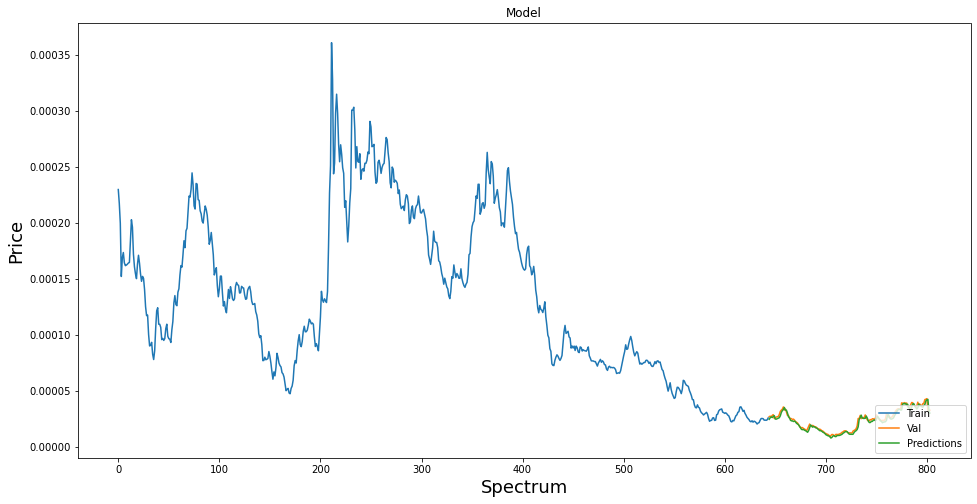

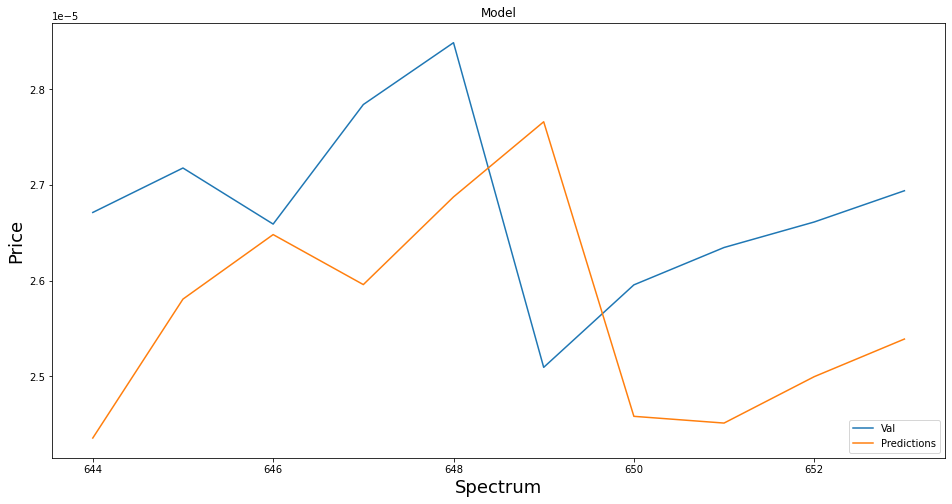

INFO:tensorflow:Assets written to: models/model_crypto_iotbtc/assets


INFO:tensorflow:Assets written to: models/model_crypto_iotbtc/assets


Error on iotbtc!
Error on dogusd!
Epoch 1/10
38/38 [==============================] - 5s 28ms/step - loss: 0.0120 - mse: 0.0120 - mae: 0.0880 - mape: 541162.7278
Epoch 2/10
38/38 [==============================] - 1s 27ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0370 - mape: 3943291.7032
Epoch 3/10
38/38 [==============================] - 1s 27ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0269 - mape: 777107.0815
Epoch 4/10
38/38 [==============================] - 1s 26ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0347 - mape: 388312.9583
Epoch 5/10
38/38 [==============================] - 1s 27ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0282 - mape: 2251816.3252
Epoch 6/10
38/38 [==============================] - 1s 28ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0348 - mape: 91187.1950
Epoch 7/10
38/38 [==============================] - 1s 27ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0248 - mape: 370310.5803
Epoch 8/10
38/38 [==============================] - 1s 27ms/step - lo

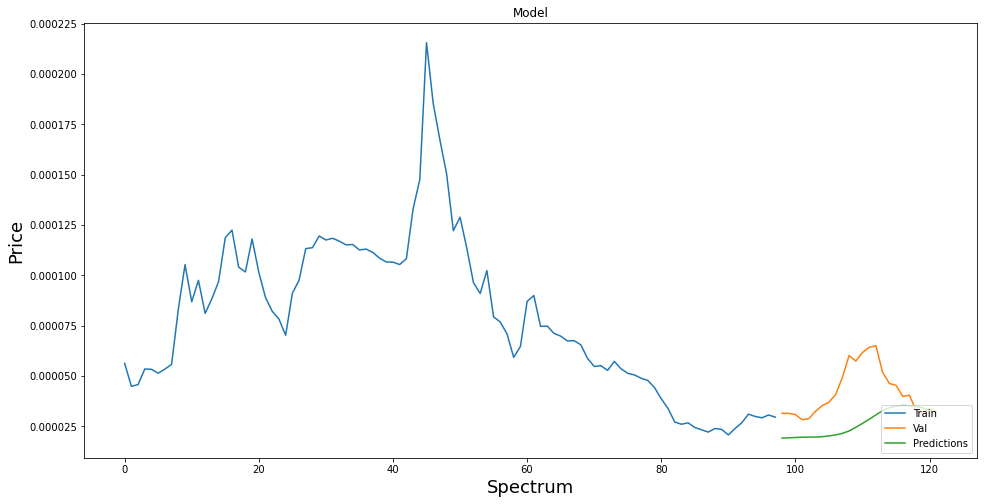

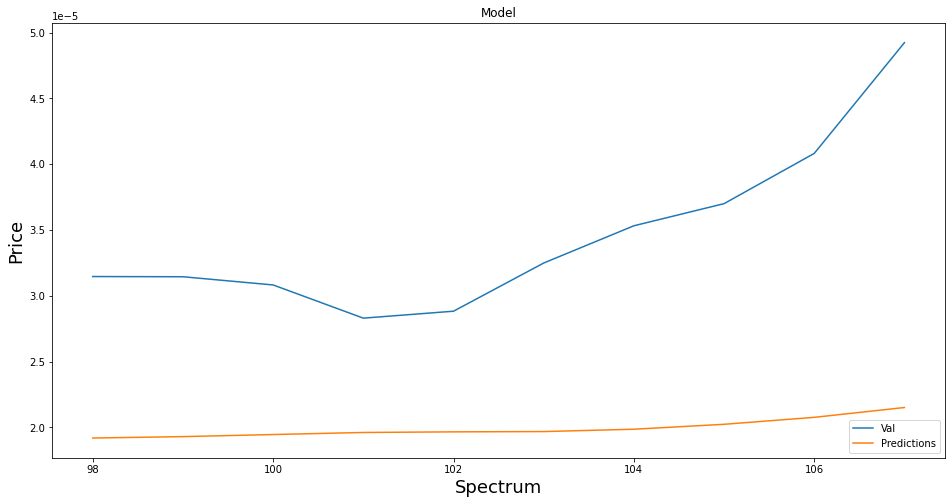

INFO:tensorflow:Assets written to: models/model_crypto_trxeth/assets


INFO:tensorflow:Assets written to: models/model_crypto_trxeth/assets


Error on trxeth!
Error on balust!
Error on xautusd!
Error on genusd!
Error on jstusd!
Error on swmusd!
Error on bmiust!
Epoch 1/10
284/284 [==============================] - 12s 27ms/step - loss: 0.0287 - mse: 0.0287 - mae: 0.1185 - mape: 408.8806
Epoch 2/10
284/284 [==============================] - 8s 28ms/step - loss: 0.0084 - mse: 0.0084 - mae: 0.0705 - mape: 399923.0549
Epoch 3/10
284/284 [==============================] - 8s 28ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0611 - mape: 60945.1166
Epoch 4/10
284/284 [==============================] - 8s 29ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0487 - mape: 21693.0791
Epoch 5/10
284/284 [==============================] - 8s 27ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0482 - mape: 8142.1929
Epoch 6/10
284/284 [==============================] - 8s 28ms/step - loss: 0.0038 - mse: 0.0038 - mae: 0.0475 - mape: 19454.1012
Epoch 7/10
284/284 [==============================] - 8s 30ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.04

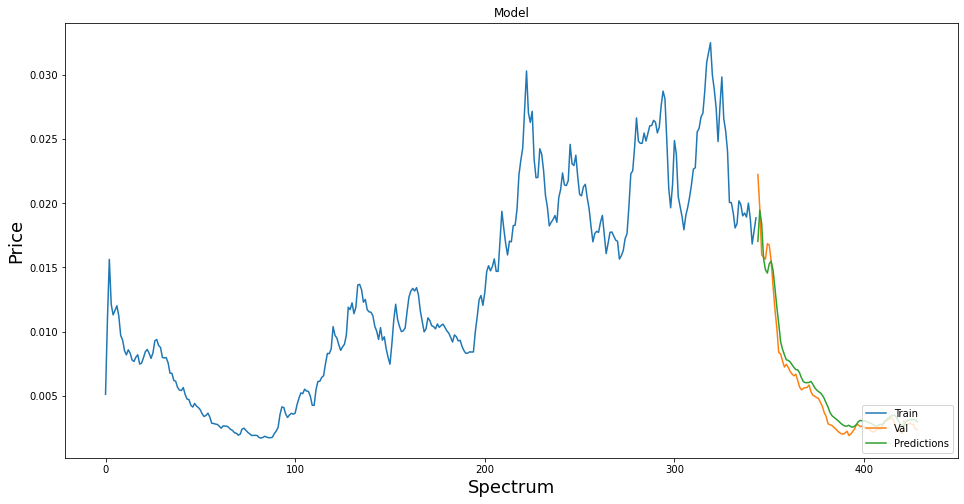

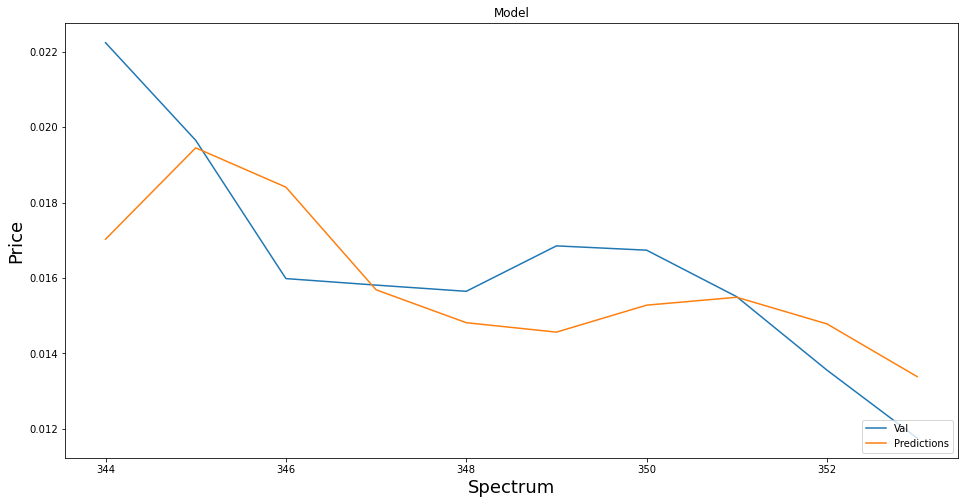

INFO:tensorflow:Assets written to: models/model_crypto_eoseth/assets


INFO:tensorflow:Assets written to: models/model_crypto_eoseth/assets


Error on eoseth!
Error on essusd!
Epoch 1/10
10/10 [==============================] - 3s 29ms/step - loss: 9.7716e-04 - mse: 9.7716e-04 - mae: 0.0258 - mape: 780603.2118
Epoch 2/10
10/10 [==============================] - 0s 27ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0239 - mape: 12020225.0455
Epoch 3/10
10/10 [==============================] - 0s 26ms/step - loss: 4.7136e-04 - mse: 4.7136e-04 - mae: 0.0129 - mape: 5362759.4088
Epoch 4/10
10/10 [==============================] - 0s 25ms/step - loss: 7.2179e-04 - mse: 7.2179e-04 - mae: 0.0168 - mape: 6251814.0229
Epoch 5/10
10/10 [==============================] - 0s 26ms/step - loss: 4.0572e-04 - mse: 4.0572e-04 - mae: 0.0156 - mape: 3299742.2808
Epoch 6/10
10/10 [==============================] - 0s 23ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0257 - mape: 986995.5102
Epoch 7/10
10/10 [==============================] - 0s 25ms/step - loss: 7.8301e-04 - mse: 7.8301e-04 - mae: 0.0229 - mape: 3581277.7753
Epoch 8/10
10/10 [======

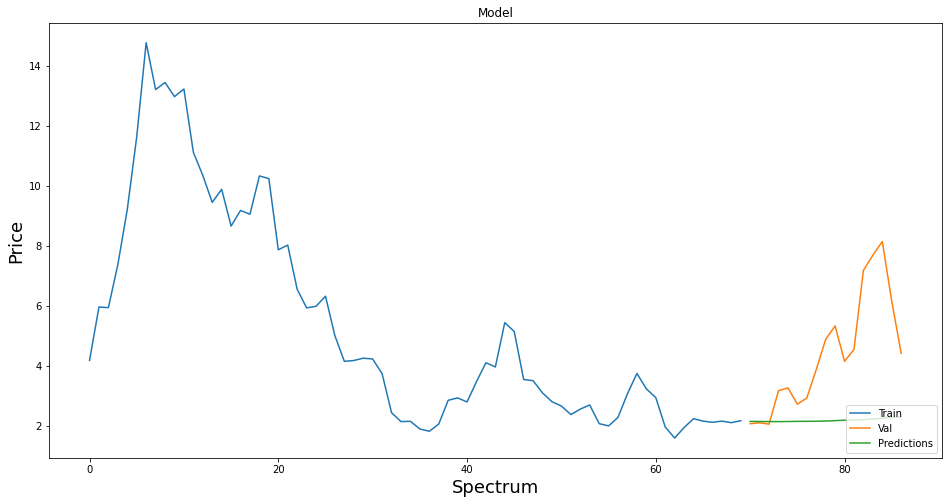

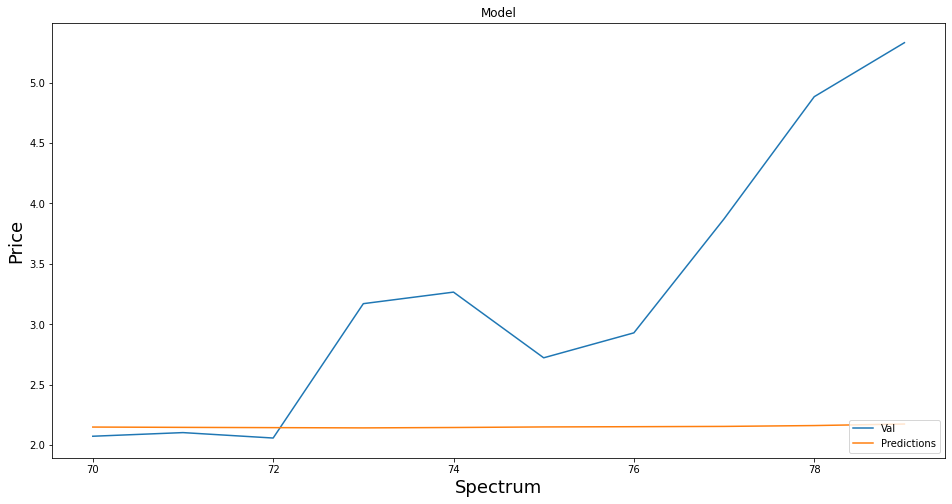

INFO:tensorflow:Assets written to: models/model_crypto_eosgbp/assets


INFO:tensorflow:Assets written to: models/model_crypto_eosgbp/assets


Error on eosgbp!
Error on dogeusd!
Error on pnkusd!
Epoch 1/10
122/122 [==============================] - 6s 27ms/step - loss: 0.0169 - mse: 0.0169 - mae: 0.0864 - mape: 896791.8270
Epoch 2/10
122/122 [==============================] - 3s 28ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0593 - mape: 1293608.5768
Epoch 3/10
122/122 [==============================] - 3s 28ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0563 - mape: 147315.6518
Epoch 4/10
122/122 [==============================] - 3s 28ms/step - loss: 0.0084 - mse: 0.0084 - mae: 0.0689 - mape: 96280.1544
Epoch 5/10
122/122 [==============================] - 3s 28ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0423 - mape: 44619.5063
Epoch 6/10
122/122 [==============================] - 3s 28ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0470 - mape: 26524.8926
Epoch 7/10
122/122 [==============================] - 3s 27ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0489 - mape: 15365.9838
Epoch 8/10
122/122 [=====================

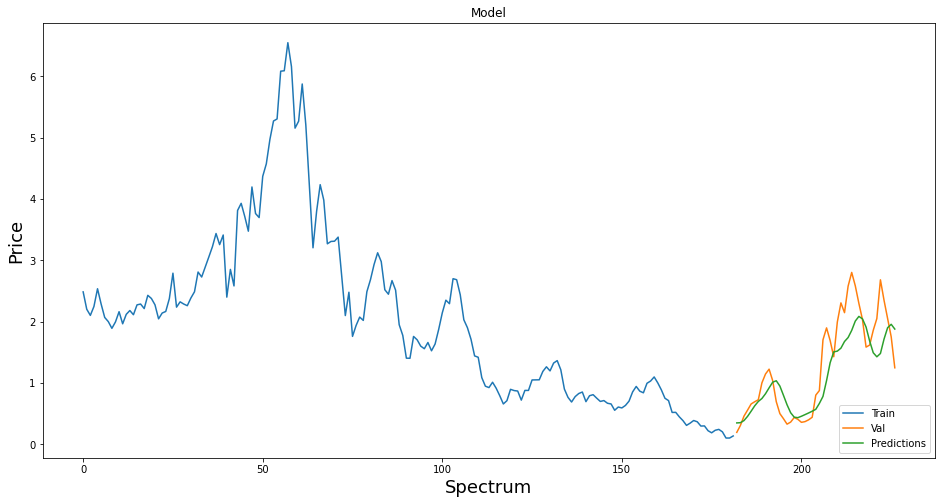

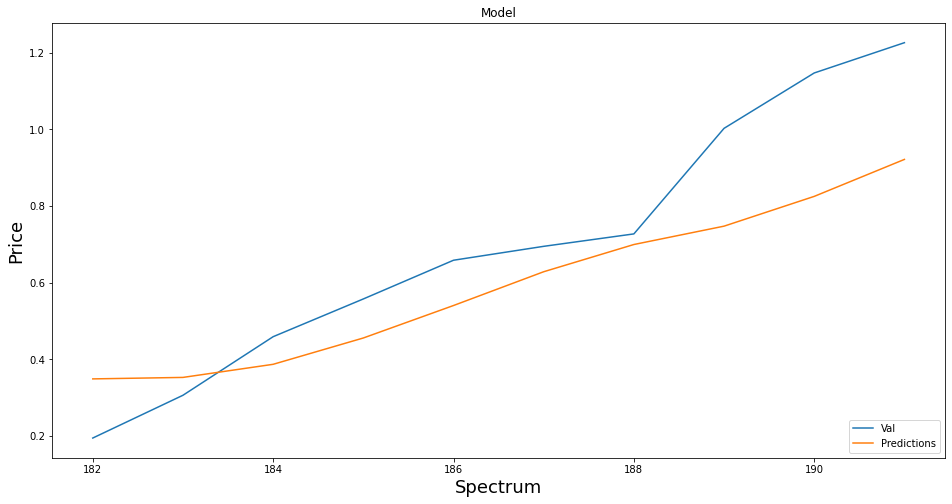

INFO:tensorflow:Assets written to: models/model_crypto_edousd/assets


INFO:tensorflow:Assets written to: models/model_crypto_edousd/assets


Error on edousd!
Epoch 1/10
688/688 [==============================] - 25s 29ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0442 - mape: 2691.9313
Epoch 2/10
688/688 [==============================] - 19s 28ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0257 - mape: 133920.5917
Epoch 3/10
688/688 [==============================] - 20s 28ms/step - loss: 9.7386e-04 - mse: 9.7386e-04 - mae: 0.0227 - mape: 28526.3017
Epoch 4/10
688/688 [==============================] - 19s 28ms/step - loss: 9.6184e-04 - mse: 9.6184e-04 - mae: 0.0223 - mape: 1077.9632
Epoch 5/10
688/688 [==============================] - 21s 30ms/step - loss: 8.4244e-04 - mse: 8.4244e-04 - mae: 0.0195 - mape: 5857.4663
Epoch 6/10
688/688 [==============================] - 20s 28ms/step - loss: 6.3113e-04 - mse: 6.3113e-04 - mae: 0.0173 - mape: 610.6992
Epoch 7/10
688/688 [==============================] - 18s 27ms/step - loss: 6.2201e-04 - mse: 6.2201e-04 - mae: 0.0182 - mape: 4877.4330
Epoch 8/10
688/688 [==================

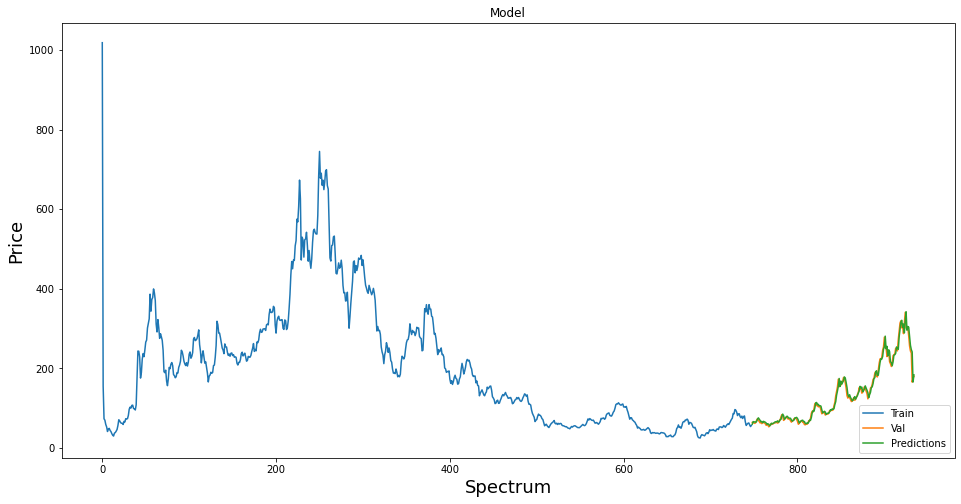

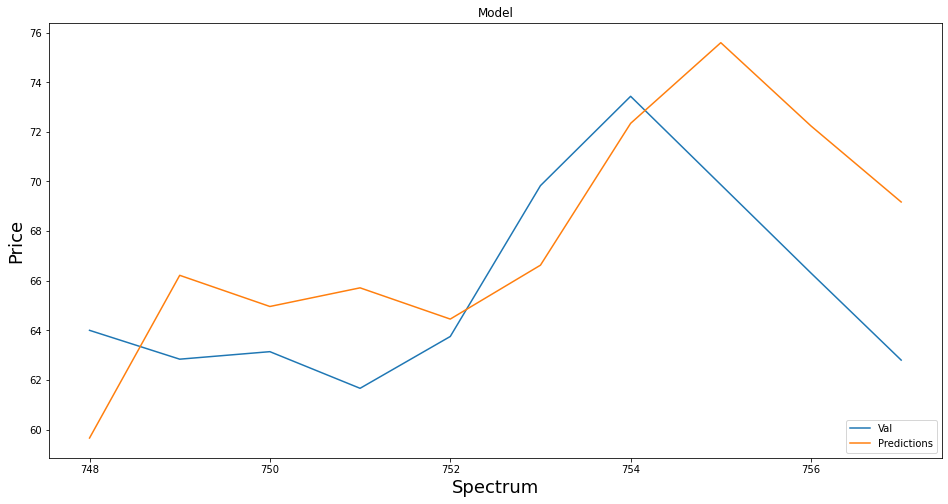

INFO:tensorflow:Assets written to: models/model_crypto_zecusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_zecusd/assets


Error on zecusd!
Error on fetust!
Epoch 1/10
180/180 [==============================] - 9s 28ms/step - loss: 0.0178 - mse: 0.0178 - mae: 0.0957 - mape: 33.7385
Epoch 2/10
180/180 [==============================] - 5s 27ms/step - loss: 0.0226 - mse: 0.0226 - mae: 0.0927 - mape: 32.5086
Epoch 3/10
180/180 [==============================] - 5s 28ms/step - loss: 0.0117 - mse: 0.0117 - mae: 0.0627 - mape: 21.4822
Epoch 4/10
180/180 [==============================] - 5s 28ms/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0739 - mape: 24.6403
Epoch 5/10
180/180 [==============================] - 5s 28ms/step - loss: 0.0115 - mse: 0.0115 - mae: 0.0686 - mape: 23.9842
Epoch 6/10
180/180 [==============================] - 5s 27ms/step - loss: 0.0208 - mse: 0.0208 - mae: 0.0863 - mape: 28.4374
Epoch 7/10
180/180 [==============================] - 6s 31ms/step - loss: 0.0169 - mse: 0.0169 - mae: 0.0828 - mape: 25.1572
Epoch 8/10
180/180 [==============================] - 5s 27ms/step - loss: 0.0091 - 

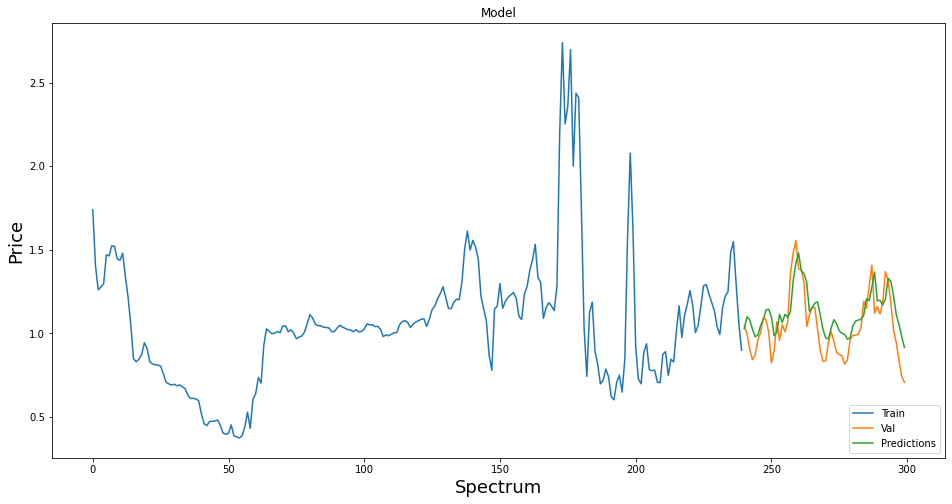

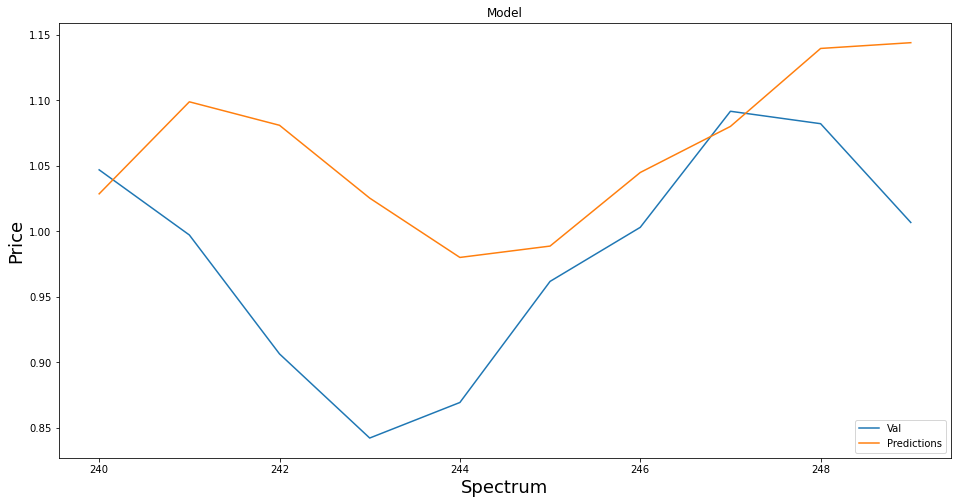

INFO:tensorflow:Assets written to: models/model_crypto_ampusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_ampusd/assets


Error on ampusd!
Epoch 1/10
53/53 [==============================] - 6s 30ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0365 - mape: 4955367.4444
Epoch 2/10
53/53 [==============================] - 1s 28ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0345 - mape: 163108.9466
Epoch 3/10
53/53 [==============================] - 1s 28ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0307 - mape: 153649.0551
Epoch 4/10
53/53 [==============================] - 1s 28ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0285 - mape: 714344.0473
Epoch 5/10
53/53 [==============================] - 1s 28ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0294 - mape: 428767.1542
Epoch 6/10
53/53 [==============================] - 1s 27ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0312 - mape: 46478.3302
Epoch 7/10
53/53 [==============================] - 1s 27ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0319 - mape: 519698.7231
Epoch 8/10
53/53 [==============================] - 1s 27ms/step - loss: 0.0022 - mse: 

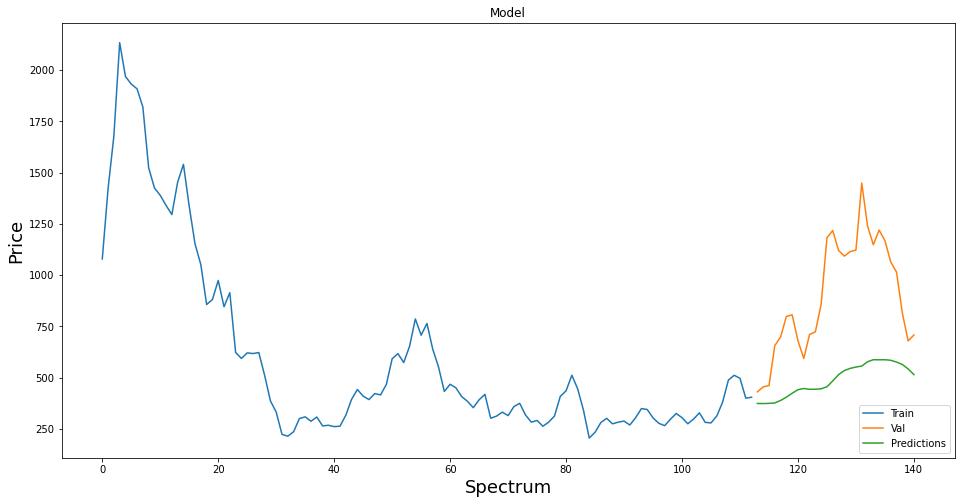

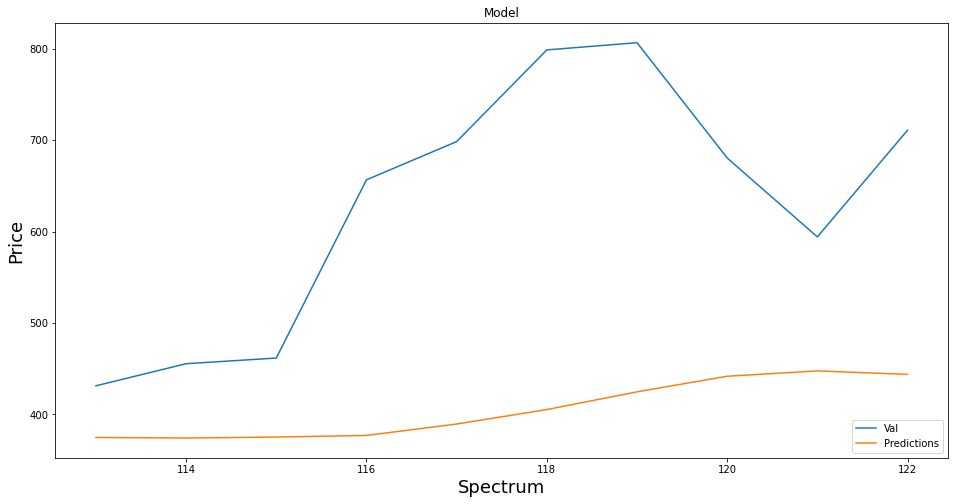

INFO:tensorflow:Assets written to: models/model_crypto_eosjpy/assets


INFO:tensorflow:Assets written to: models/model_crypto_eosjpy/assets


Error on eosjpy!
Epoch 1/10
337/337 [==============================] - 14s 28ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0474 - mape: 484208.5008
Epoch 2/10
337/337 [==============================] - 9s 28ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0270 - mape: 277035.0920
Epoch 3/10
337/337 [==============================] - 9s 28ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0247 - mape: 345303.7961
Epoch 4/10
337/337 [==============================] - 9s 27ms/step - loss: 7.7714e-04 - mse: 7.7714e-04 - mae: 0.0217 - mape: 14789.8629
Epoch 5/10
337/337 [==============================] - 10s 29ms/step - loss: 8.8845e-04 - mse: 8.8845e-04 - mae: 0.0210 - mape: 263435.8827
Epoch 6/10
337/337 [==============================] - 9s 28ms/step - loss: 6.5806e-04 - mse: 6.5806e-04 - mae: 0.0190 - mape: 77175.5469
Epoch 7/10
337/337 [==============================] - 9s 28ms/step - loss: 7.3754e-04 - mse: 7.3754e-04 - mae: 0.0211 - mape: 100139.9863
Epoch 8/10
337/337 [=====================

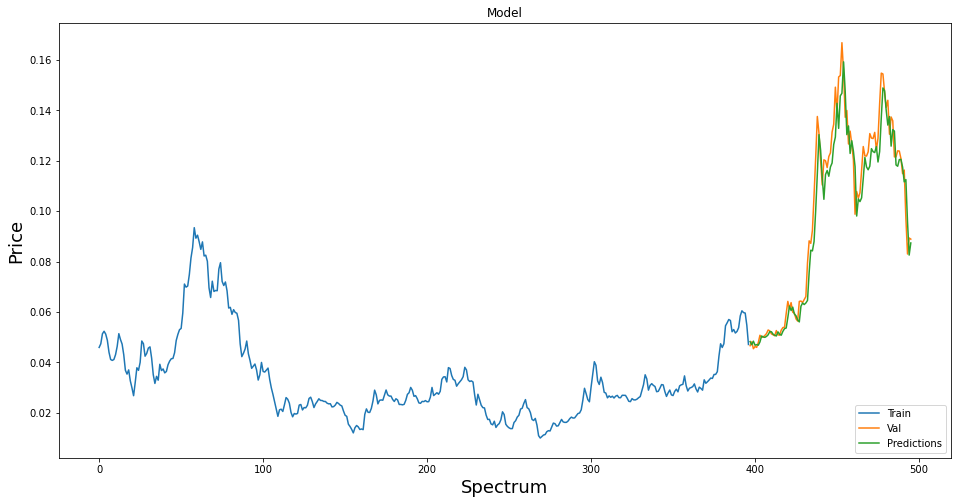

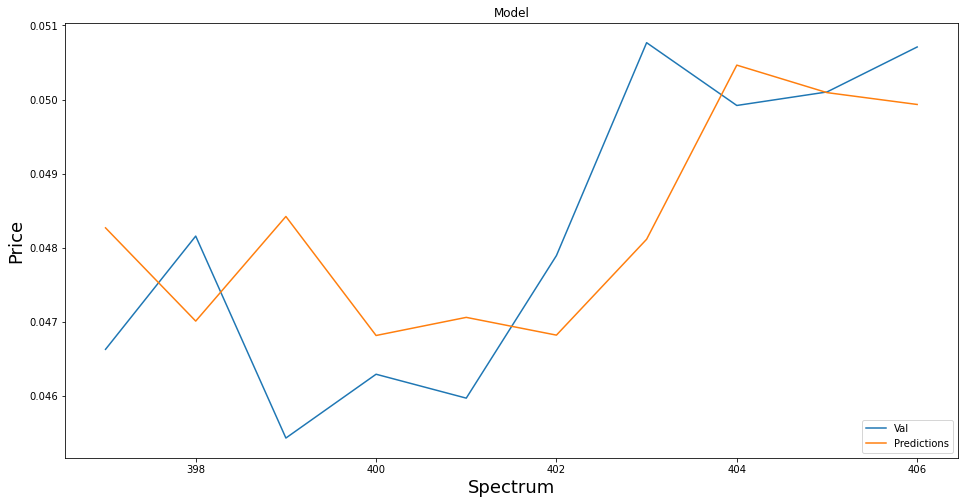

INFO:tensorflow:Assets written to: models/model_crypto_trxusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_trxusd/assets


Error on trxusd!
Error on egldusd!
Epoch 1/10
17/17 [==============================] - 6s 34ms/step - loss: 0.1054 - mse: 0.1054 - mae: 0.2965 - mape: 63.9696
Epoch 2/10
17/17 [==============================] - 0s 26ms/step - loss: 0.0305 - mse: 0.0305 - mae: 0.1239 - mape: 20.2424
Epoch 3/10
17/17 [==============================] - 0s 29ms/step - loss: 0.0243 - mse: 0.0243 - mae: 0.1231 - mape: 22.4865
Epoch 4/10
17/17 [==============================] - 0s 29ms/step - loss: 0.0267 - mse: 0.0267 - mae: 0.1330 - mape: 25.8677
Epoch 5/10
17/17 [==============================] - 0s 25ms/step - loss: 0.0115 - mse: 0.0115 - mae: 0.0751 - mape: 14.7164
Epoch 6/10
17/17 [==============================] - 0s 25ms/step - loss: 0.0207 - mse: 0.0207 - mae: 0.1260 - mape: 27.4544
Epoch 7/10
17/17 [==============================] - 0s 24ms/step - loss: 0.0224 - mse: 0.0224 - mae: 0.1397 - mape: 26.2824
Epoch 8/10
17/17 [==============================] - 0s 23ms/step - loss: 0.0177 - mse: 0.0177 - m

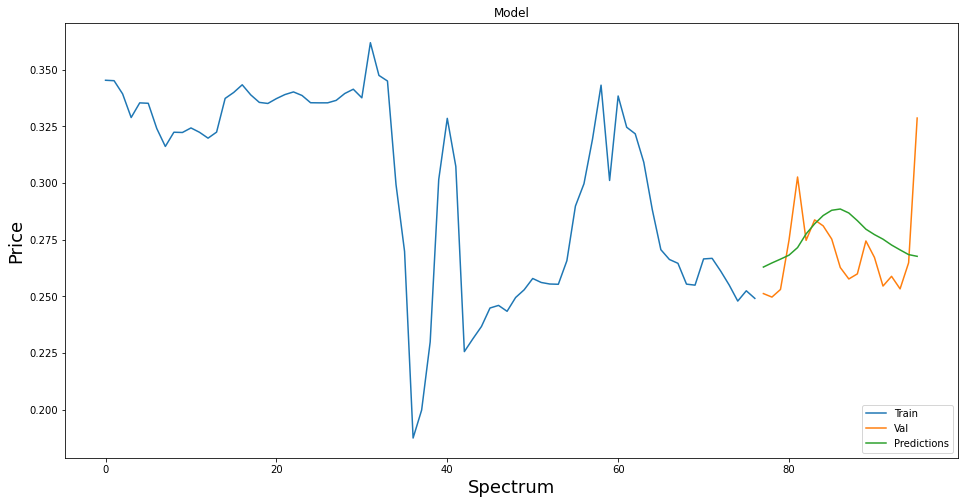

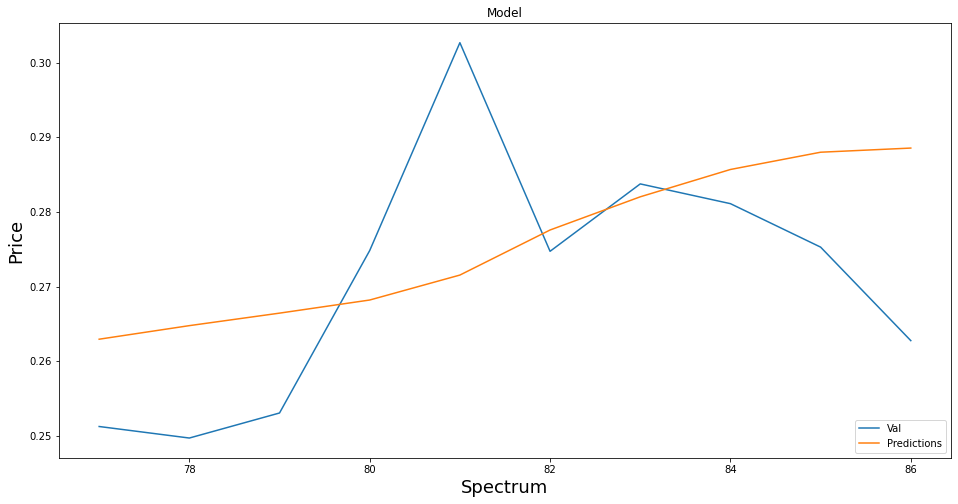

INFO:tensorflow:Assets written to: models/model_crypto_zbtusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_zbtusd/assets


Error on zbtusd!
Error on xautust!
Error on balusd!
Error on xautf0btcf0!
Error on dogust!
Epoch 1/10
67/67 [==============================] - 4s 27ms/step - loss: 0.0587 - mse: 0.0587 - mae: 0.1959 - mape: 45.8519
Epoch 2/10
67/67 [==============================] - 2s 28ms/step - loss: 0.0139 - mse: 0.0139 - mae: 0.0928 - mape: 22.5719
Epoch 3/10
67/67 [==============================] - 2s 27ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0783 - mape: 17.0028
Epoch 4/10
67/67 [==============================] - 2s 27ms/step - loss: 0.0120 - mse: 0.0120 - mae: 0.0916 - mape: 20.3150
Epoch 5/10
67/67 [==============================] - 2s 29ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0611 - mape: 15.0180
Epoch 6/10
67/67 [==============================] - 2s 28ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0778 - mape: 20.7809
Epoch 7/10
67/67 [==============================] - 2s 28ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0612 - mape: 13.2713
Epoch 8/10
67/67 [=======================

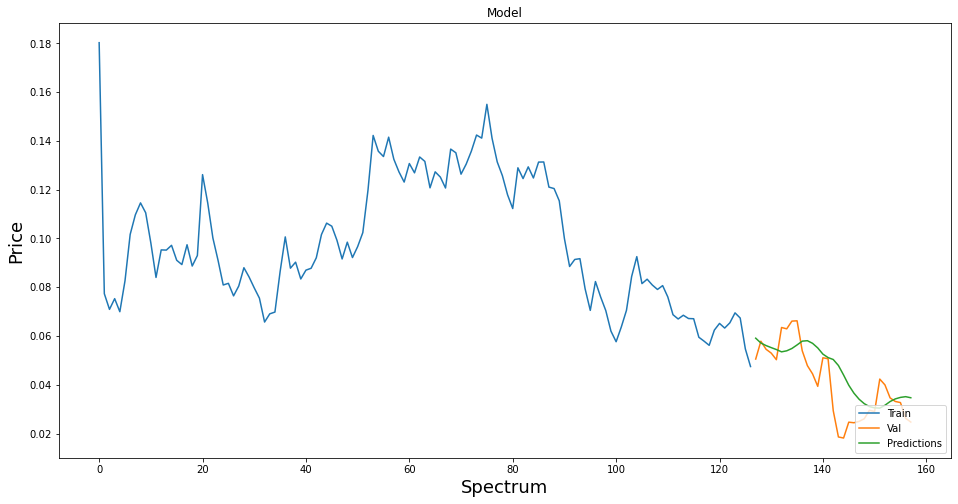

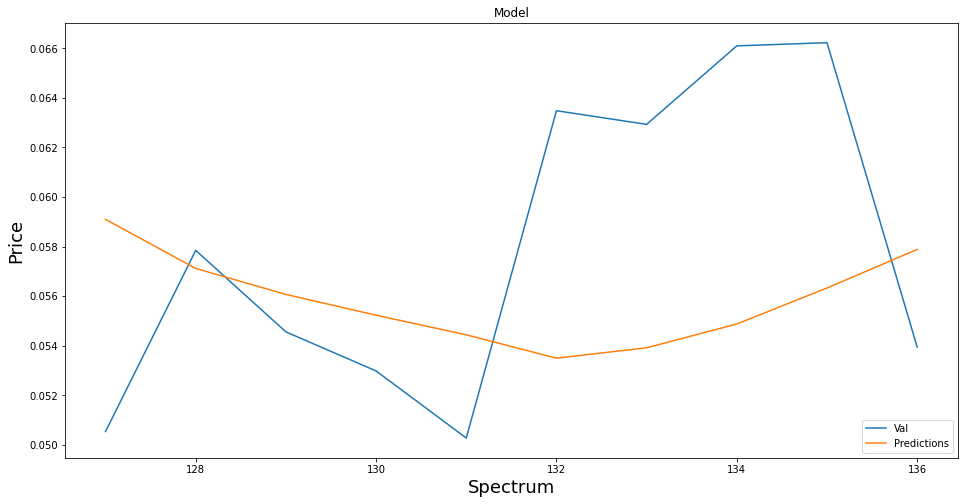

INFO:tensorflow:Assets written to: models/model_crypto_neoeth/assets


INFO:tensorflow:Assets written to: models/model_crypto_neoeth/assets


Error on neoeth!
Error on europe50ixf0ustf0!
Error on eosf0ustf0!
Error on dappusd!
Error on neogbp!
Epoch 1/10
36/36 [==============================] - 5s 27ms/step - loss: 0.0385 - mse: 0.0385 - mae: 0.1503 - mape: 38.8647
Epoch 2/10
36/36 [==============================] - 1s 28ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0503 - mape: 13.5235
Epoch 3/10
36/36 [==============================] - 1s 27ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0511 - mape: 14.5821
Epoch 4/10
36/36 [==============================] - 1s 27ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0387 - mape: 11.0799
Epoch 5/10
36/36 [==============================] - 1s 28ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0413 - mape: 11.4329
Epoch 6/10
36/36 [==============================] - 1s 28ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0416 - mape: 11.0370
Epoch 7/10
36/36 [==============================] - 1s 28ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0375 - mape: 10.2730
Epoch 8/10
36/36 [=============

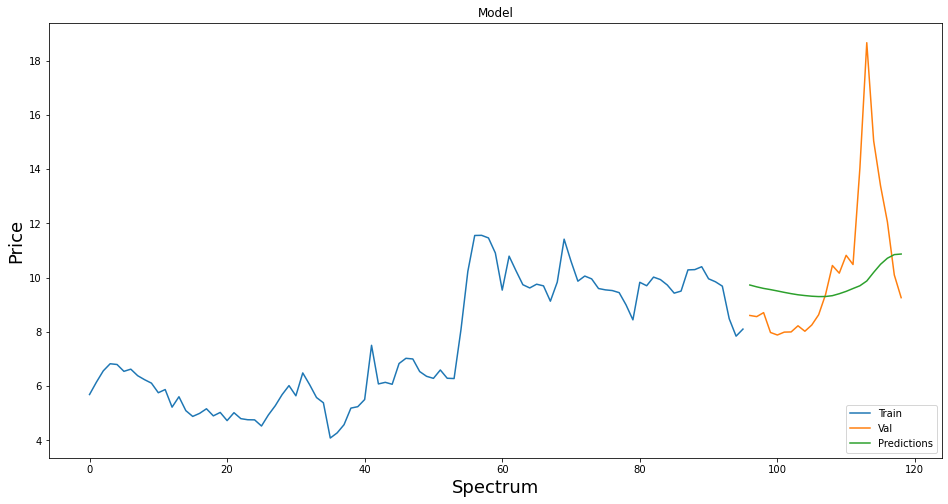

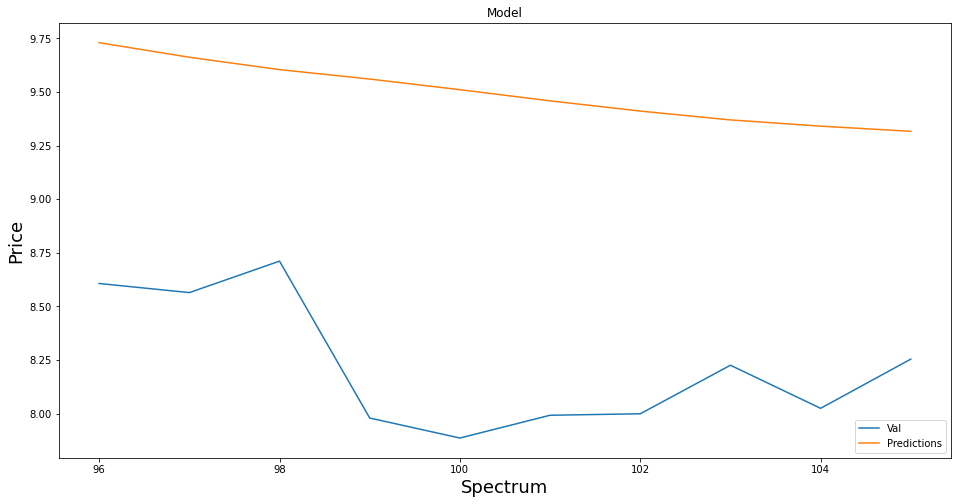

INFO:tensorflow:Assets written to: models/model_crypto_pluusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_pluusd/assets


Error on pluusd!
Error on neceth!
Epoch 1/10
338/338 [==============================] - 12s 27ms/step - loss: 0.0250 - mse: 0.0250 - mae: 0.1056 - mape: 47.6585
Epoch 2/10
338/338 [==============================] - 9s 28ms/step - loss: 0.0061 - mse: 0.0061 - mae: 0.0558 - mape: 24.8286
Epoch 3/10
338/338 [==============================] - 10s 29ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0391 - mape: 17.8566
Epoch 4/10
338/338 [==============================] - 10s 29ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0405 - mape: 17.1935
Epoch 5/10
338/338 [==============================] - 10s 28ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0362 - mape: 14.3136
Epoch 6/10
338/338 [==============================] - 9s 28ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0366 - mape: 18.5575
Epoch 7/10
338/338 [==============================] - 9s 28ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0234 - mape: 10.3820
Epoch 8/10
338/338 [==============================] - 9s 28ms/step - loss: 0.002

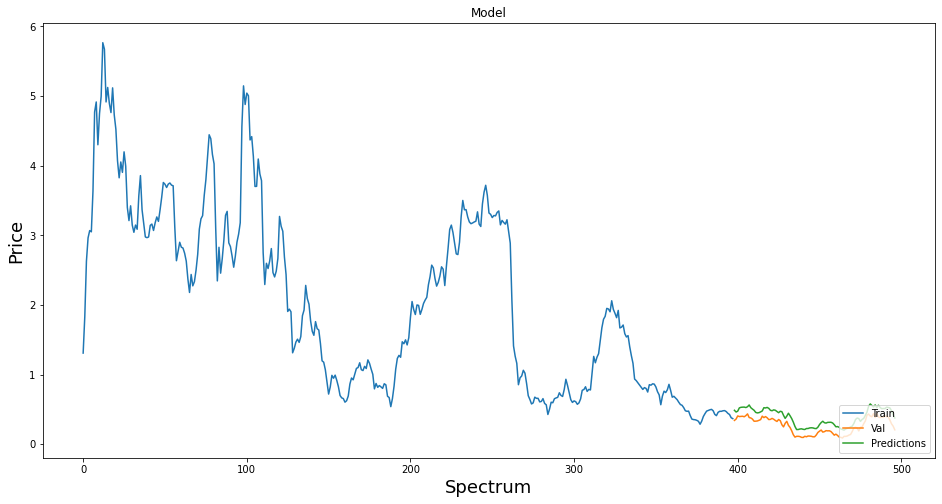

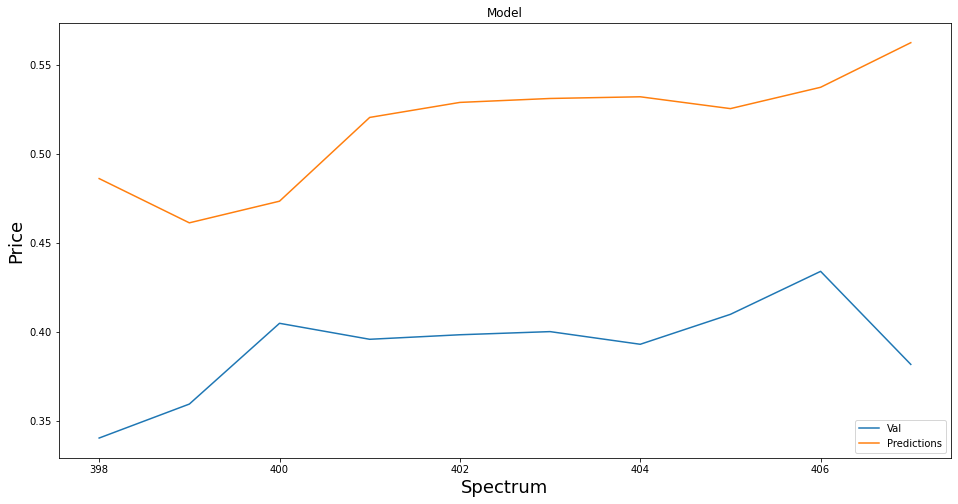

INFO:tensorflow:Assets written to: models/model_crypto_etpusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_etpusd/assets


Error on etpusd!
Error on okbusd!
Error on chzust!
Error on antusd!
Error on atoeth!
Epoch 1/10
56/56 [==============================] - 5s 27ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0625 - mape: 60.1403
Epoch 2/10
56/56 [==============================] - 2s 28ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0435 - mape: 31.0718
Epoch 3/10
56/56 [==============================] - 2s 29ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0591 - mape: 44.1074
Epoch 4/10
56/56 [==============================] - 2s 30ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0401 - mape: 32.0047
Epoch 5/10
56/56 [==============================] - 2s 30ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0506 - mape: 41.3133
Epoch 6/10
56/56 [==============================] - 1s 27ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0487 - mape: 36.0271
Epoch 7/10
56/56 [==============================] - 1s 25ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0413 - mape: 31.7443
Epoch 8/10
56/56 [=============================

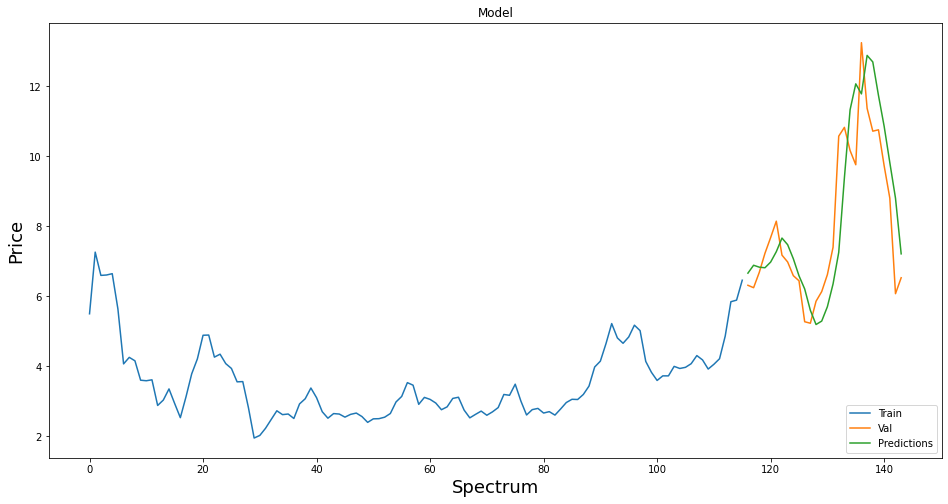

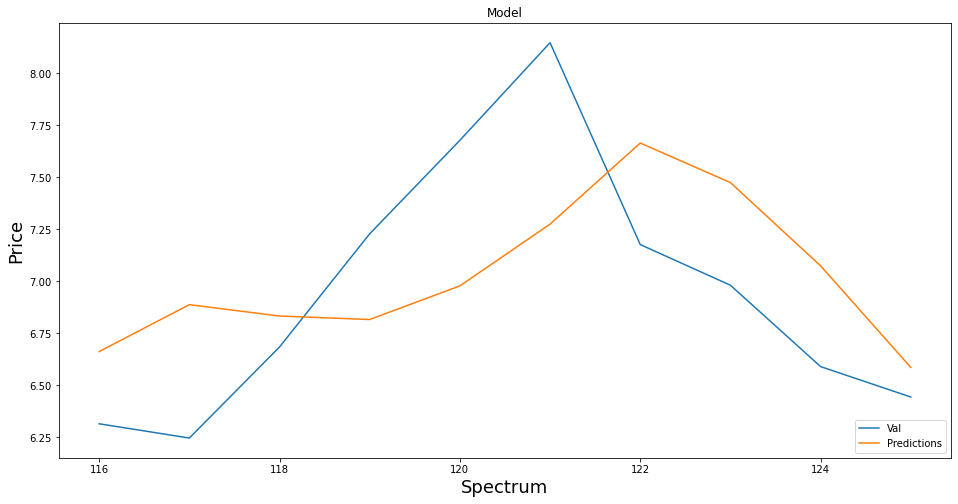

INFO:tensorflow:Assets written to: models/model_crypto_eosust/assets


INFO:tensorflow:Assets written to: models/model_crypto_eosust/assets


Error on eosust!
Error on zcnusd!
Error on bttusd!
Error on kncbtc!
Error on neojpy!
Error on dotf0btcf0!
Epoch 1/10
568/568 [==============================] - 21s 27ms/step - loss: 0.0070 - mse: 0.0070 - mae: 0.0494 - mape: 690457.4302
Epoch 2/10
568/568 [==============================] - 15s 27ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0413 - mape: 227666.5092
Epoch 3/10
568/568 [==============================] - 17s 29ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0295 - mape: 325823.3732
Epoch 4/10
568/568 [==============================] - 16s 28ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0201 - mape: 255975.2560
Epoch 5/10
568/568 [==============================] - 16s 28ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0246 - mape: 671558.4155
Epoch 6/10
568/568 [==============================] - 16s 28ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0306 - mape: 685950.0897
Epoch 7/10
568/568 [==============================] - 16s 28ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.02

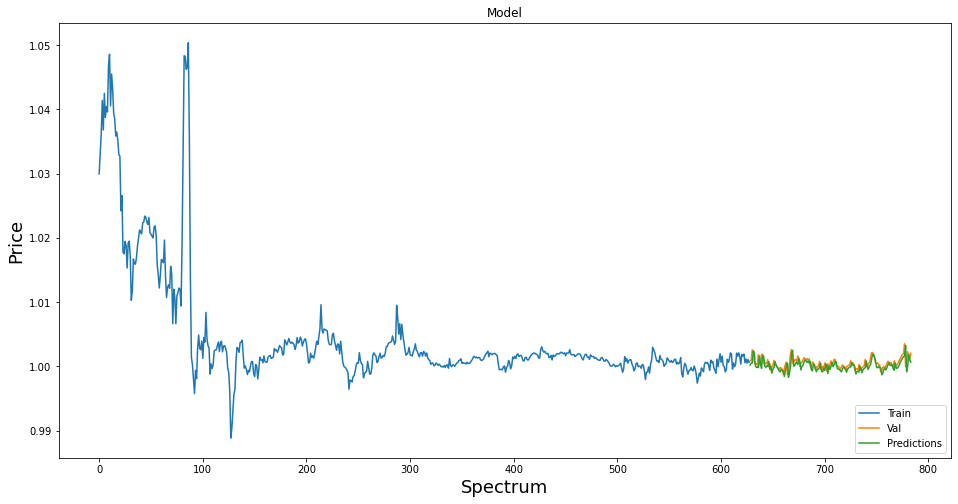

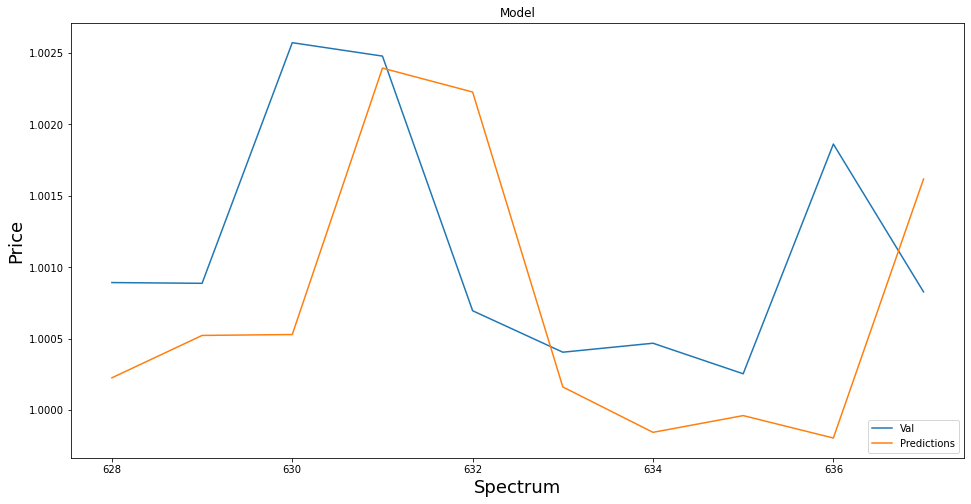

INFO:tensorflow:Assets written to: models/model_crypto_ustusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_ustusd/assets


Error on ustusd!
Epoch 1/10
1649/1649 [==============================] - 44s 24ms/step - loss: 3.6330e-04 - mse: 3.6330e-04 - mae: 0.0134 - mape: 491.7829
Epoch 2/10
1649/1649 [==============================] - 47s 28ms/step - loss: 1.7283e-04 - mse: 1.7283e-04 - mae: 0.0085 - mape: 559.3666
Epoch 3/10
1649/1649 [==============================] - 47s 28ms/step - loss: 9.8018e-05 - mse: 9.8018e-05 - mae: 0.0070 - mape: 3698.5029
Epoch 4/10
1649/1649 [==============================] - 46s 28ms/step - loss: 6.5410e-05 - mse: 6.5410e-05 - mae: 0.0058 - mape: 1081.0214
Epoch 5/10
1649/1649 [==============================] - 46s 28ms/step - loss: 4.1410e-05 - mse: 4.1410e-05 - mae: 0.0044 - mape: 1723.6911
Epoch 6/10
1649/1649 [==============================] - 45s 27ms/step - loss: 9.9796e-05 - mse: 9.9796e-05 - mae: 0.0068 - mape: 1468.9225
Epoch 7/10
1649/1649 [==============================] - 46s 28ms/step - loss: 5.6764e-05 - mse: 5.6764e-05 - mae: 0.0050 - mape: 371.2484
Epoch 8/10
16

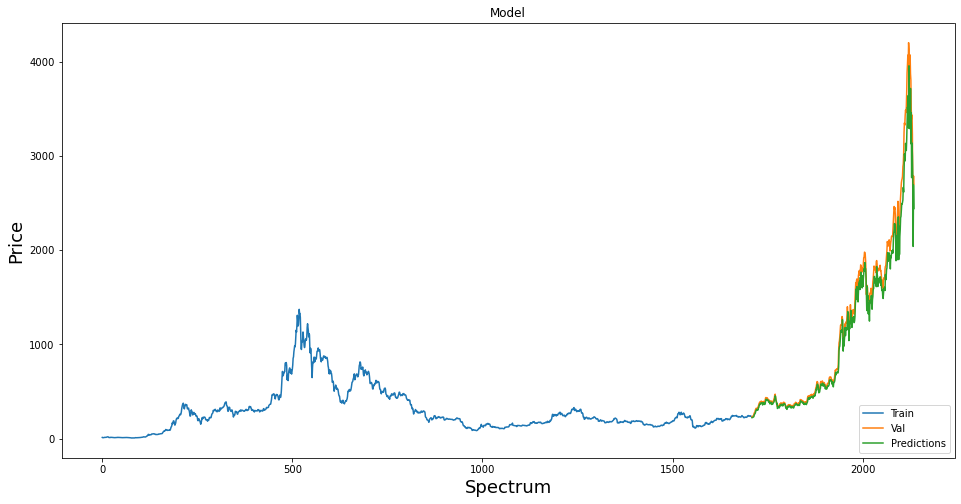

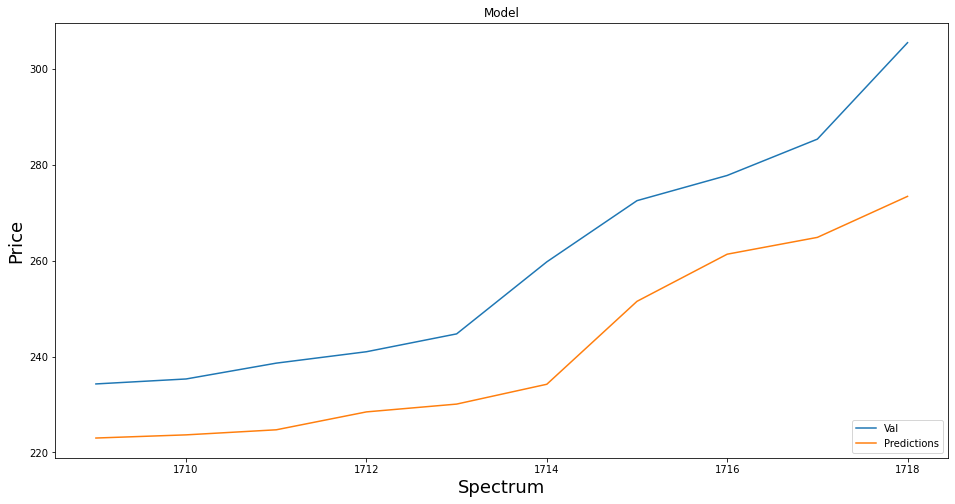

INFO:tensorflow:Assets written to: models/model_crypto_ethusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_ethusd/assets


Error on ethusd!
Epoch 1/10
36/36 [==============================] - 6s 28ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0525 - mape: 84.0963
Epoch 2/10
36/36 [==============================] - 1s 29ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0651 - mape: 67.9344
Epoch 3/10
36/36 [==============================] - 1s 27ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0404 - mape: 44.2385
Epoch 4/10
36/36 [==============================] - 1s 28ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0463 - mape: 66.3138
Epoch 5/10
36/36 [==============================] - 1s 28ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0528 - mape: 59.9593
Epoch 6/10
36/36 [==============================] - 1s 28ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0545 - mape: 66.8570
Epoch 7/10
36/36 [==============================] - 1s 27ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0420 - mape: 57.6052
Epoch 8/10
36/36 [==============================] - 1s 28ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0363 - mape:

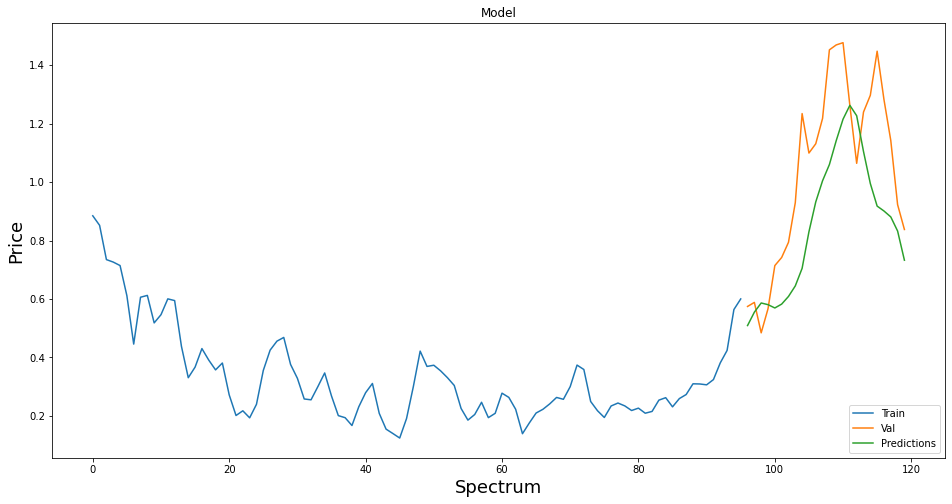

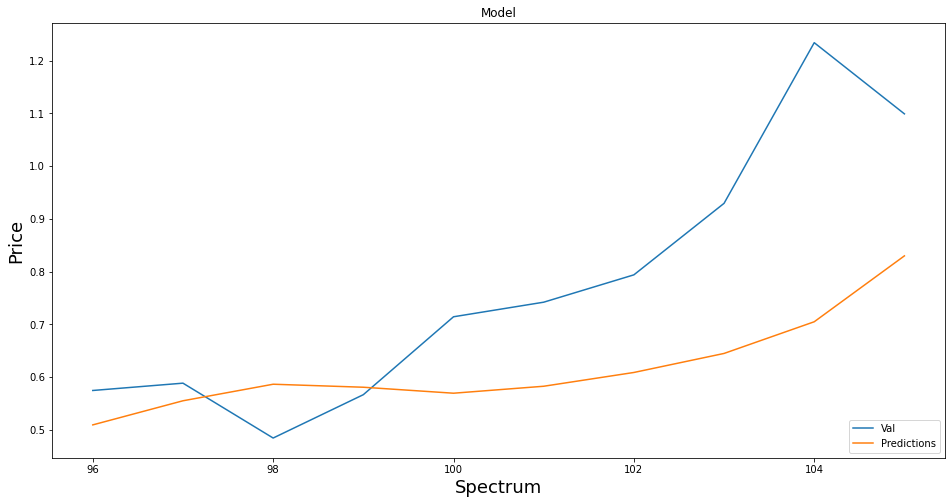

INFO:tensorflow:Assets written to: models/model_crypto_batusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_batusd/assets


Error on batusd!
Error on oxyusd!
Epoch 1/10
12/12 [==============================] - 7s 28ms/step - loss: 0.3762 - mse: 0.3762 - mae: 0.5021 - mape: 59.4359
Epoch 2/10
12/12 [==============================] - 0s 28ms/step - loss: 0.0263 - mse: 0.0263 - mae: 0.1213 - mape: 15.5217
Epoch 3/10
12/12 [==============================] - 0s 27ms/step - loss: 0.0238 - mse: 0.0238 - mae: 0.1264 - mape: 17.3217
Epoch 4/10
12/12 [==============================] - 0s 28ms/step - loss: 0.0161 - mse: 0.0161 - mae: 0.0971 - mape: 14.2189
Epoch 5/10
12/12 [==============================] - 0s 28ms/step - loss: 0.0197 - mse: 0.0197 - mae: 0.1084 - mape: 15.8783
Epoch 6/10
12/12 [==============================] - 0s 28ms/step - loss: 0.0410 - mse: 0.0410 - mae: 0.1667 - mape: 21.9302
Epoch 7/10
12/12 [==============================] - 0s 27ms/step - loss: 0.0202 - mse: 0.0202 - mae: 0.1269 - mape: 17.2017
Epoch 8/10
12/12 [==============================] - 0s 28ms/step - loss: 0.0242 - mse: 0.0242 - ma

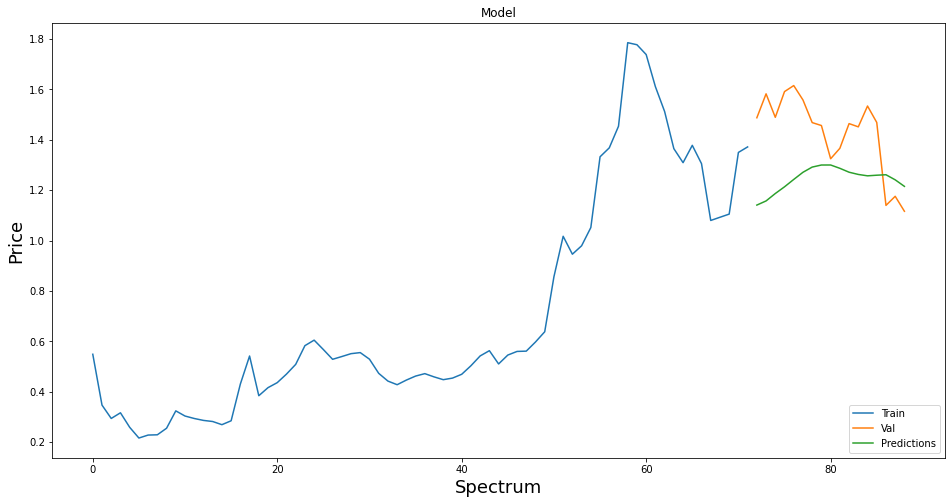

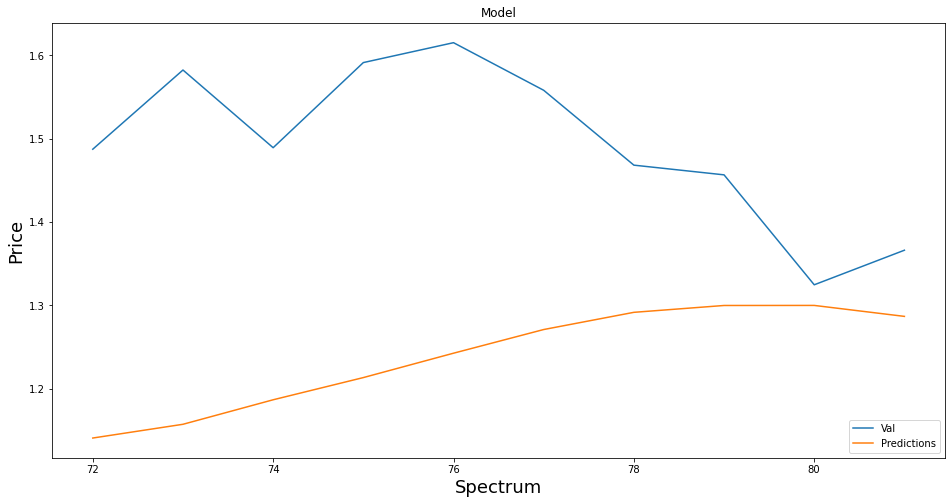

INFO:tensorflow:Assets written to: models/model_crypto_xrpust/assets


INFO:tensorflow:Assets written to: models/model_crypto_xrpust/assets


Error on xrpust!
Error on ctxusd!
Error on egldust!
Epoch 1/10
73/73 [==============================] - 4s 24ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0525 - mape: 705949.9661
Epoch 2/10
73/73 [==============================] - 2s 24ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0356 - mape: 325191.8675
Epoch 3/10
73/73 [==============================] - 2s 23ms/step - loss: 0.0020 - mse: 0.0020 - mae: 0.0332 - mape: 1828849.0165
Epoch 4/10
73/73 [==============================] - 2s 24ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0333 - mape: 1375124.6146
Epoch 5/10
73/73 [==============================] - 2s 24ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0342 - mape: 532285.2001
Epoch 6/10
73/73 [==============================] - 2s 24ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0275 - mape: 117519.5865
Epoch 7/10
73/73 [==============================] - 2s 27ms/step - loss: 9.0205e-04 - mse: 9.0205e-04 - mae: 0.0249 - mape: 875146.6187 - loss: 5.9618e-04 - mse: 5.9618e-04 - m
E

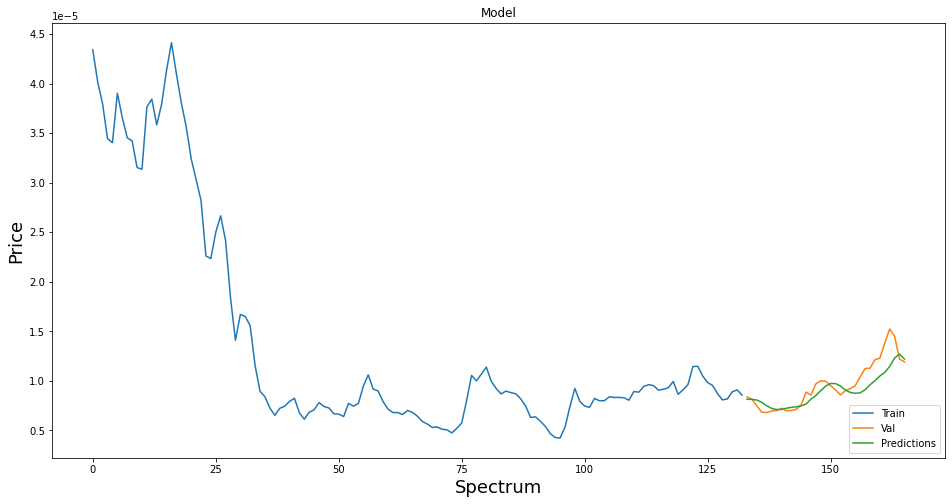

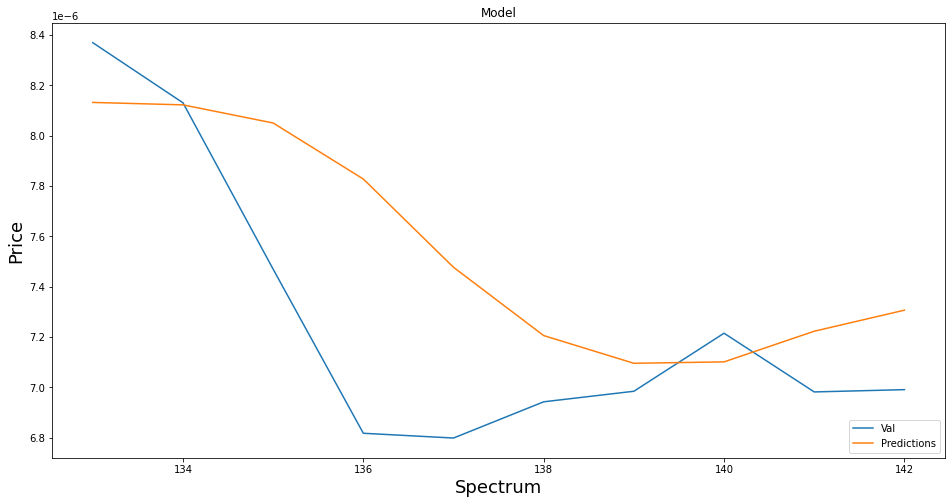

INFO:tensorflow:Assets written to: models/model_crypto_xlmbtc/assets


INFO:tensorflow:Assets written to: models/model_crypto_xlmbtc/assets


Error on xlmbtc!
Error on omnbtc!
Epoch 1/10
765/765 [==============================] - 25s 27ms/step - loss: 0.0070 - mse: 0.0070 - mae: 0.0507 - mape: 31316.0475
Epoch 2/10
765/765 [==============================] - 21s 28ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0268 - mape: 851.0331
Epoch 3/10
765/765 [==============================] - 21s 28ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0303 - mape: 64431.0332
Epoch 4/10
765/765 [==============================] - 22s 29ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0257 - mape: 200.6197
Epoch 5/10
765/765 [==============================] - 22s 28ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0207 - mape: 16263.9061
Epoch 6/10
765/765 [==============================] - 21s 28ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0222 - mape: 465.2096
Epoch 7/10
765/765 [==============================] - 22s 28ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0199 - mape: 1845.4484
Epoch 8/10
765/765 [==============================] - 21s 28ms/

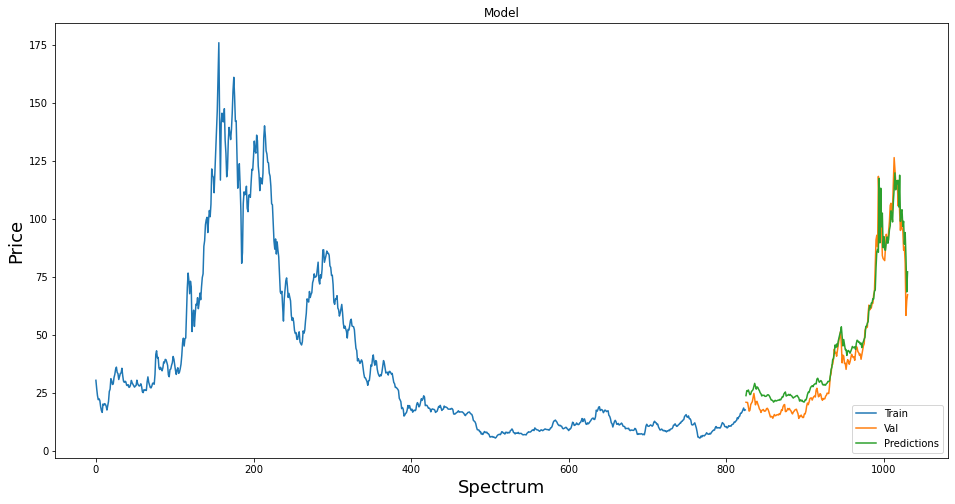

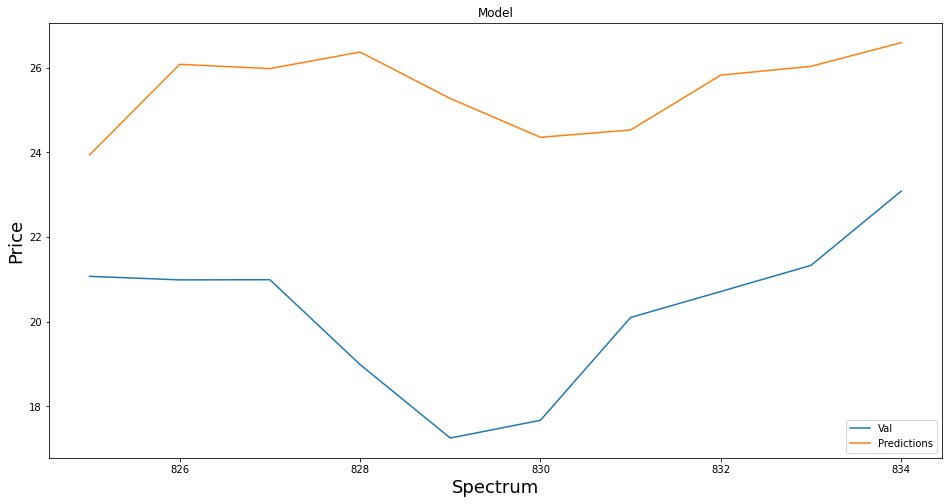

INFO:tensorflow:Assets written to: models/model_crypto_neousd/assets


INFO:tensorflow:Assets written to: models/model_crypto_neousd/assets


Error on neousd!
Epoch 1/10
197/197 [==============================] - 10s 27ms/step - loss: 0.0362 - mse: 0.0362 - mae: 0.1048 - mape: 738922.3149
Epoch 2/10
197/197 [==============================] - 5s 27ms/step - loss: 0.0102 - mse: 0.0102 - mae: 0.0679 - mape: 1749866.2697
Epoch 3/10
197/197 [==============================] - 5s 27ms/step - loss: 0.0070 - mse: 0.0070 - mae: 0.0543 - mape: 420583.8163
Epoch 4/10
197/197 [==============================] - 6s 30ms/step - loss: 0.0161 - mse: 0.0161 - mae: 0.0778 - mape: 569256.7126
Epoch 5/10
197/197 [==============================] - 5s 28ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0516 - mape: 621402.3353
Epoch 6/10
197/197 [==============================] - 5s 28ms/step - loss: 0.0055 - mse: 0.0055 - mae: 0.0413 - mape: 101557.8141
Epoch 7/10
197/197 [==============================] - 6s 30ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0649 - mape: 120876.8409
Epoch 8/10
197/197 [==============================] - 5s 25ms/step - lo

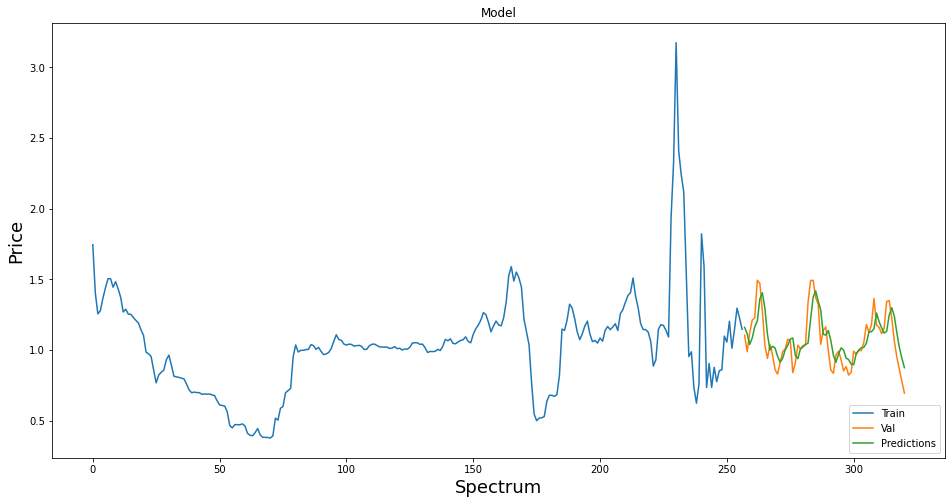

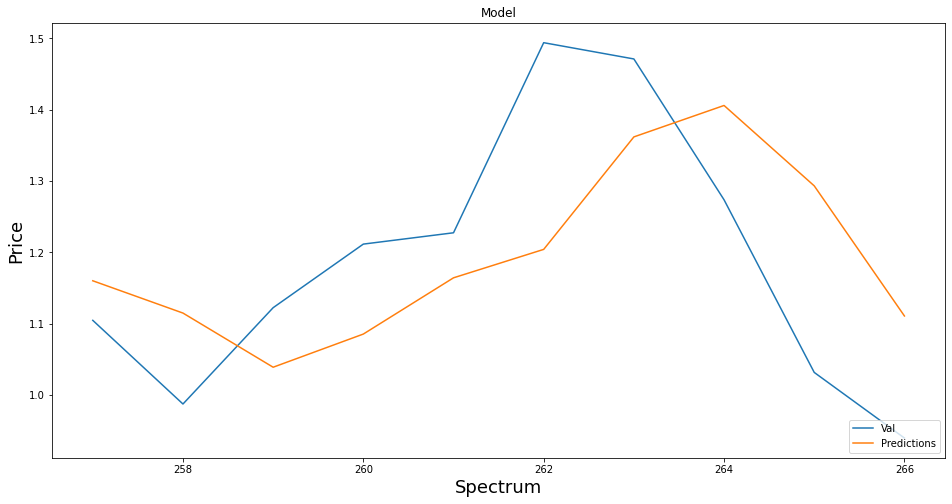

INFO:tensorflow:Assets written to: models/model_crypto_ampust/assets


INFO:tensorflow:Assets written to: models/model_crypto_ampust/assets


Error on ampust!
Error on orsusd!
Epoch 1/10
268/268 [==============================] - 12s 30ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0393 - mape: 128160.7309
Epoch 2/10
268/268 [==============================] - 8s 28ms/step - loss: 8.9011e-04 - mse: 8.9011e-04 - mae: 0.0220 - mape: 30259.1367
Epoch 3/10
268/268 [==============================] - 7s 28ms/step - loss: 4.3022e-04 - mse: 4.3022e-04 - mae: 0.0160 - mape: 1766.5338
Epoch 4/10
268/268 [==============================] - 7s 28ms/step - loss: 4.8487e-04 - mse: 4.8487e-04 - mae: 0.0167 - mape: 5669.0188
Epoch 5/10
268/268 [==============================] - 7s 27ms/step - loss: 2.9910e-04 - mse: 2.9910e-04 - mae: 0.0121 - mape: 22989.9808
Epoch 6/10
268/268 [==============================] - 7s 28ms/step - loss: 5.4283e-04 - mse: 5.4283e-04 - mae: 0.0169 - mape: 7115.9535
Epoch 7/10
268/268 [==============================] - 8s 29ms/step - loss: 2.8201e-04 - mse: 2.8201e-04 - mae: 0.0121 - mape: 3753.5562
Epoch 8/10
268/26

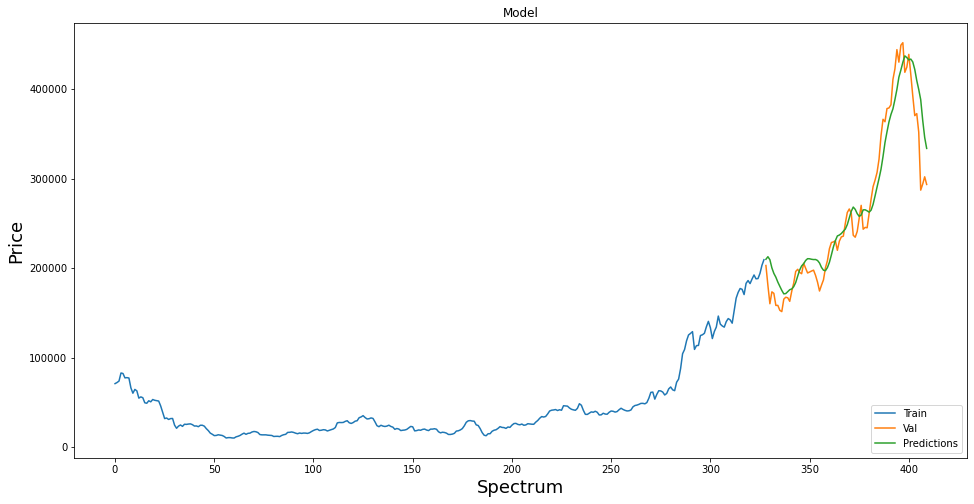

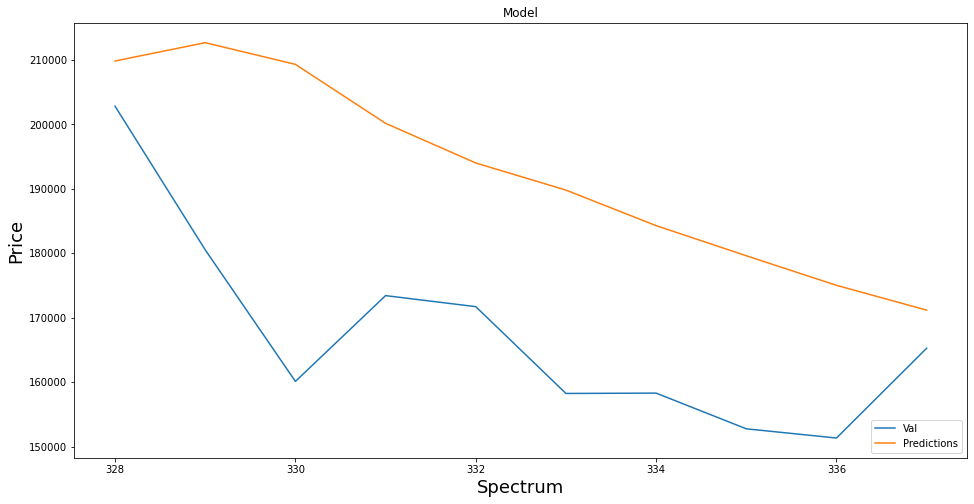

INFO:tensorflow:Assets written to: models/model_crypto_ethjpy/assets


INFO:tensorflow:Assets written to: models/model_crypto_ethjpy/assets


Error on ethjpy!
Error on veeusd!
Error on fetusd!
Error on bchnusd!
Error on necusd!
Epoch 1/10
15/15 [==============================] - 7s 27ms/step - loss: 7.2662e-04 - mse: 7.2662e-04 - mae: 0.0218 - mape: 36.4962
Epoch 2/10
15/15 [==============================] - 0s 27ms/step - loss: 9.1125e-05 - mse: 9.1125e-05 - mae: 0.0066 - mape: 10.7794
Epoch 3/10
15/15 [==============================] - 0s 29ms/step - loss: 6.2603e-05 - mse: 6.2603e-05 - mae: 0.0059 - mape: 9.1337
Epoch 4/10
15/15 [==============================] - 0s 28ms/step - loss: 1.0907e-04 - mse: 1.0907e-04 - mae: 0.0080 - mape: 12.4378
Epoch 5/10
15/15 [==============================] - 0s 29ms/step - loss: 6.2746e-05 - mse: 6.2746e-05 - mae: 0.0065 - mape: 10.0471
Epoch 6/10
15/15 [==============================] - 0s 27ms/step - loss: 2.4443e-04 - mse: 2.4443e-04 - mae: 0.0146 - mape: 22.7675
Epoch 7/10
15/15 [==============================] - 0s 28ms/step - loss: 1.5267e-04 - mse: 1.5267e-04 - mae: 0.0105 - mape:

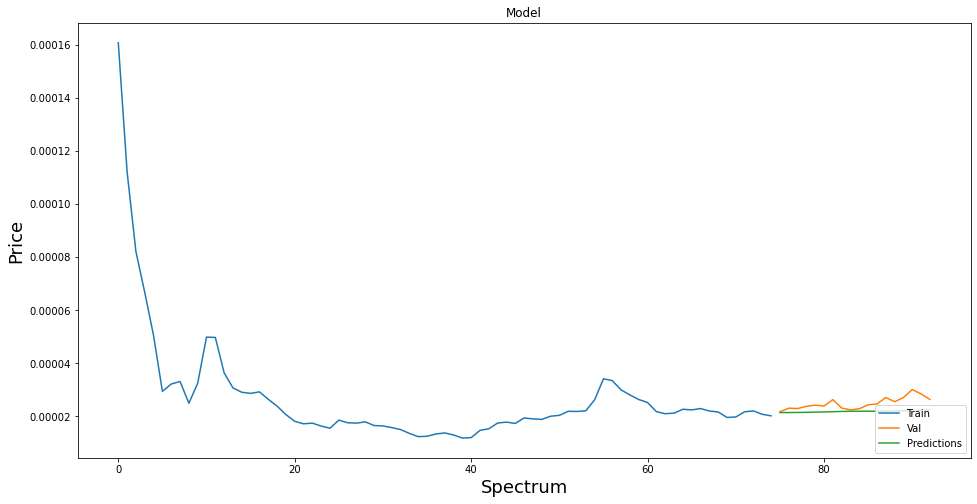

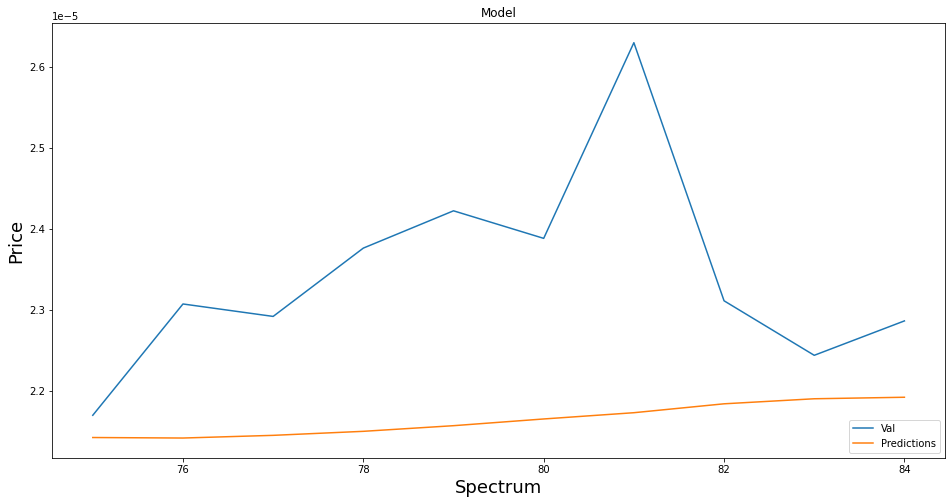

INFO:tensorflow:Assets written to: models/model_crypto_algbtc/assets


INFO:tensorflow:Assets written to: models/model_crypto_algbtc/assets


Error on algbtc!
Epoch 1/10
7/7 [==============================] - 5s 27ms/step - loss: 0.0099 - mse: 0.0099 - mae: 0.0811 - mape: 57.3343
Epoch 2/10
7/7 [==============================] - 0s 26ms/step - loss: 5.6185e-04 - mse: 5.6185e-04 - mae: 0.0224 - mape: 16.4887
Epoch 3/10
7/7 [==============================] - 0s 29ms/step - loss: 2.5698e-04 - mse: 2.5698e-04 - mae: 0.0137 - mape: 10.5446
Epoch 4/10
7/7 [==============================] - 0s 29ms/step - loss: 8.2238e-04 - mse: 8.2238e-04 - mae: 0.0242 - mape: 20.0197
Epoch 5/10
7/7 [==============================] - 0s 26ms/step - loss: 1.7211e-04 - mse: 1.7211e-04 - mae: 0.0081 - mape: 6.1890
Epoch 6/10
7/7 [==============================] - 0s 26ms/step - loss: 5.6885e-04 - mse: 5.6885e-04 - mae: 0.0195 - mape: 14.4336
Epoch 7/10
7/7 [==============================] - 0s 28ms/step - loss: 5.6910e-04 - mse: 5.6910e-04 - mae: 0.0202 - mape: 16.5623
Epoch 8/10
7/7 [==============================] - 0s 26ms/step - loss: 2.5223e-04 

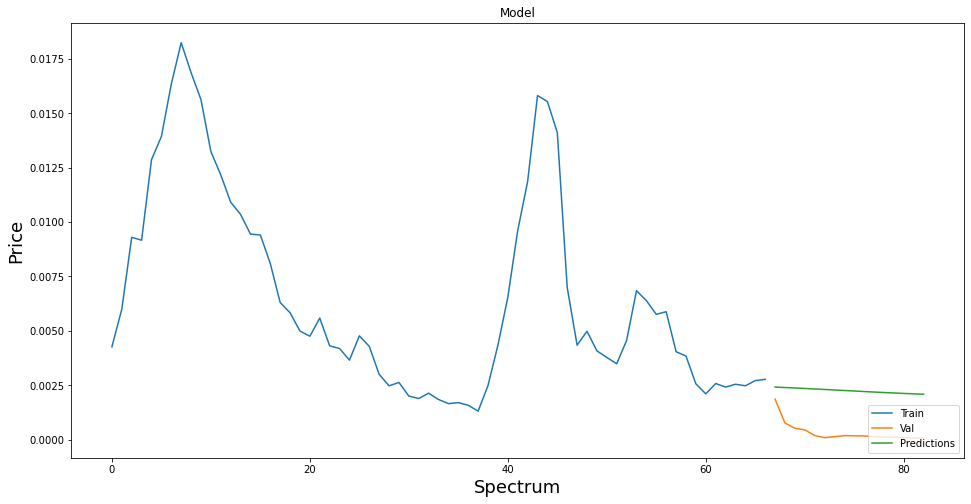

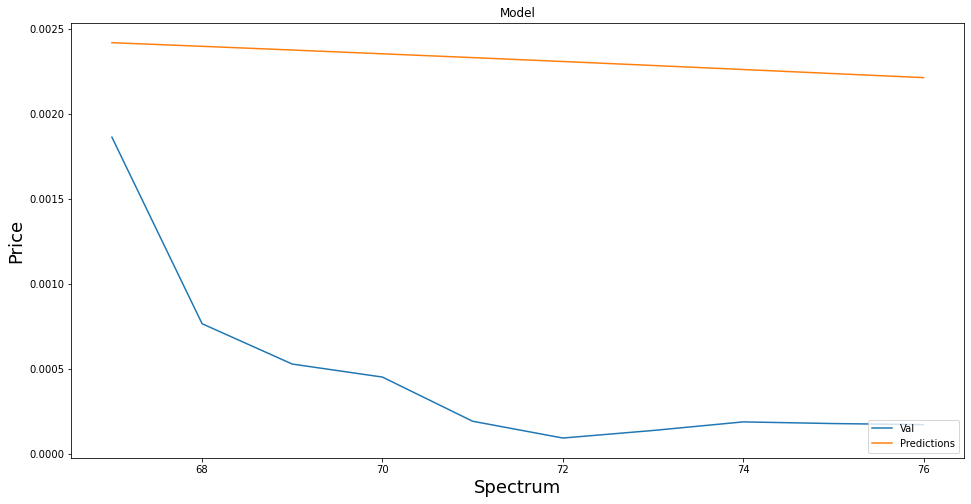

INFO:tensorflow:Assets written to: models/model_crypto_etpeth/assets


INFO:tensorflow:Assets written to: models/model_crypto_etpeth/assets


Error on etpeth!
Error on anteth!
Error on dogeust!
Epoch 1/10
46/46 [==============================] - 3s 29ms/step - loss: 0.2060 - mse: 0.2060 - mae: 0.3545 - mape: 51.2885
Epoch 2/10
46/46 [==============================] - 1s 26ms/step - loss: 0.0154 - mse: 0.0154 - mae: 0.0955 - mape: 20.6422
Epoch 3/10
46/46 [==============================] - 1s 26ms/step - loss: 0.0189 - mse: 0.0189 - mae: 0.1144 - mape: 24.9059
Epoch 4/10
46/46 [==============================] - 1s 20ms/step - loss: 0.0249 - mse: 0.0249 - mae: 0.1224 - mape: 23.9523
Epoch 5/10
46/46 [==============================] - 1s 27ms/step - loss: 0.0122 - mse: 0.0122 - mae: 0.0855 - mape: 20.1913
Epoch 6/10
46/46 [==============================] - 1s 27ms/step - loss: 0.0163 - mse: 0.0163 - mae: 0.1069 - mape: 22.9483
Epoch 7/10
46/46 [==============================] - 1s 28ms/step - loss: 0.0142 - mse: 0.0142 - mae: 0.0990 - mape: 21.4473
Epoch 8/10
46/46 [==============================] - 1s 27ms/step - loss: 0.0117 

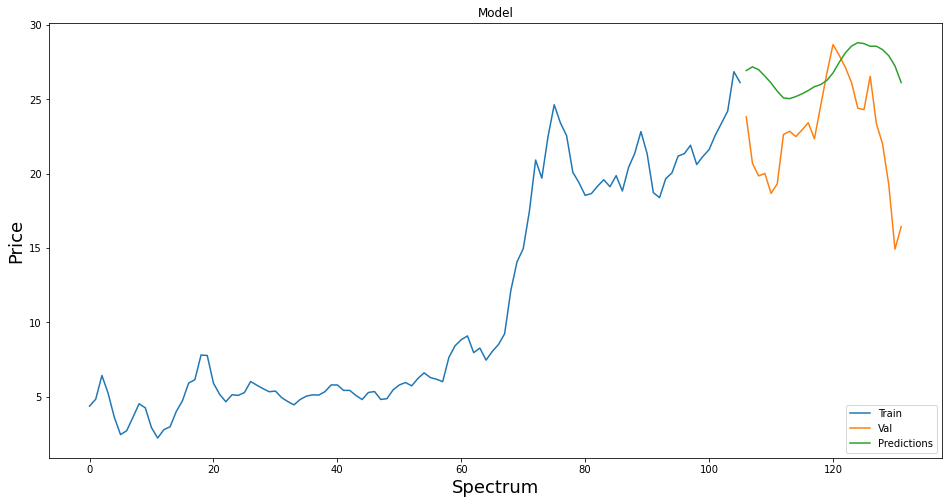

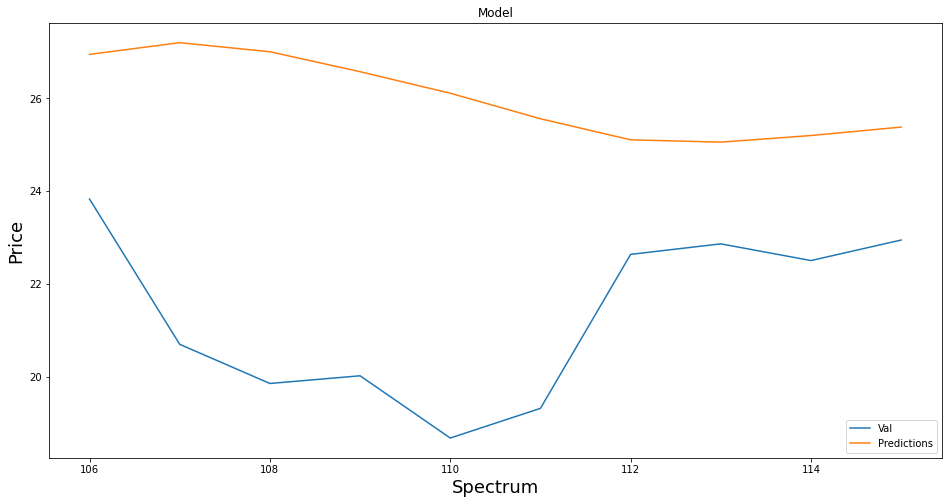

INFO:tensorflow:Assets written to: models/model_crypto_atousd/assets


INFO:tensorflow:Assets written to: models/model_crypto_atousd/assets


Error on atousd!
Error on linkf0ustf0!
Error on ustcnht!
Error on testbtcf0testusdtf0!
Epoch 1/10
300/300 [==============================] - 14s 29ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0135 - mape: 39200.9915
Epoch 2/10
300/300 [==============================] - 8s 27ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0174 - mape: 150920.3440
Epoch 3/10
300/300 [==============================] - 8s 27ms/step - loss: 0.0115 - mse: 0.0115 - mae: 0.0323 - mape: 1285604.4142
Epoch 4/10
300/300 [==============================] - 11s 35ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0115 - mape: 109871.5228
Epoch 5/10
300/300 [==============================] - 8s 28ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0132 - mape: 278556.8517
Epoch 6/10
300/300 [==============================] - 8s 25ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0103 - mape: 87143.7078
Epoch 7/10
300/300 [==============================] - 8s 28ms/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0196 - mape: 198971.9178
Ep

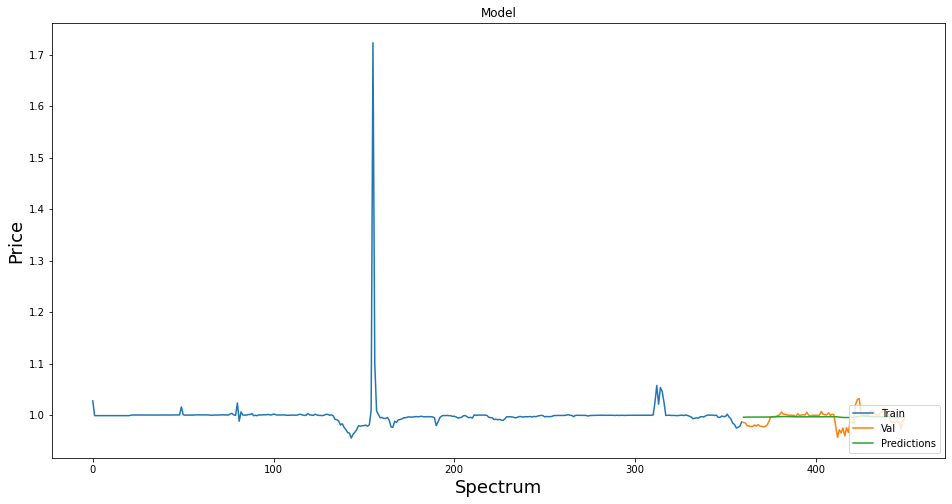

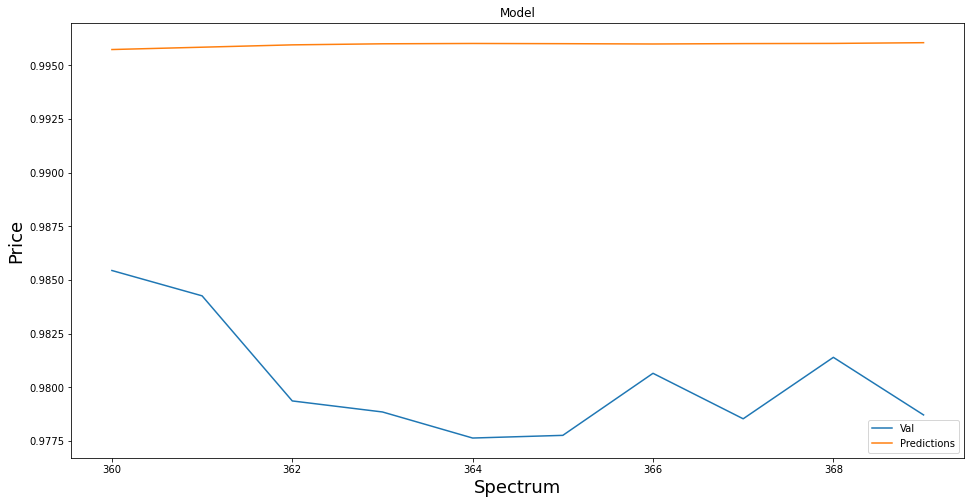

INFO:tensorflow:Assets written to: models/model_crypto_rbtbtc/assets


INFO:tensorflow:Assets written to: models/model_crypto_rbtbtc/assets


Error on rbtbtc!
Epoch 1/10
192/192 [==============================] - 13s 27ms/step - loss: 0.0079 - mse: 0.0079 - mae: 0.0589 - mape: 322527.2963
Epoch 2/10
192/192 [==============================] - 5s 28ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0348 - mape: 342118.7653
Epoch 3/10
192/192 [==============================] - 5s 28ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0237 - mape: 459910.5594
Epoch 4/10
192/192 [==============================] - 6s 31ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0238 - mape: 415367.2502
Epoch 5/10
192/192 [==============================] - 5s 28ms/step - loss: 8.8557e-04 - mse: 8.8557e-04 - mae: 0.0199 - mape: 564087.4518
Epoch 6/10
192/192 [==============================] - 5s 28ms/step - loss: 9.5266e-04 - mse: 9.5266e-04 - mae: 0.0219 - mape: 279300.7504
Epoch 7/10
192/192 [==============================] - 5s 27ms/step - loss: 9.4979e-04 - mse: 9.4979e-04 - mae: 0.0229 - mape: 526690.9162
Epoch 8/10
192/192 [============================

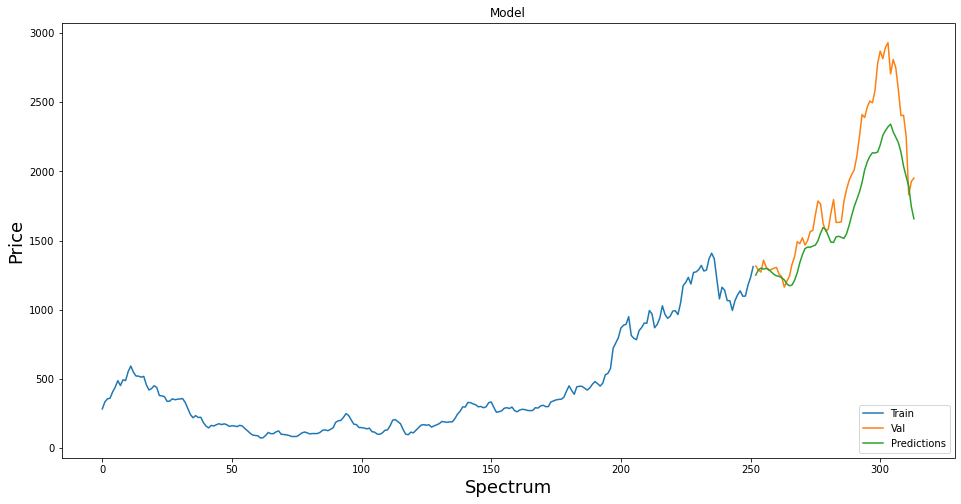

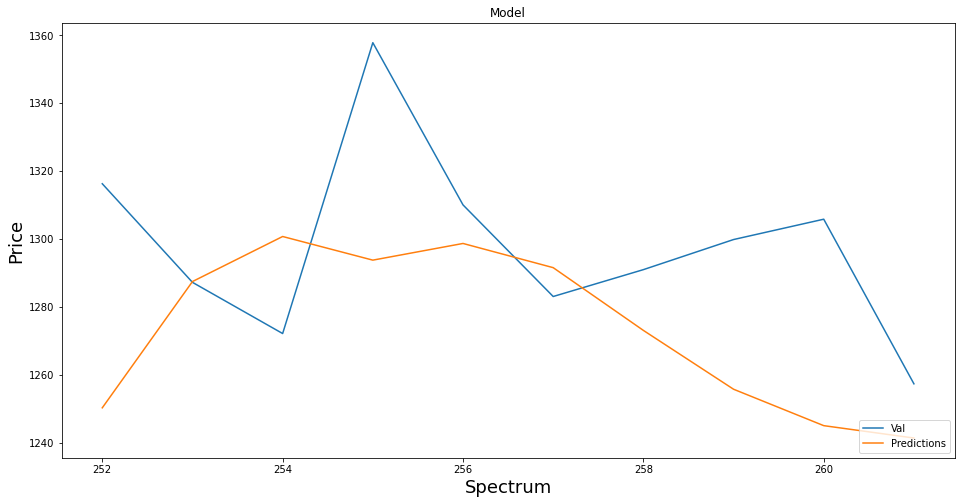

INFO:tensorflow:Assets written to: models/model_crypto_ethgbp/assets


INFO:tensorflow:Assets written to: models/model_crypto_ethgbp/assets


Error on ethgbp!
Error on bmiusd!
Error on bateth!
Error on jstust!
Error on leobtc!
Epoch 1/10
172/172 [==============================] - 8s 30ms/step - loss: 0.0376 - mse: 0.0376 - mae: 0.1341 - mape: 64.2828
Epoch 2/10
172/172 [==============================] - 5s 28ms/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0736 - mape: 41.8222
Epoch 3/10
172/172 [==============================] - 5s 28ms/step - loss: 0.0088 - mse: 0.0088 - mae: 0.0578 - mape: 20.8756
Epoch 4/10
172/172 [==============================] - 5s 27ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0518 - mape: 21.1725
Epoch 5/10
172/172 [==============================] - 4s 26ms/step - loss: 0.0068 - mse: 0.0068 - mae: 0.0544 - mape: 25.8088
Epoch 6/10
172/172 [==============================] - 4s 23ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0390 - mape: 18.6541: 1s - loss: 0.0034 - mse: 0.00
Epoch 7/10
172/172 [==============================] - 4s 22ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0454 - mape: 17.8740
Ep

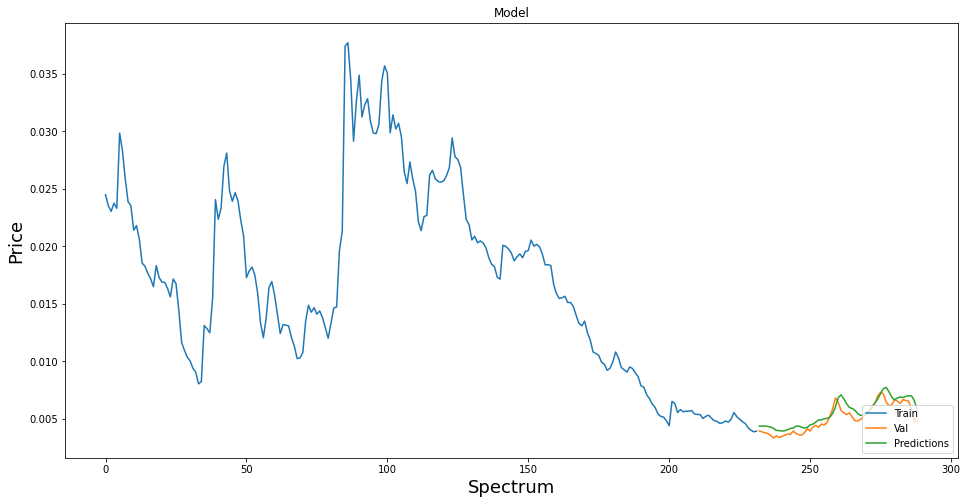

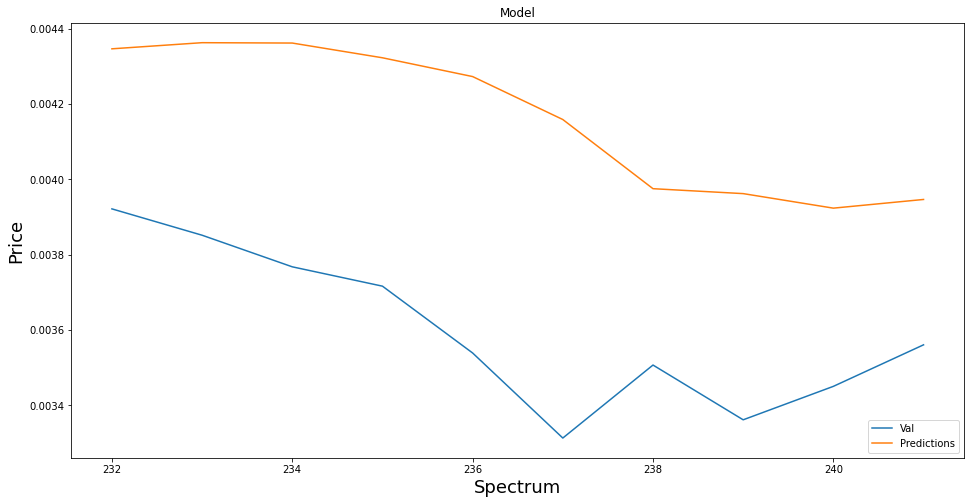

INFO:tensorflow:Assets written to: models/model_crypto_bsvbtc/assets


INFO:tensorflow:Assets written to: models/model_crypto_bsvbtc/assets


Error on bsvbtc!
Error on bchabcusd!
Epoch 1/10
11/11 [==============================] - 6s 27ms/step - loss: 0.1396 - mse: 0.1396 - mae: 0.3488 - mape: 62.1087
Epoch 2/10
11/11 [==============================] - 0s 27ms/step - loss: 0.0206 - mse: 0.0206 - mae: 0.1235 - mape: 20.2019
Epoch 3/10
11/11 [==============================] - 0s 27ms/step - loss: 0.0108 - mse: 0.0108 - mae: 0.0854 - mape: 14.9029
Epoch 4/10
11/11 [==============================] - 0s 28ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0497 - mape: 8.5130
Epoch 5/10
11/11 [==============================] - 0s 28ms/step - loss: 0.0105 - mse: 0.0105 - mae: 0.0823 - mape: 13.0541
Epoch 6/10
11/11 [==============================] - 0s 28ms/step - loss: 0.0104 - mse: 0.0104 - mae: 0.0790 - mape: 12.5735
Epoch 7/10
11/11 [==============================] - 0s 27ms/step - loss: 0.0059 - mse: 0.0059 - mae: 0.0597 - mape: 10.3164
Epoch 8/10
11/11 [==============================] - 0s 28ms/step - loss: 0.0061 - mse: 0.0061 - 

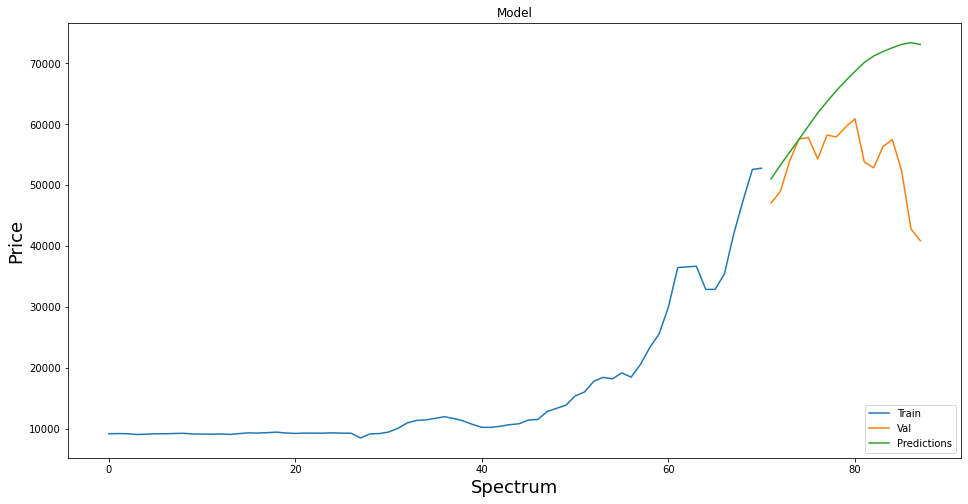

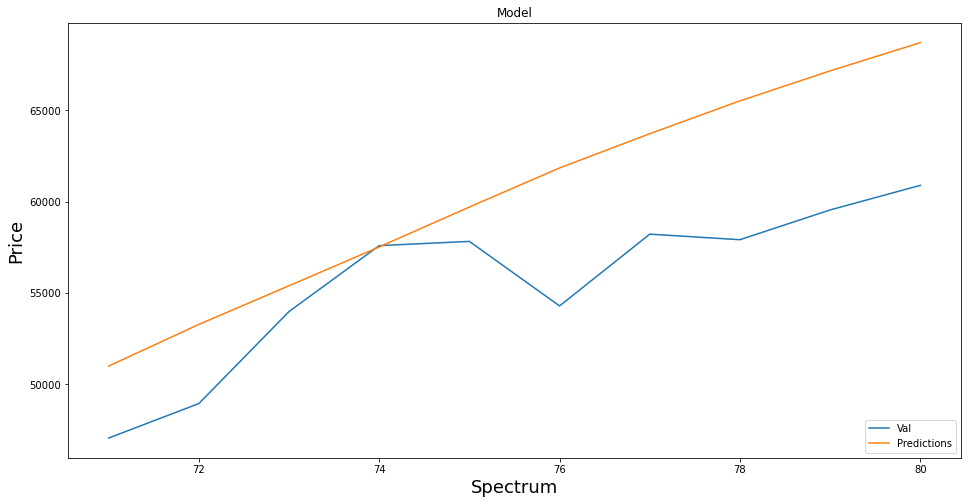

INFO:tensorflow:Assets written to: models/model_crypto_aaabbb/assets


INFO:tensorflow:Assets written to: models/model_crypto_aaabbb/assets


Error on aaabbb!
Error on nutust!
Error on snxust!
Epoch 1/10
102/102 [==============================] - 7s 28ms/step - loss: 0.0335 - mse: 0.0335 - mae: 0.1302 - mape: 67.8174
Epoch 2/10
102/102 [==============================] - 3s 28ms/step - loss: 0.0455 - mse: 0.0455 - mae: 0.1492 - mape: 57.4532
Epoch 3/10
102/102 [==============================] - 3s 28ms/step - loss: 0.0138 - mse: 0.0138 - mae: 0.0900 - mape: 51.8307
Epoch 4/10
102/102 [==============================] - 3s 28ms/step - loss: 0.0171 - mse: 0.0171 - mae: 0.1011 - mape: 56.7652
Epoch 5/10
102/102 [==============================] - 3s 27ms/step - loss: 0.0052 - mse: 0.0052 - mae: 0.0529 - mape: 26.6428
Epoch 6/10
102/102 [==============================] - 3s 28ms/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0598 - mape: 27.7550
Epoch 7/10
102/102 [==============================] - 3s 28ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0593 - mape: 28.5050
Epoch 8/10
102/102 [==============================] - 3s 28ms/step 

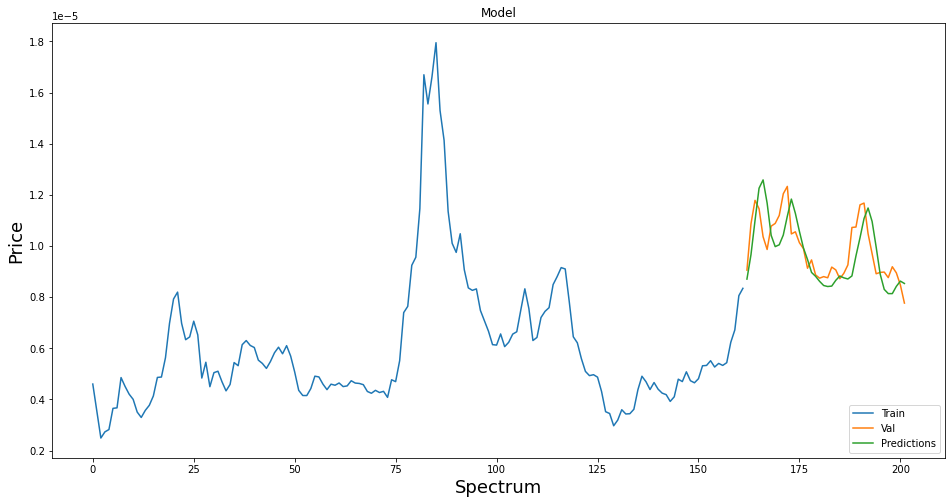

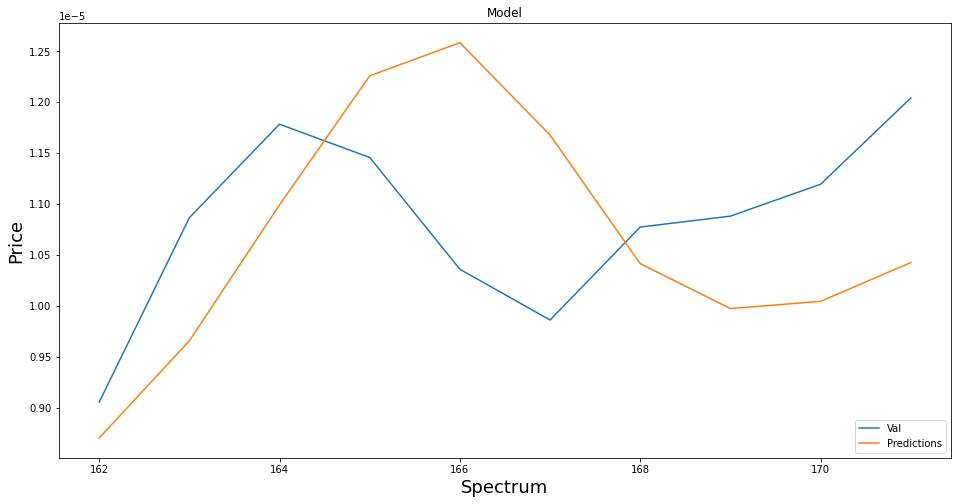

INFO:tensorflow:Assets written to: models/model_crypto_uosbtc/assets


INFO:tensorflow:Assets written to: models/model_crypto_uosbtc/assets


Error on uosbtc!
Error on wbteth!
Error on duskbtc!
Epoch 1/10
75/75 [==============================] - 9s 28ms/step - loss: 0.0505 - mse: 0.0505 - mae: 0.1599 - mape: 268417.7692
Epoch 2/10
75/75 [==============================] - 2s 28ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0322 - mape: 3603.9931
Epoch 3/10
75/75 [==============================] - 2s 28ms/step - loss: 0.0061 - mse: 0.0061 - mae: 0.0516 - mape: 682072.8236
Epoch 4/10
75/75 [==============================] - 2s 28ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0398 - mape: 400526.4213
Epoch 5/10
75/75 [==============================] - 2s 28ms/step - loss: 0.0053 - mse: 0.0053 - mae: 0.0497 - mape: 266103.3261
Epoch 6/10
75/75 [==============================] - 2s 28ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0440 - mape: 30565.2955
Epoch 7/10
75/75 [==============================] - 2s 28ms/step - loss: 0.0032 - mse: 0.0032 - mae: 0.0345 - mape: 390368.6570
Epoch 8/10
75/75 [==============================] - 2s 

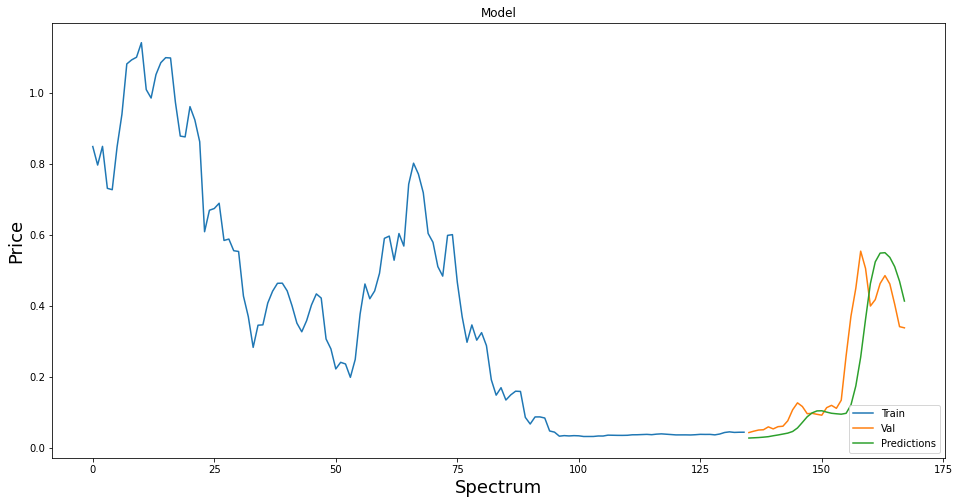

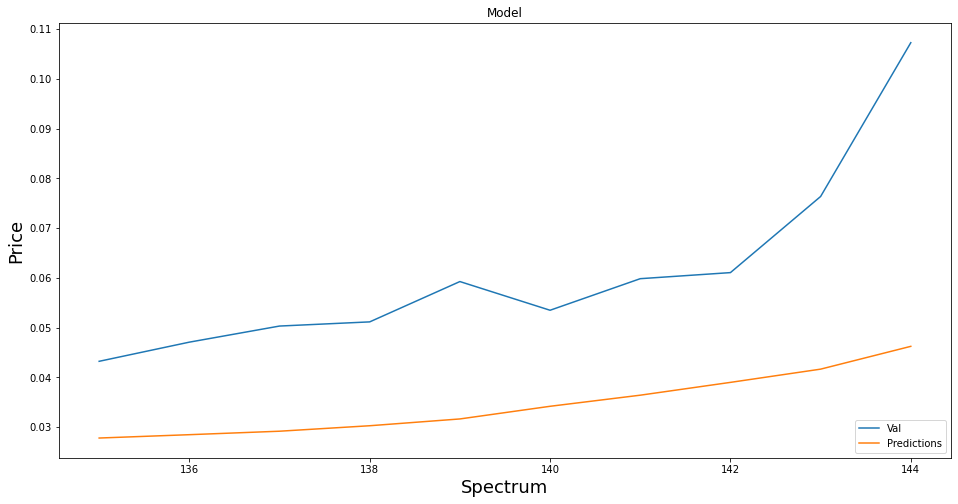

INFO:tensorflow:Assets written to: models/model_crypto_gntusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_gntusd/assets


Error on gntusd!
Error on albtusd!
Error on eth2xust!
Error on rrbusd!
Error on paxust!
Epoch 1/10
24/24 [==============================] - 5s 26ms/step - loss: 0.0617 - mse: 0.0617 - mae: 0.2053 - mape: 49.6253
Epoch 2/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0085 - mse: 0.0085 - mae: 0.0684 - mape: 16.6410
Epoch 3/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0598 - mape: 15.1406
Epoch 4/10
24/24 [==============================] - 1s 27ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0441 - mape: 11.4232
Epoch 5/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0044 - mse: 0.0044 - mae: 0.0469 - mape: 12.6632
Epoch 6/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0036 - mse: 0.0036 - mae: 0.0458 - mape: 11.6182
Epoch 7/10
24/24 [==============================] - 1s 28ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0522 - mape: 13.0533
Epoch 8/10
24/24 [==========================

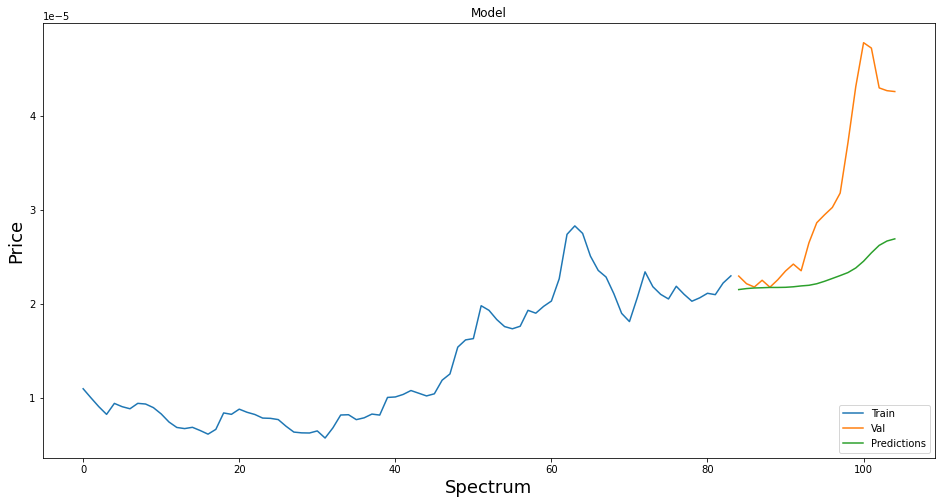

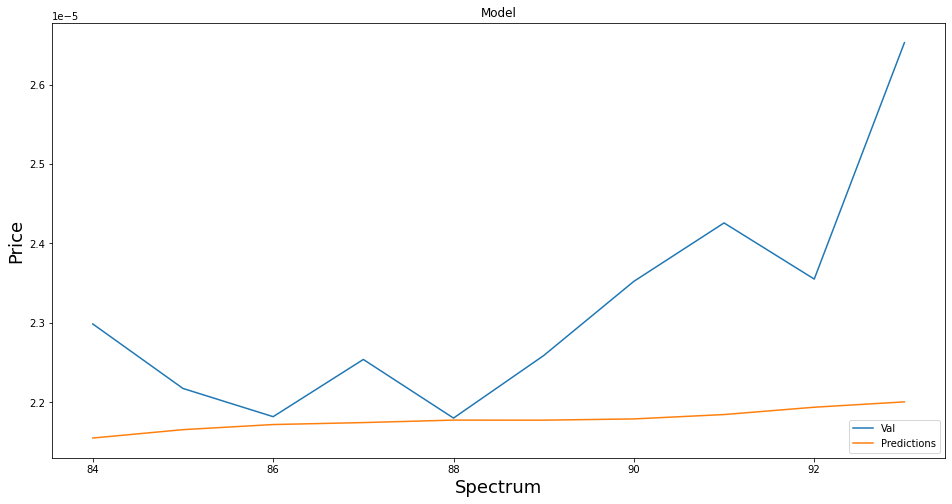

INFO:tensorflow:Assets written to: models/model_crypto_adabtc/assets


INFO:tensorflow:Assets written to: models/model_crypto_adabtc/assets


Error on adabtc!
Epoch 1/10
1551/1551 [==============================] - 48s 28ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0353 - mape: 6807.0626
Epoch 2/10
1551/1551 [==============================] - 43s 28ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0185 - mape: 1554.4111
Epoch 3/10
1551/1551 [==============================] - 46s 29ms/step - loss: 5.0661e-04 - mse: 5.0661e-04 - mae: 0.0148 - mape: 8021.0367
Epoch 4/10
1551/1551 [==============================] - 45s 29ms/step - loss: 6.9909e-04 - mse: 6.9909e-04 - mae: 0.0152 - mape: 6059.8050
Epoch 5/10
1551/1551 [==============================] - 43s 28ms/step - loss: 3.7108e-04 - mse: 3.7108e-04 - mae: 0.0122 - mape: 27547.5175
Epoch 6/10
1551/1551 [==============================] - 43s 28ms/step - loss: 4.9982e-04 - mse: 4.9982e-04 - mae: 0.0136 - mape: 18768.7376
Epoch 7/10
1551/1551 [==============================] - 44s 28ms/step - loss: 3.1443e-04 - mse: 3.1443e-04 - mae: 0.0113 - mape: 15682.8908
Epoch 8/10
1551/1551 [=

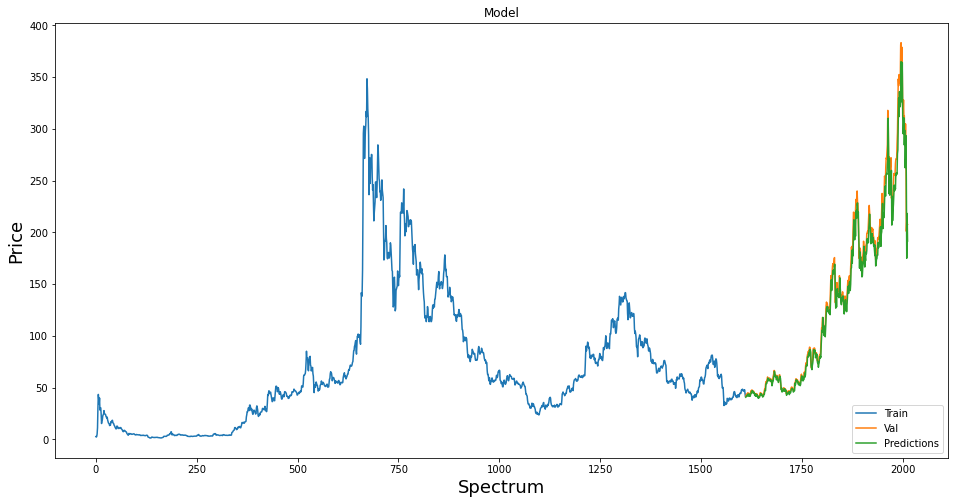

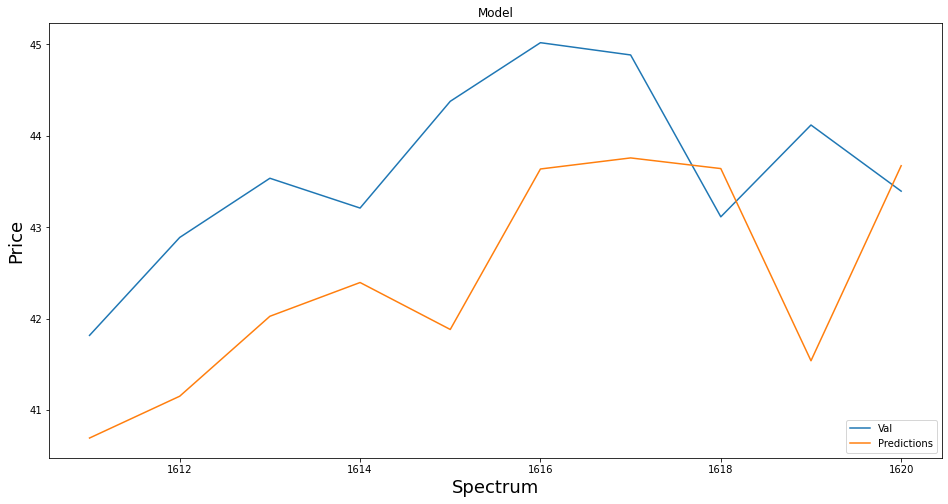

INFO:tensorflow:Assets written to: models/model_crypto_ltcusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_ltcusd/assets


Error on ltcusd!
Epoch 1/10
84/84 [==============================] - 6s 27ms/step - loss: 0.0631 - mse: 0.0631 - mae: 0.1743 - mape: 664182.7318
Epoch 2/10
84/84 [==============================] - 2s 28ms/step - loss: 0.0164 - mse: 0.0164 - mae: 0.0991 - mape: 1063502.2862
Epoch 3/10
84/84 [==============================] - 3s 33ms/step - loss: 0.0146 - mse: 0.0146 - mae: 0.0851 - mape: 353235.5128
Epoch 4/10
84/84 [==============================] - 2s 28ms/step - loss: 0.0164 - mse: 0.0164 - mae: 0.0984 - mape: 337817.2186
Epoch 5/10
84/84 [==============================] - 2s 28ms/step - loss: 0.0117 - mse: 0.0117 - mae: 0.0778 - mape: 1003766.8367
Epoch 6/10
84/84 [==============================] - 2s 27ms/step - loss: 0.0099 - mse: 0.0099 - mae: 0.0720 - mape: 17349.9306
Epoch 7/10
84/84 [==============================] - 2s 28ms/step - loss: 0.0088 - mse: 0.0088 - mae: 0.0677 - mape: 379026.5683
Epoch 8/10
84/84 [==============================] - 2s 28ms/step - loss: 0.0088 - mse:

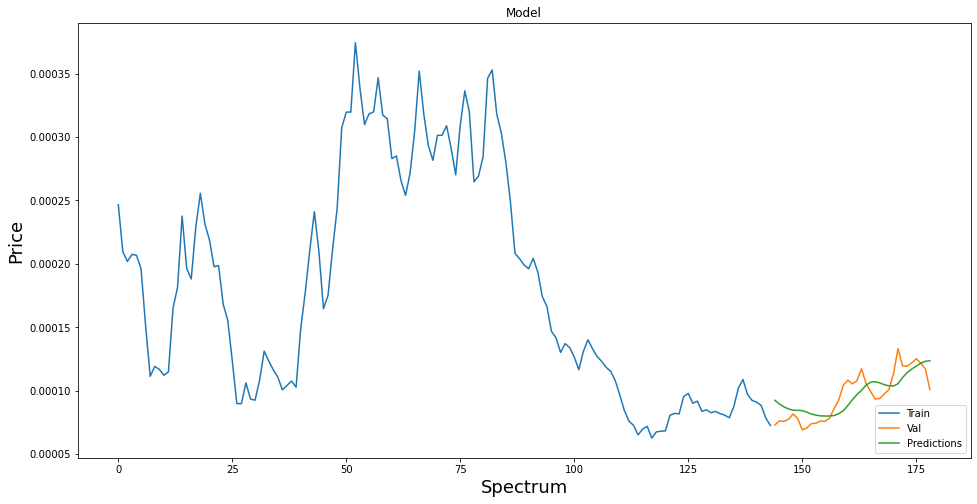

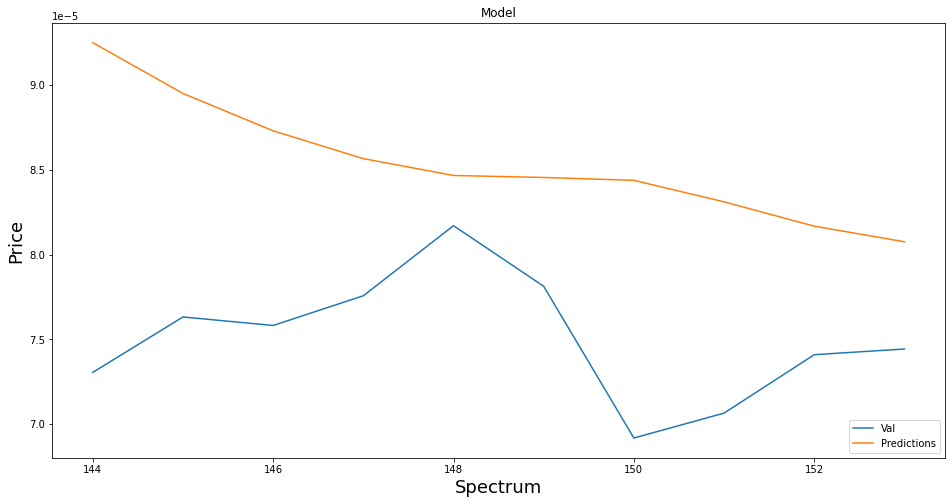

INFO:tensorflow:Assets written to: models/model_crypto_xtzbtc/assets


INFO:tensorflow:Assets written to: models/model_crypto_xtzbtc/assets


Error on xtzbtc!
Error on tsdusd!
Epoch 1/10
46/46 [==============================] - 5s 28ms/step - loss: 0.0812 - mse: 0.0812 - mae: 0.2057 - mape: 48.1864
Epoch 2/10
46/46 [==============================] - 1s 27ms/step - loss: 0.0189 - mse: 0.0189 - mae: 0.1152 - mape: 27.7709
Epoch 3/10
46/46 [==============================] - 1s 28ms/step - loss: 0.0157 - mse: 0.0157 - mae: 0.1085 - mape: 36.6492
Epoch 4/10
46/46 [==============================] - 1s 28ms/step - loss: 0.0115 - mse: 0.0115 - mae: 0.0852 - mape: 22.2247
Epoch 5/10
46/46 [==============================] - 1s 28ms/step - loss: 0.0141 - mse: 0.0141 - mae: 0.0981 - mape: 23.5597
Epoch 6/10
46/46 [==============================] - 1s 27ms/step - loss: 0.0114 - mse: 0.0114 - mae: 0.0842 - mape: 19.9943
Epoch 7/10
46/46 [==============================] - 1s 28ms/step - loss: 0.0170 - mse: 0.0170 - mae: 0.1082 - mape: 24.9611
Epoch 8/10
46/46 [==============================] - 1s 27ms/step - loss: 0.0117 - mse: 0.0117 - ma

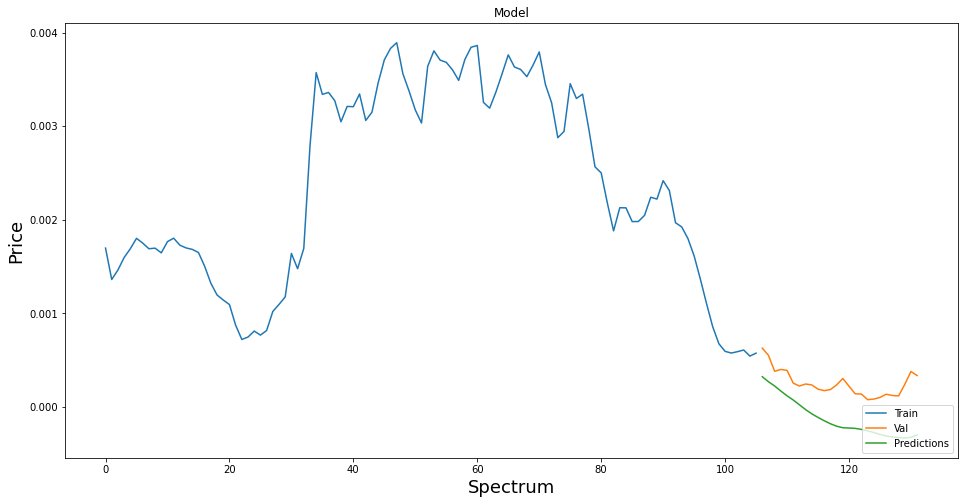

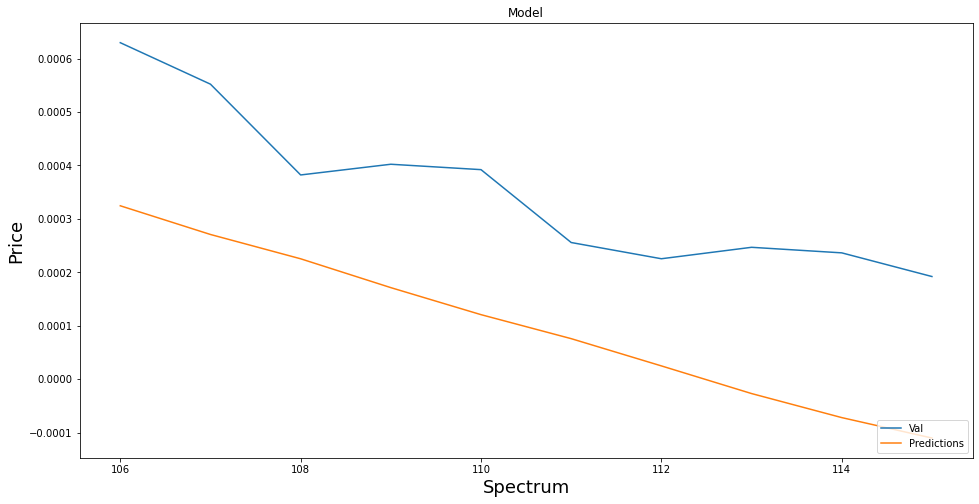

INFO:tensorflow:Assets written to: models/model_crypto_qtmbtc/assets


INFO:tensorflow:Assets written to: models/model_crypto_qtmbtc/assets


Error on qtmbtc!
Error on dtxusd!
Epoch 1/10
211/211 [==============================] - 10s 28ms/step - loss: 0.0077 - mse: 0.0077 - mae: 0.0622 - mape: 342593.0368
Epoch 2/10
211/211 [==============================] - 6s 28ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0416 - mape: 66060.4885
Epoch 3/10
211/211 [==============================] - 6s 29ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0324 - mape: 142801.1385
Epoch 4/10
211/211 [==============================] - 6s 28ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0378 - mape: 224770.7808
Epoch 5/10
211/211 [==============================] - 6s 28ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0459 - mape: 450351.1996
Epoch 6/10
211/211 [==============================] - 6s 29ms/step - loss: 0.0024 - mse: 0.0024 - mae: 0.0333 - mape: 33665.0353
Epoch 7/10
211/211 [==============================] - 5s 26ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0432 - mape: 22079.9039
Epoch 8/10
211/211 [==============================] - 6s 3

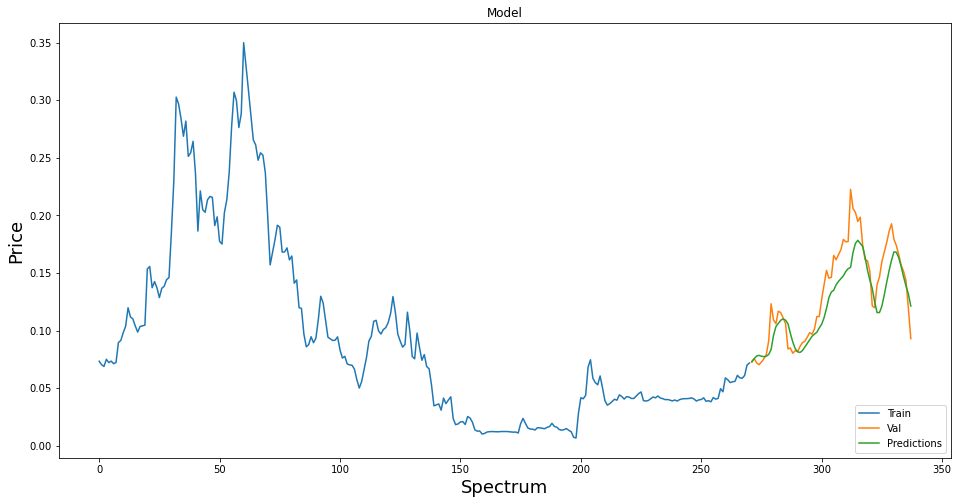

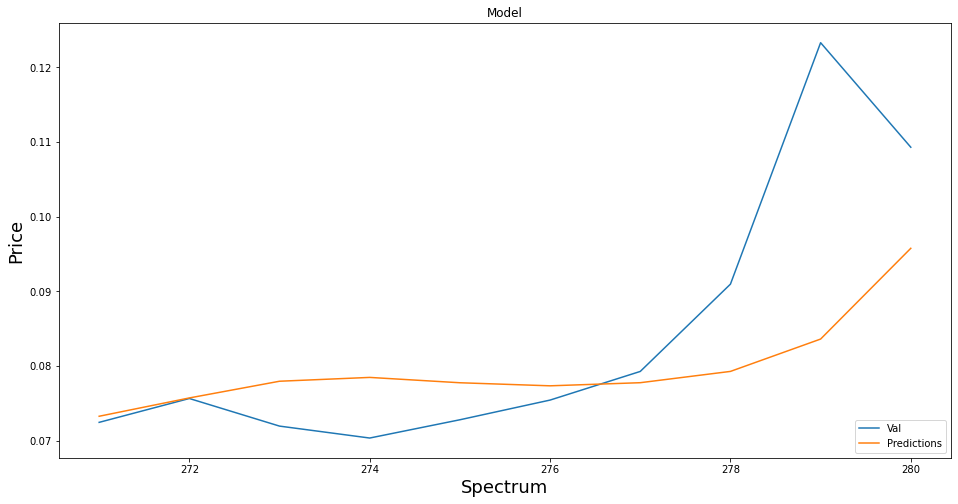

INFO:tensorflow:Assets written to: models/model_crypto_datusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_datusd/assets


Error on datusd!
Error on mkrbtc!
Epoch 1/10
528/528 [==============================] - 16s 27ms/step - loss: 0.0091 - mse: 0.0091 - mae: 0.0636 - mape: 20.6275
Epoch 2/10
528/528 [==============================] - 15s 28ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0412 - mape: 13.2729
Epoch 3/10
528/528 [==============================] - 15s 28ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0313 - mape: 11.1241
Epoch 4/10
528/528 [==============================] - 15s 28ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0294 - mape: 9.4593
Epoch 5/10
528/528 [==============================] - 15s 28ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0273 - mape: 9.6650
Epoch 6/10
528/528 [==============================] - 15s 28ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0252 - mape: 8.2321
Epoch 7/10
528/528 [==============================] - 16s 30ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0245 - mape: 8.1031
Epoch 8/10
528/528 [==============================] - 12s 23ms/step - loss: 0.001

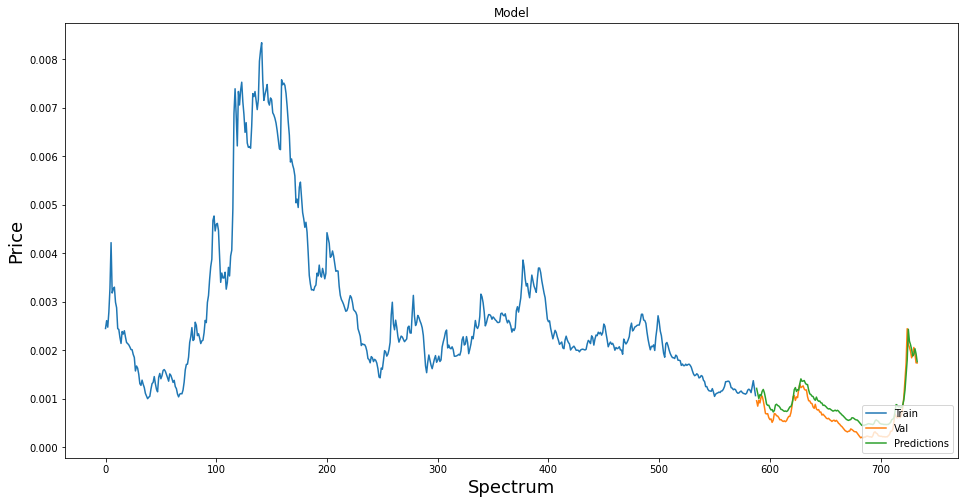

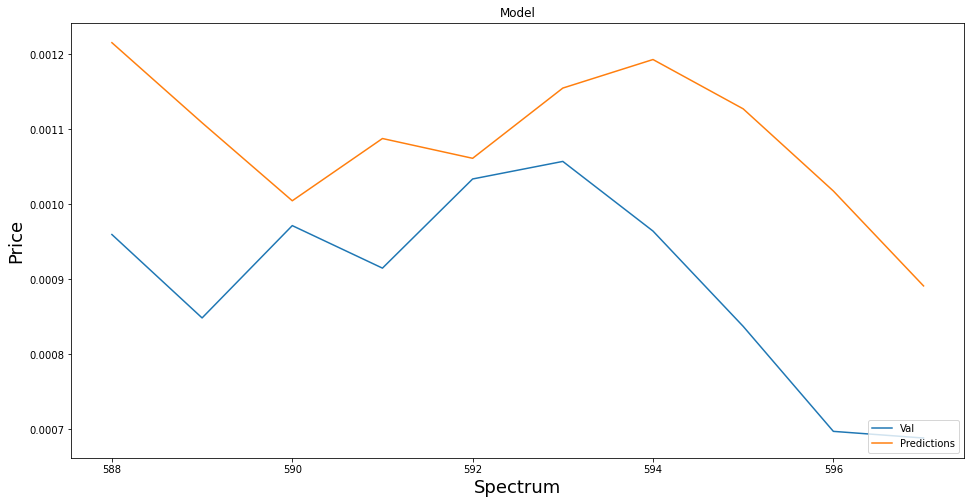

INFO:tensorflow:Assets written to: models/model_crypto_etcbtc/assets


INFO:tensorflow:Assets written to: models/model_crypto_etcbtc/assets


Error on etcbtc!
Error on exrdusd!
Error on btcf0ustf0!
Epoch 1/10
61/61 [==============================] - 5s 22ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0622 - mape: 51.4993
Epoch 2/10
61/61 [==============================] - 1s 22ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0301 - mape: 22.9265
Epoch 3/10
61/61 [==============================] - 2s 25ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0318 - mape: 24.0529
Epoch 4/10
61/61 [==============================] - 2s 26ms/step - loss: 6.9576e-04 - mse: 6.9576e-04 - mae: 0.0181 - mape: 14.4963
Epoch 5/10
61/61 [==============================] - 2s 27ms/step - loss: 0.0010 - mse: 0.0010 - mae: 0.0238 - mape: 19.6017 
Epoch 6/10
61/61 [==============================] - 2s 25ms/step - loss: 4.7757e-04 - mse: 4.7757e-04 - mae: 0.0165 - mape: 13.9420
Epoch 7/10
61/61 [==============================] - 2s 25ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0256 - mape: 22.7768
Epoch 8/10
61/61 [==============================] - 2s 27ms

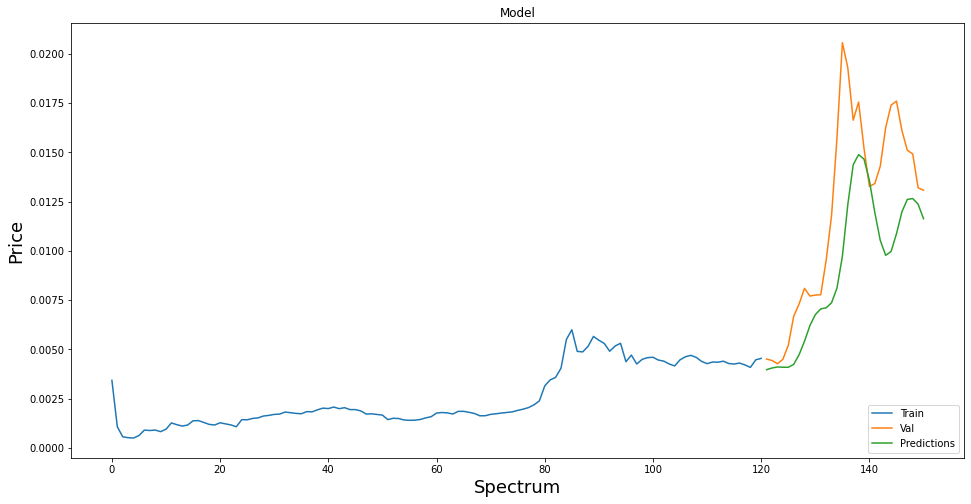

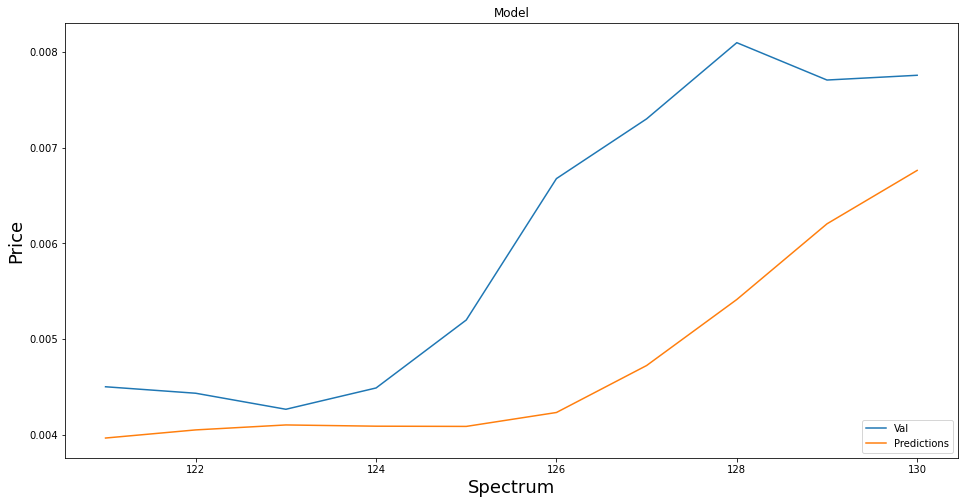

INFO:tensorflow:Assets written to: models/model_crypto_clousd/assets


INFO:tensorflow:Assets written to: models/model_crypto_clousd/assets


Error on clousd!
Error on solusd!
Error on gnteth!
Epoch 1/10
44/44 [==============================] - 4s 24ms/step - loss: 0.1107 - mse: 0.1107 - mae: 0.2560 - mape: 45.8040
Epoch 2/10
44/44 [==============================] - 1s 22ms/step - loss: 0.0303 - mse: 0.0303 - mae: 0.1109 - mape: 20.5346
Epoch 3/10
44/44 [==============================] - 1s 22ms/step - loss: 0.0315 - mse: 0.0315 - mae: 0.1552 - mape: 32.8213
Epoch 4/10
44/44 [==============================] - 1s 23ms/step - loss: 0.0363 - mse: 0.0363 - mae: 0.1521 - mape: 28.1512
Epoch 5/10
44/44 [==============================] - 1s 23ms/step - loss: 0.0161 - mse: 0.0161 - mae: 0.0944 - mape: 20.8636
Epoch 6/10
44/44 [==============================] - 1s 22ms/step - loss: 0.0200 - mse: 0.0200 - mae: 0.1236 - mape: 25.7690
Epoch 7/10
44/44 [==============================] - 1s 23ms/step - loss: 0.0230 - mse: 0.0230 - mae: 0.1317 - mape: 26.8520
Epoch 8/10
44/44 [==============================] - 1s 24ms/step - loss: 0.0136 -

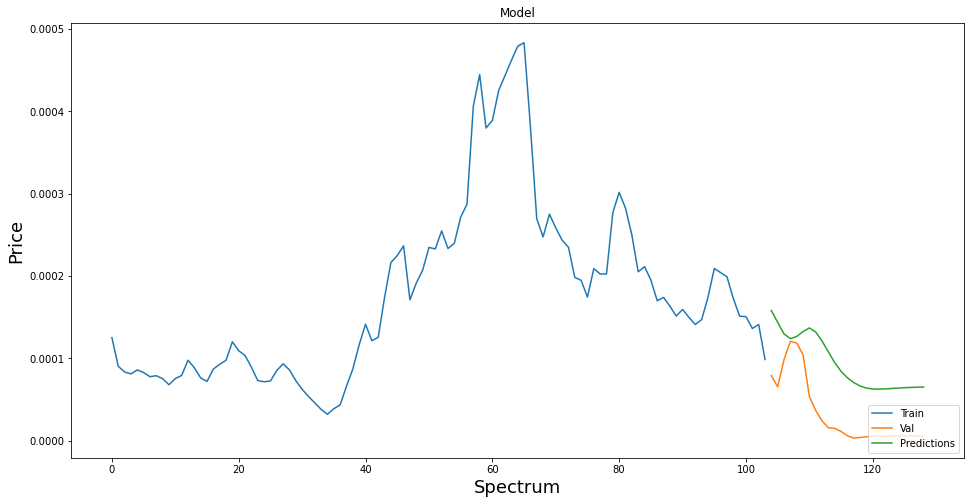

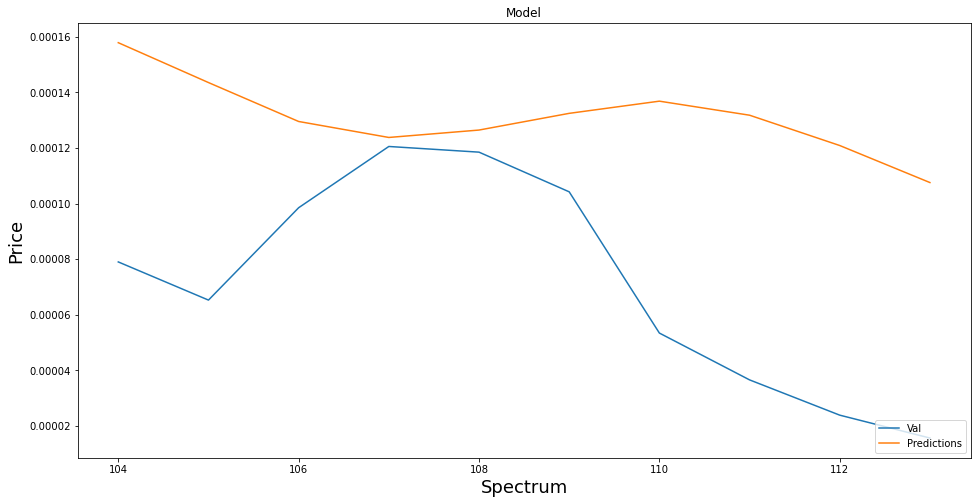

INFO:tensorflow:Assets written to: models/model_crypto_sanbtc/assets


INFO:tensorflow:Assets written to: models/model_crypto_sanbtc/assets


Error on sanbtc!
Error on wbtusd!
Error on eutust!
Error on uopusd!
Error on xagf0ustf0!
Error on nearust!
Error on sushiusd!
Error on bandust!
Error on lrcbtc!
Error on zilusd!
Error on lunaust!
Epoch 1/10
164/164 [==============================] - 8s 31ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0339 - mape: 56.1531
Epoch 2/10
164/164 [==============================] - 4s 24ms/step - loss: 8.8293e-04 - mse: 8.8293e-04 - mae: 0.0205 - mape: 24.5263
Epoch 3/10
164/164 [==============================] - 4s 26ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0249 - mape: 29.9923
Epoch 4/10
164/164 [==============================] - 4s 24ms/step - loss: 8.3528e-04 - mse: 8.3528e-04 - mae: 0.0222 - mape: 38.8979
Epoch 5/10
164/164 [==============================] - 4s 25ms/step - loss: 5.3985e-04 - mse: 5.3985e-04 - mae: 0.0166 - mape: 25.7583
Epoch 6/10
164/164 [==============================] - 4s 24ms/step - loss: 4.8428e-04 - mse: 4.8428e-04 - mae: 0.0154 - mape: 28.2728
Epoch 7/10
164/1

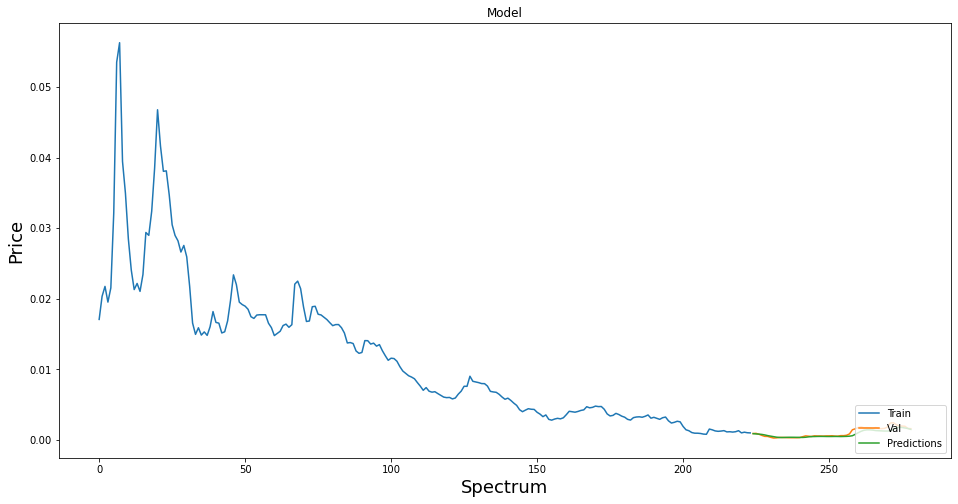

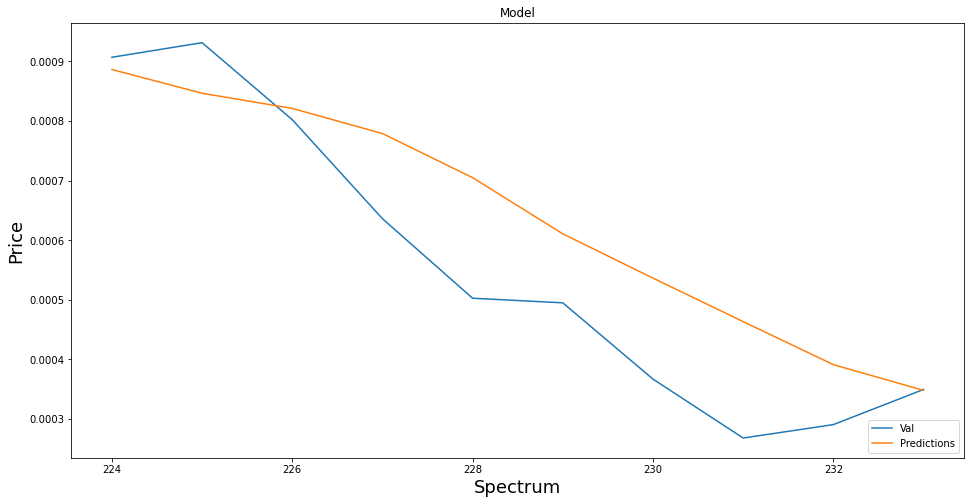

INFO:tensorflow:Assets written to: models/model_crypto_btgbtc/assets


INFO:tensorflow:Assets written to: models/model_crypto_btgbtc/assets


Error on btgbtc!
Error on mobusd!
Error on odeusd!
Error on dogef0ustf0!
Epoch 1/10
962/962 [==============================] - 32s 28ms/step - loss: 5.0312e-04 - mse: 5.0312e-04 - mae: 0.0161 - mape: 20.1780
Epoch 2/10
962/962 [==============================] - 28s 29ms/step - loss: 1.5742e-04 - mse: 1.5742e-04 - mae: 0.0098 - mape: 11.1276
Epoch 3/10
962/962 [==============================] - 27s 28ms/step - loss: 8.8977e-05 - mse: 8.8977e-05 - mae: 0.0074 - mape: 8.1782
Epoch 4/10
962/962 [==============================] - 27s 28ms/step - loss: 7.8567e-05 - mse: 7.8567e-05 - mae: 0.0067 - mape: 7.8181
Epoch 5/10
962/962 [==============================] - 28s 29ms/step - loss: 1.0862e-04 - mse: 1.0862e-04 - mae: 0.0077 - mape: 8.9235
Epoch 6/10
962/962 [==============================] - 27s 28ms/step - loss: 4.5992e-05 - mse: 4.5992e-05 - mae: 0.0053 - mape: 5.9525
Epoch 7/10
962/962 [==============================] - 28s 29ms/step - loss: 5.4043e-05 - mse: 5.4043e-05 - mae: 0.0056 - 

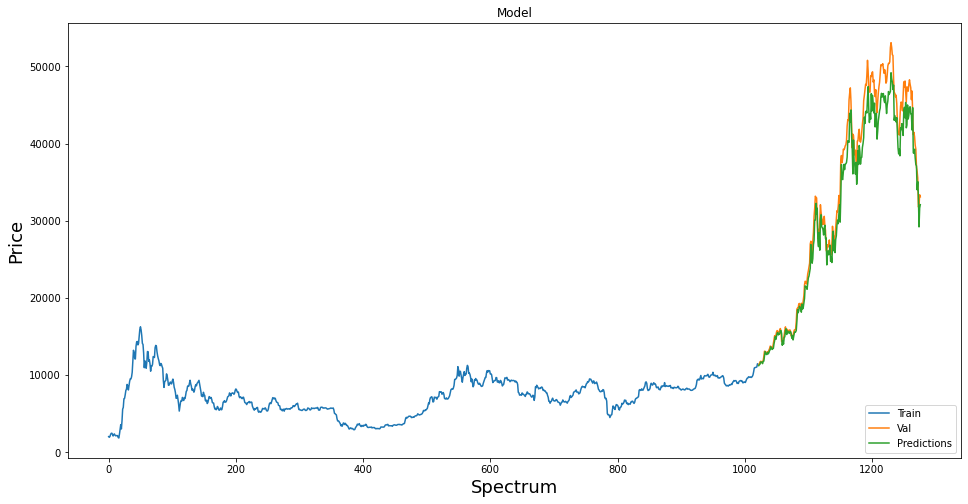

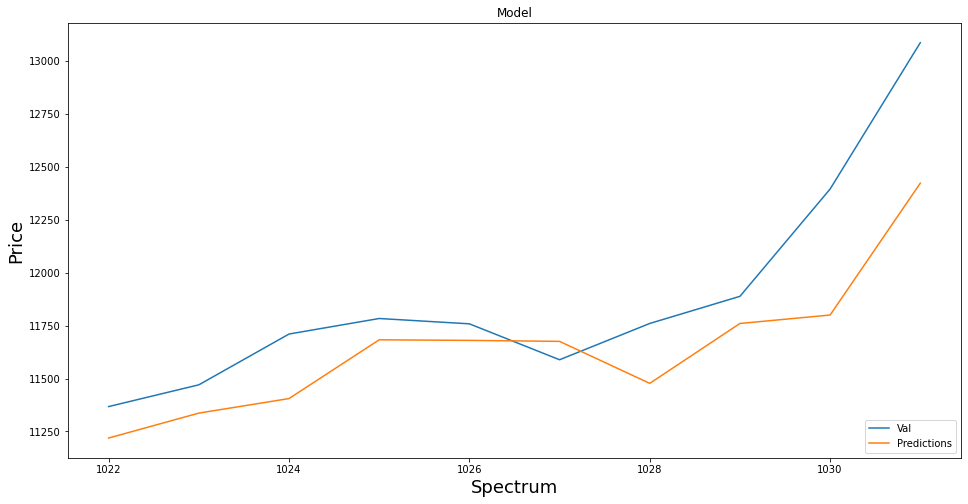

INFO:tensorflow:Assets written to: models/model_crypto_btceur/assets


INFO:tensorflow:Assets written to: models/model_crypto_btceur/assets


Error on btceur!
Error on xmrust!
Error on tsdust!
Epoch 1/10
115/115 [==============================] - 8s 32ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0510 - mape: 625621.6676
Epoch 2/10
115/115 [==============================] - 3s 28ms/step - loss: 0.0012 - mse: 0.0012 - mae: 0.0263 - mape: 682591.3088
Epoch 3/10
115/115 [==============================] - 3s 28ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0259 - mape: 124922.7847
Epoch 4/10
115/115 [==============================] - 3s 28ms/step - loss: 8.4653e-04 - mse: 8.4653e-04 - mae: 0.0218 - mape: 104048.3766
Epoch 5/10
115/115 [==============================] - 3s 28ms/step - loss: 0.0017 - mse: 0.0017 - mae: 0.0285 - mape: 254659.7279
Epoch 6/10
115/115 [==============================] - 3s 28ms/step - loss: 7.9493e-04 - mse: 7.9493e-04 - mae: 0.0216 - mape: 836717.8394
Epoch 7/10
115/115 [==============================] - 3s 28ms/step - loss: 5.8253e-04 - mse: 5.8253e-04 - mae: 0.0179 - mape: 121109.4545
Epoch 8/10
115/

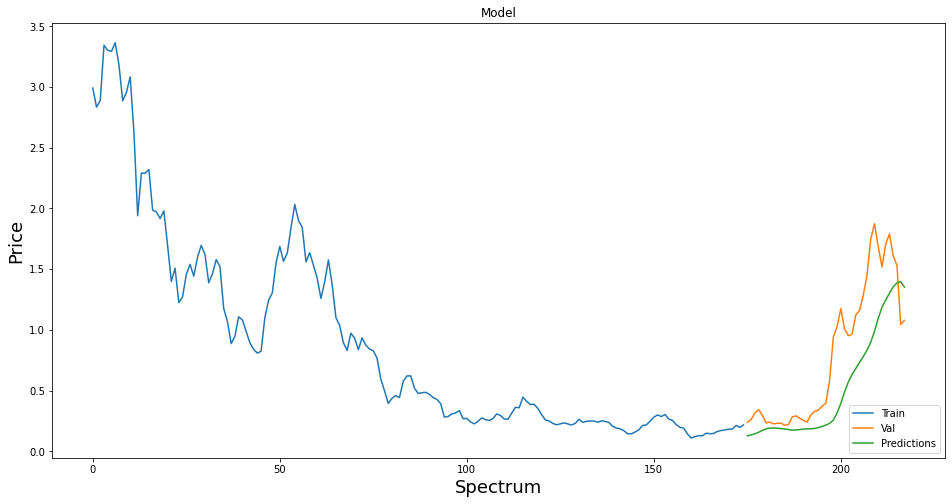

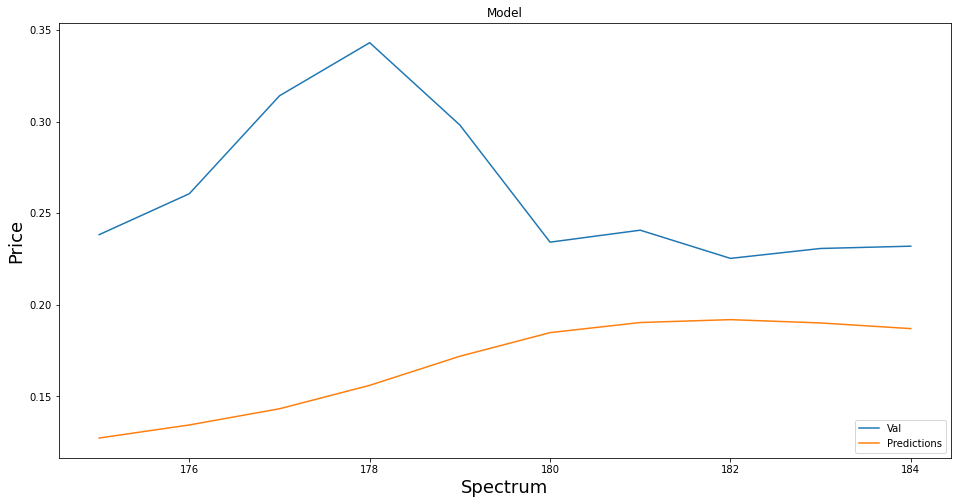

INFO:tensorflow:Assets written to: models/model_crypto_ioteur/assets


INFO:tensorflow:Assets written to: models/model_crypto_ioteur/assets


Error on ioteur!
Epoch 1/10
76/76 [==============================] - 5s 28ms/step - loss: 0.0157 - mse: 0.0157 - mae: 0.0943 - mape: 28.3652
Epoch 2/10
76/76 [==============================] - 2s 28ms/step - loss: 0.0067 - mse: 0.0067 - mae: 0.0614 - mape: 17.8357
Epoch 3/10
76/76 [==============================] - 2s 28ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0577 - mape: 16.3706
Epoch 4/10
76/76 [==============================] - 2s 28ms/step - loss: 0.0058 - mse: 0.0058 - mae: 0.0628 - mape: 16.9894
Epoch 5/10
76/76 [==============================] - 3s 34ms/step - loss: 0.0033 - mse: 0.0033 - mae: 0.0481 - mape: 15.6791
Epoch 6/10
76/76 [==============================] - 2s 29ms/step - loss: 0.0034 - mse: 0.0034 - mae: 0.0509 - mape: 14.6617
Epoch 7/10
76/76 [==============================] - 2s 28ms/step - loss: 0.0022 - mse: 0.0022 - mae: 0.0402 - mape: 12.6875
Epoch 8/10
76/76 [==============================] - 2s 28ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0548 - mape:

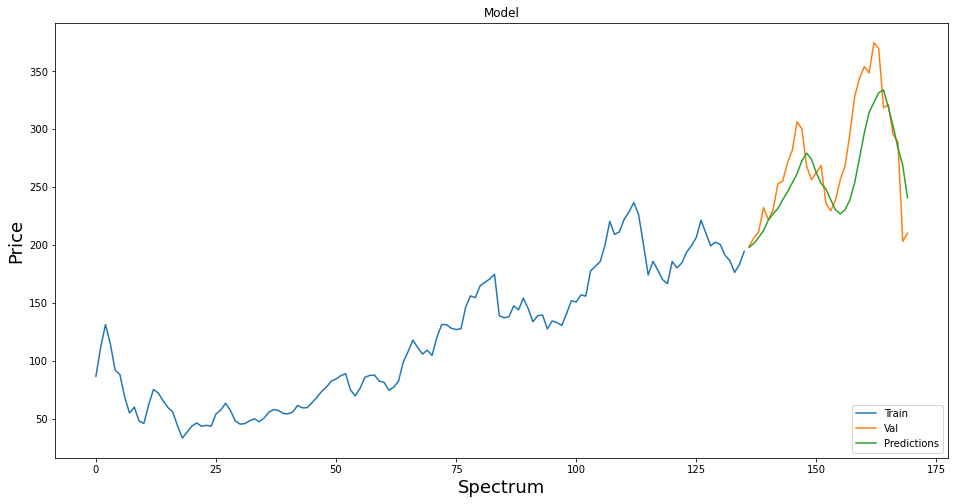

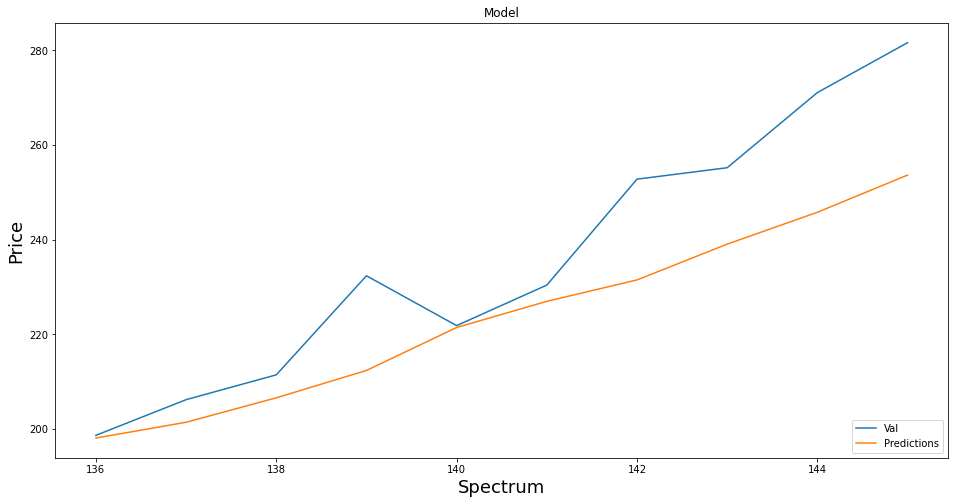

INFO:tensorflow:Assets written to: models/model_crypto_ltcust/assets


INFO:tensorflow:Assets written to: models/model_crypto_ltcust/assets


Error on ltcust!
Error on xsnusd!
Epoch 1/10
59/59 [==============================] - 6s 28ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0453 - mape: 1107105.8462
Epoch 2/10
59/59 [==============================] - 2s 28ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0410 - mape: 2130190.8188
Epoch 3/10
59/59 [==============================] - 2s 28ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0265 - mape: 1450372.5759
Epoch 4/10
59/59 [==============================] - 2s 27ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0289 - mape: 242331.1666
Epoch 5/10
59/59 [==============================] - 2s 27ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0325 - mape: 167915.2665
Epoch 6/10
59/59 [==============================] - 2s 28ms/step - loss: 9.2999e-04 - mse: 9.2999e-04 - mae: 0.0228 - mape: 582947.6056
Epoch 7/10
59/59 [==============================] - 2s 28ms/step - loss: 8.9440e-04 - mse: 8.9440e-04 - mae: 0.0255 - mape: 138472.2533
Epoch 8/10
59/59 [==============================] -

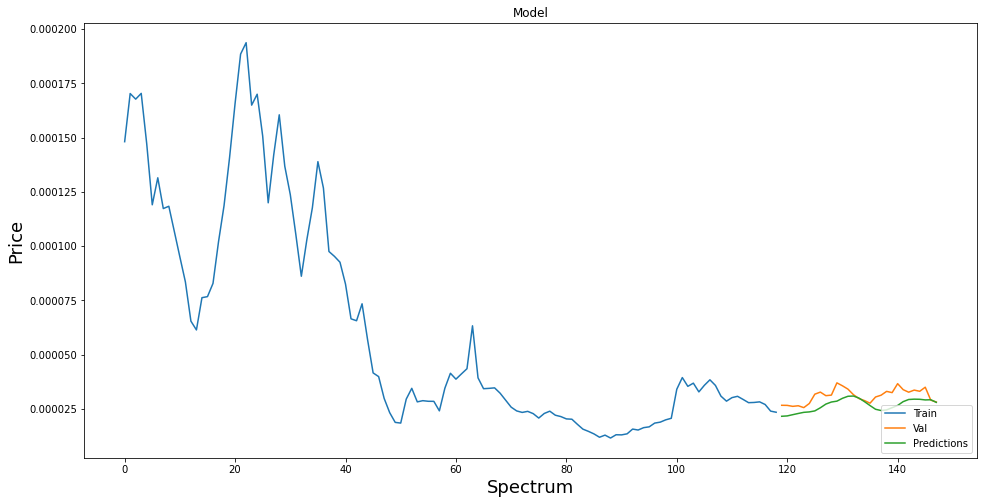

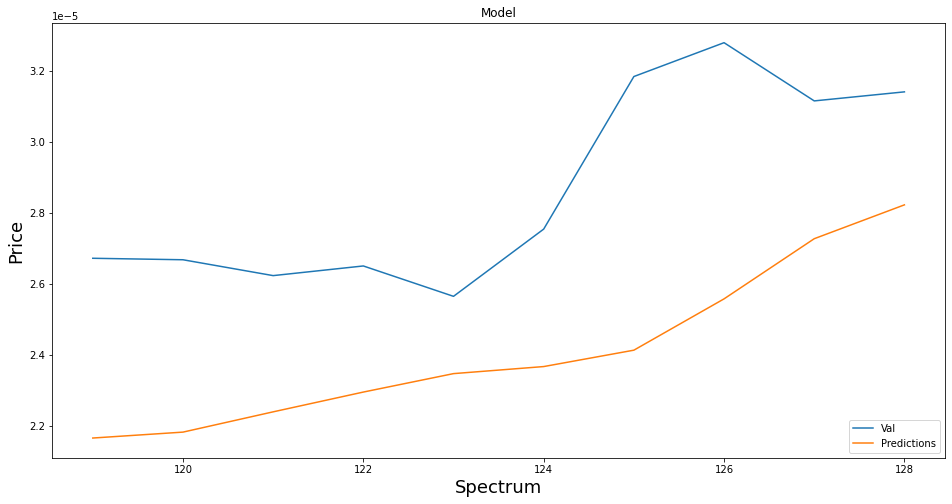

INFO:tensorflow:Assets written to: models/model_crypto_zrxbtc/assets


INFO:tensorflow:Assets written to: models/model_crypto_zrxbtc/assets


Error on zrxbtc!
Epoch 1/10
51/51 [==============================] - 4s 27ms/step - loss: 0.0272 - mse: 0.0272 - mae: 0.1146 - mape: 55.2120
Epoch 2/10
51/51 [==============================] - 1s 27ms/step - loss: 0.0069 - mse: 0.0069 - mae: 0.0634 - mape: 36.4940
Epoch 3/10
51/51 [==============================] - 1s 27ms/step - loss: 0.0086 - mse: 0.0086 - mae: 0.0642 - mape: 59.1550
Epoch 4/10
51/51 [==============================] - 1s 26ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0635 - mape: 35.1416
Epoch 5/10
51/51 [==============================] - 1s 28ms/step - loss: 0.0092 - mse: 0.0092 - mae: 0.0618 - mape: 41.1646
Epoch 6/10
51/51 [==============================] - 1s 25ms/step - loss: 0.0171 - mse: 0.0171 - mae: 0.0812 - mape: 50.0632
Epoch 7/10
51/51 [==============================] - 1s 28ms/step - loss: 0.0082 - mse: 0.0082 - mae: 0.0522 - mape: 35.8731
Epoch 8/10
51/51 [==============================] - 1s 28ms/step - loss: 0.0054 - mse: 0.0054 - mae: 0.0525 - mape:

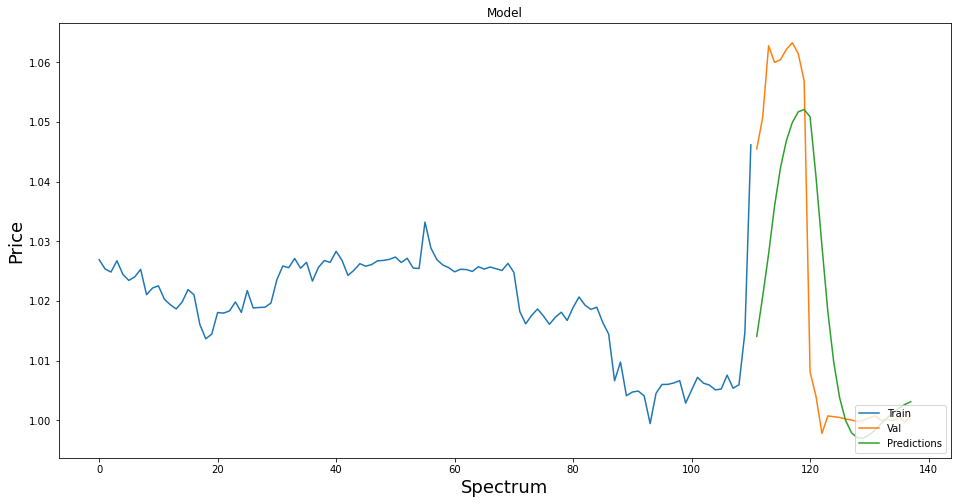

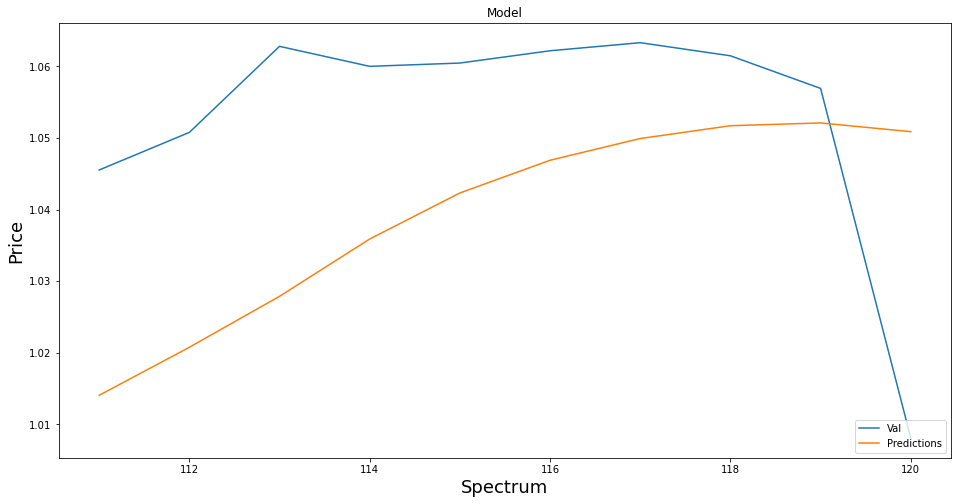

INFO:tensorflow:Assets written to: models/model_crypto_paxusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_paxusd/assets


Error on paxusd!
Error on cnhcnht!
Error on testbtctestusdt!
Error on rrbust!
Error on eth2xusd!
Error on albtust!
Error on sntusd!
Error on xvgusd!
Error on snxusd!
Error on nutusd!
Epoch 1/10
118/118 [==============================] - 6s 26ms/step - loss: 0.0287 - mse: 0.0287 - mae: 0.1241 - mape: 41.1614
Epoch 2/10
118/118 [==============================] - 3s 27ms/step - loss: 0.0080 - mse: 0.0080 - mae: 0.0727 - mape: 26.4434
Epoch 3/10
118/118 [==============================] - 3s 28ms/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0639 - mape: 22.8968
Epoch 4/10
118/118 [==============================] - 3s 27ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0580 - mape: 21.3562
Epoch 5/10
118/118 [==============================] - 4s 32ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0645 - mape: 22.1821
Epoch 6/10
118/118 [==============================] - 3s 27ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0519 - mape: 17.9942
Epoch 7/10
118/118 [==============================] - 3s 29ms

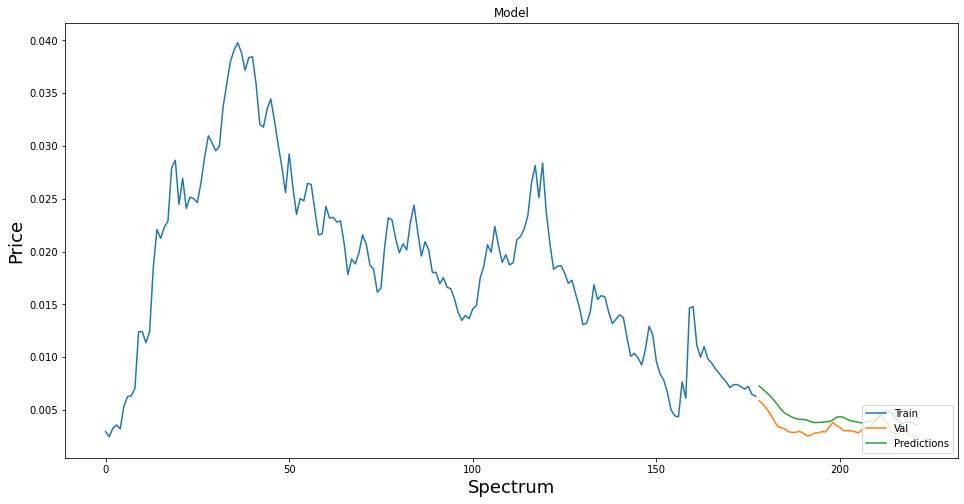

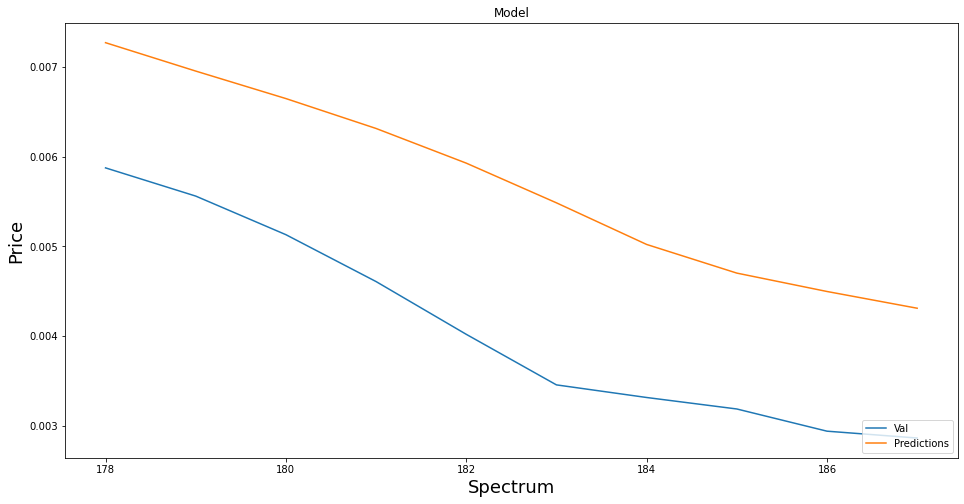

INFO:tensorflow:Assets written to: models/model_crypto_omgeth/assets


INFO:tensorflow:Assets written to: models/model_crypto_omgeth/assets


Error on omgeth!
Epoch 1/10
647/647 [==============================] - 19s 26ms/step - loss: 0.0131 - mse: 0.0131 - mae: 0.0691 - mape: 26.0748
Epoch 2/10
647/647 [==============================] - 17s 26ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0359 - mape: 14.2900
Epoch 3/10
647/647 [==============================] - 17s 26ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0313 - mape: 13.5691
Epoch 4/10
647/647 [==============================] - 17s 26ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0300 - mape: 13.1542 2s - loss: 
Epoch 5/10
647/647 [==============================] - 17s 26ms/step - loss: 0.0014 - mse: 0.0014 - mae: 0.0271 - mape: 12.2926 2s - loss: 0.0014 - mse: 0.
Epoch 6/10
647/647 [==============================] - 18s 27ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0237 - mape: 10.1671
Epoch 7/10
647/647 [==============================] - 17s 27ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0241 - mape: 10.5829
Epoch 8/10
647/647 [==============================] - 

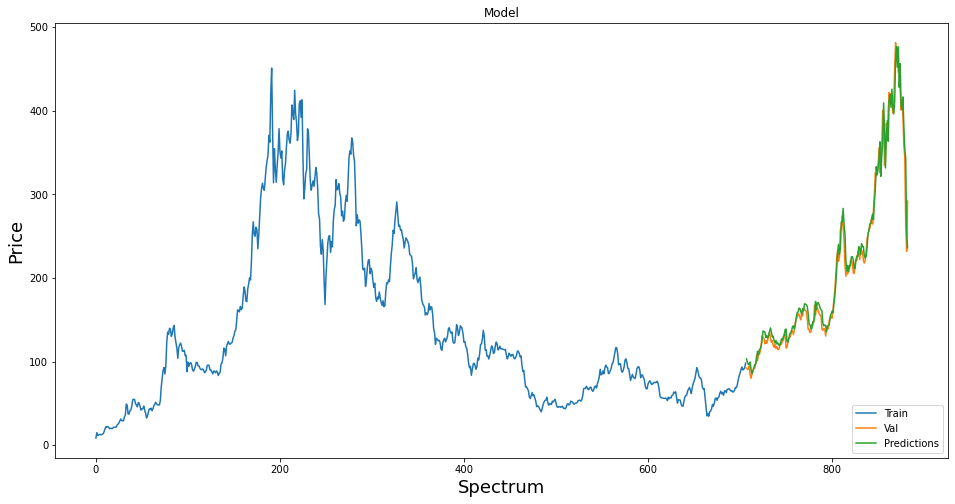

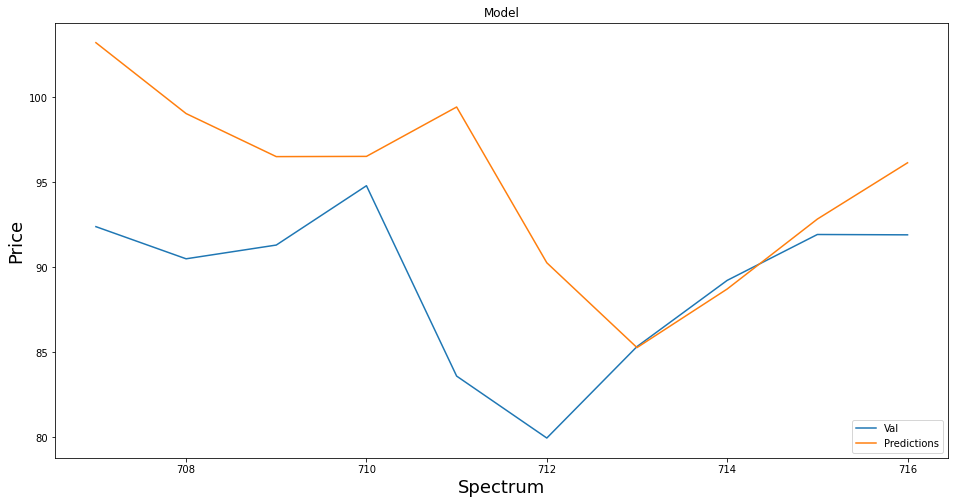

INFO:tensorflow:Assets written to: models/model_crypto_xmrusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_xmrusd/assets


Error on xmrusd!
Error on lunausd!
Error on mobust!
Error on iosusd!
Error on dotf0ustf0!
Error on bandusd!
Epoch 1/10
98/98 [==============================] - 7s 32ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0374 - mape: 56.4206
Epoch 2/10
98/98 [==============================] - 3s 32ms/step - loss: 5.5405e-04 - mse: 5.5405e-04 - mae: 0.0196 - mape: 31.8811
Epoch 3/10
98/98 [==============================] - 3s 35ms/step - loss: 5.0652e-04 - mse: 5.0652e-04 - mae: 0.0178 - mape: 25.7235
Epoch 4/10
98/98 [==============================] - 3s 28ms/step - loss: 3.6359e-04 - mse: 3.6359e-04 - mae: 0.0147 - mape: 28.1845
Epoch 5/10
98/98 [==============================] - 3s 29ms/step - loss: 5.7769e-04 - mse: 5.7769e-04 - mae: 0.0192 - mape: 29.6054
Epoch 6/10
98/98 [==============================] - 3s 27ms/step - loss: 6.5380e-04 - mse: 6.5380e-04 - mae: 0.0199 - mape: 29.4655
Epoch 7/10
98/98 [==============================] - 3s 26ms/step - loss: 6.1712e-04 - mse: 6.1712e-04 - mae:

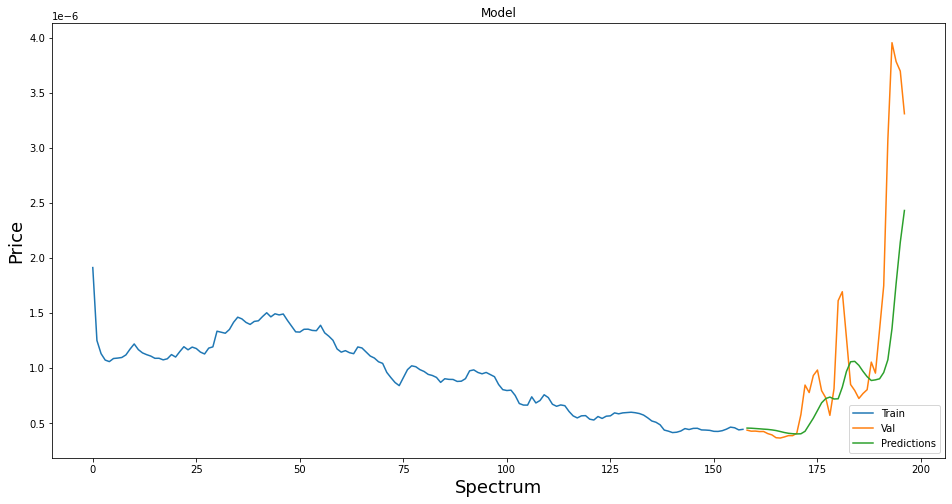

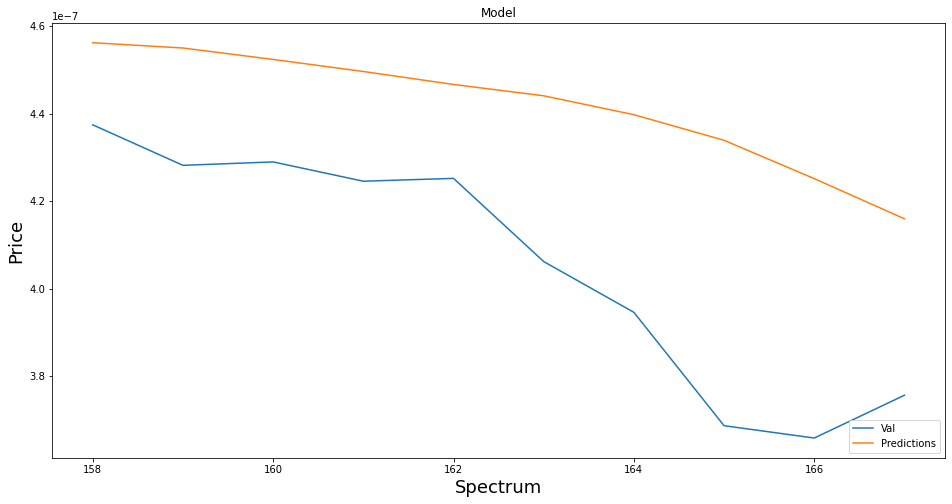

INFO:tensorflow:Assets written to: models/model_crypto_vetbtc/assets


INFO:tensorflow:Assets written to: models/model_crypto_vetbtc/assets


Error on vetbtc!
Error on gotusd!
Error on repusd!
Error on sushiust!
Error on nearusd!
Error on poausd!
Error on btcxch!
Error on dotbtc!
Error on eutusd!
Error on eth2xeth!
Error on uopust!
Epoch 1/10
23/23 [==============================] - 3s 24ms/step - loss: 0.0954 - mse: 0.0954 - mae: 0.2476 - mape: 63.2517
Epoch 2/10
23/23 [==============================] - 1s 25ms/step - loss: 0.0283 - mse: 0.0283 - mae: 0.1352 - mape: 46.6263
Epoch 3/10
23/23 [==============================] - 1s 24ms/step - loss: 0.0303 - mse: 0.0303 - mae: 0.1480 - mape: 39.0942
Epoch 4/10
23/23 [==============================] - 1s 24ms/step - loss: 0.0339 - mse: 0.0339 - mae: 0.1529 - mape: 45.5972
Epoch 5/10
23/23 [==============================] - 1s 25ms/step - loss: 0.0274 - mse: 0.0274 - mae: 0.1192 - mape: 58.9732
Epoch 6/10
23/23 [==============================] - 1s 29ms/step - loss: 0.0239 - mse: 0.0239 - mae: 0.1288 - mape: 29.9262
Epoch 7/10
23/23 [==============================] - 1s 24ms/step

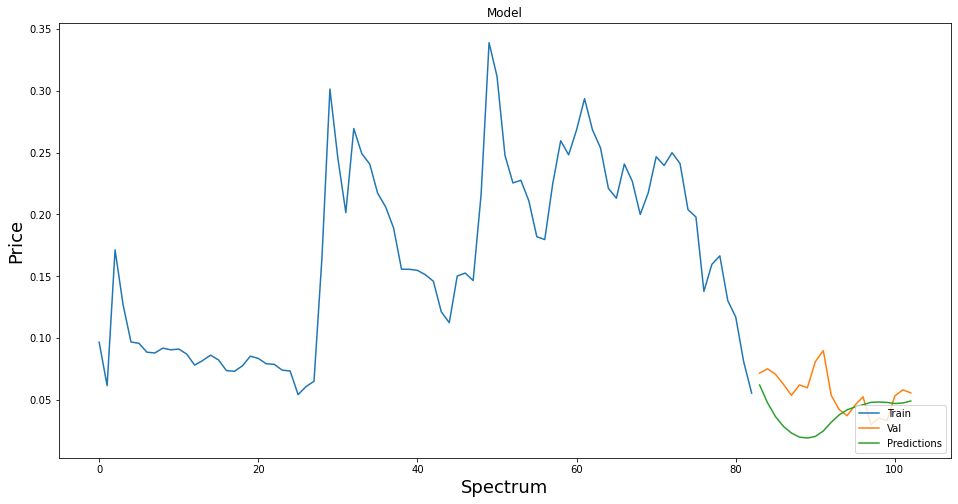

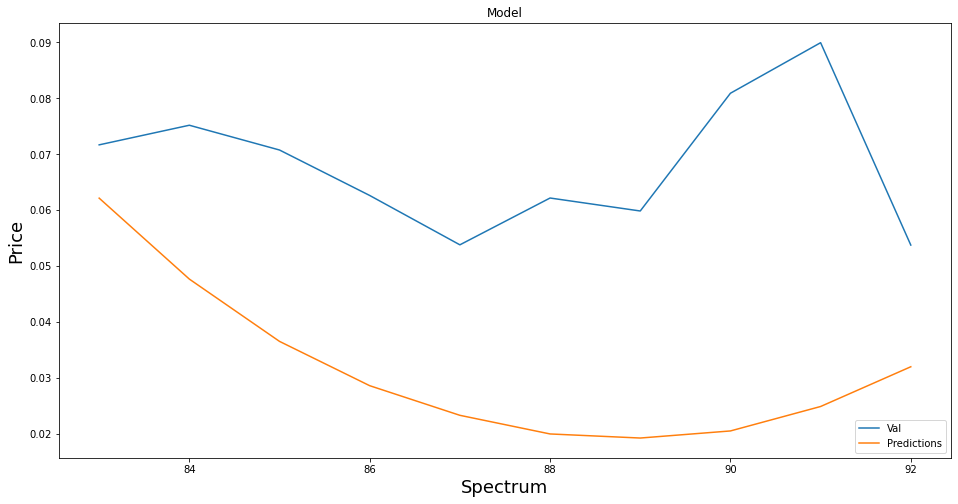

INFO:tensorflow:Assets written to: models/model_crypto_rrtusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_rrtusd/assets


Error on rrtusd!
Error on solust!
Error on utkusd!
Error on idxbtc!
Error on mnabtc!
Error on xautf0ustf0!
Epoch 1/10
689/689 [==============================] - 23s 25ms/step - loss: 0.0130 - mse: 0.0130 - mae: 0.0704 - mape: 61.3187
Epoch 2/10
689/689 [==============================] - 17s 25ms/step - loss: 0.0030 - mse: 0.0030 - mae: 0.0364 - mape: 23.7444
Epoch 3/10
689/689 [==============================] - 17s 25ms/step - loss: 0.0028 - mse: 0.0028 - mae: 0.0376 - mape: 33.0900
Epoch 4/10
689/689 [==============================] - 21s 30ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0280 - mape: 33.2107
Epoch 5/10
689/689 [==============================] - 19s 28ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0295 - mape: 32.6037
Epoch 6/10
689/689 [==============================] - 18s 26ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0258 - mape: 28.6796 3s - 
Epoch 7/10
689/689 [==============================] - 17s 25ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0237 - mape: 25.451

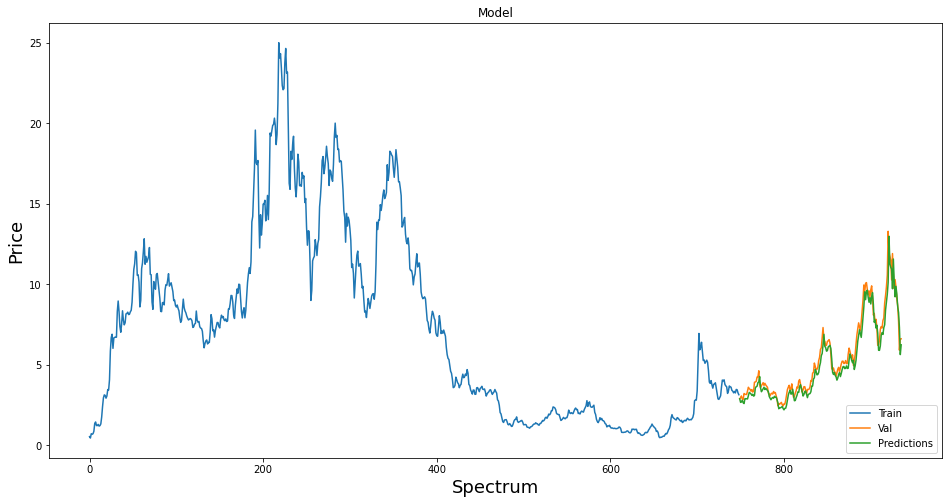

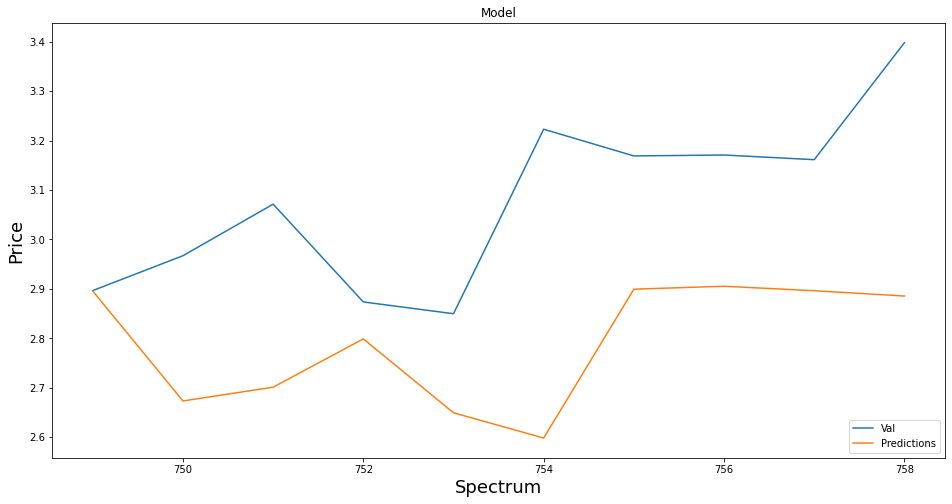

INFO:tensorflow:Assets written to: models/model_crypto_omgusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_omgusd/assets


Error on omgusd!
Error on stjusd!
Error on forthusd!
Epoch 1/10
313/313 [==============================] - 11s 25ms/step - loss: 0.0157 - mse: 0.0157 - mae: 0.0907 - mape: 30.9505
Epoch 2/10
313/313 [==============================] - 8s 25ms/step - loss: 0.0064 - mse: 0.0064 - mae: 0.0620 - mape: 22.2952
Epoch 3/10
313/313 [==============================] - 8s 24ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0509 - mape: 19.1473
Epoch 4/10
313/313 [==============================] - 8s 24ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0497 - mape: 17.4773
Epoch 5/10
313/313 [==============================] - 8s 24ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0415 - mape: 16.0934
Epoch 6/10
313/313 [==============================] - 8s 26ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0347 - mape: 12.5247
Epoch 7/10
313/313 [==============================] - 8s 26ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0332 - mape: 11.9931
Epoch 8/10
313/313 [==============================] - 8s 26ms/st

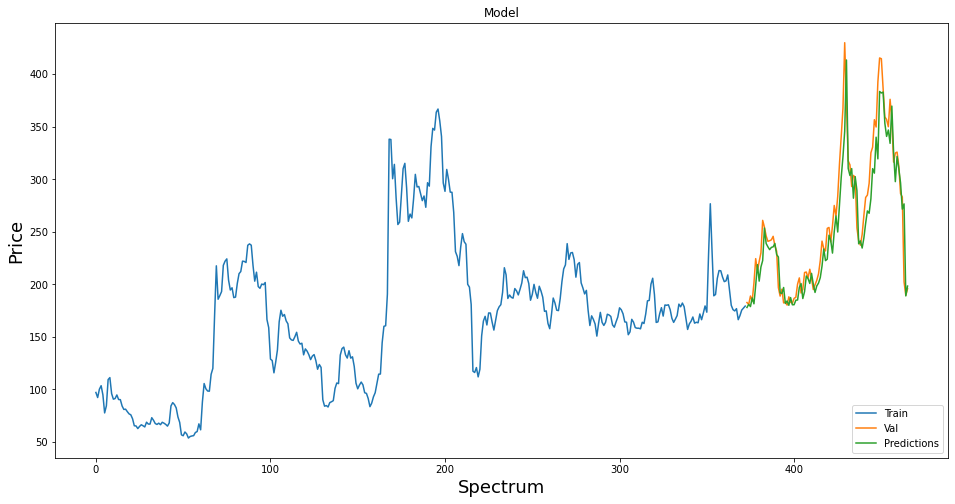

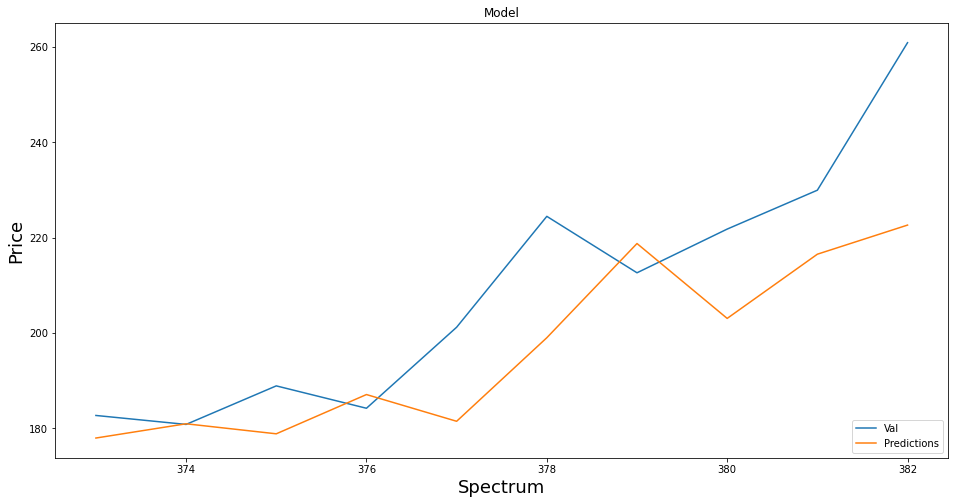

INFO:tensorflow:Assets written to: models/model_crypto_bsvusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_bsvusd/assets


Error on bsvusd!
Epoch 1/10
560/560 [==============================] - 17s 25ms/step - loss: 6.6515e-04 - mse: 6.6515e-04 - mae: 0.0181 - mape: 7911.9431
Epoch 2/10
560/560 [==============================] - 14s 24ms/step - loss: 1.3370e-04 - mse: 1.3370e-04 - mae: 0.0093 - mape: 1238.7712
Epoch 3/10
560/560 [==============================] - 14s 25ms/step - loss: 1.4690e-04 - mse: 1.4690e-04 - mae: 0.0096 - mape: 22908.9074
Epoch 4/10
560/560 [==============================] - 14s 25ms/step - loss: 1.7647e-04 - mse: 1.7647e-04 - mae: 0.0103 - mape: 25314.3704
Epoch 5/10
560/560 [==============================] - 14s 25ms/step - loss: 8.6176e-05 - mse: 8.6176e-05 - mae: 0.0073 - mape: 21349.8450
Epoch 6/10
560/560 [==============================] - 14s 25ms/step - loss: 8.6658e-05 - mse: 8.6658e-05 - mae: 0.0072 - mape: 1021.4209
Epoch 7/10
560/560 [==============================] - 15s 27ms/step - loss: 5.2751e-05 - mse: 5.2751e-05 - mae: 0.0056 - mape: 7376.5842
Epoch 8/10
560/560 [=

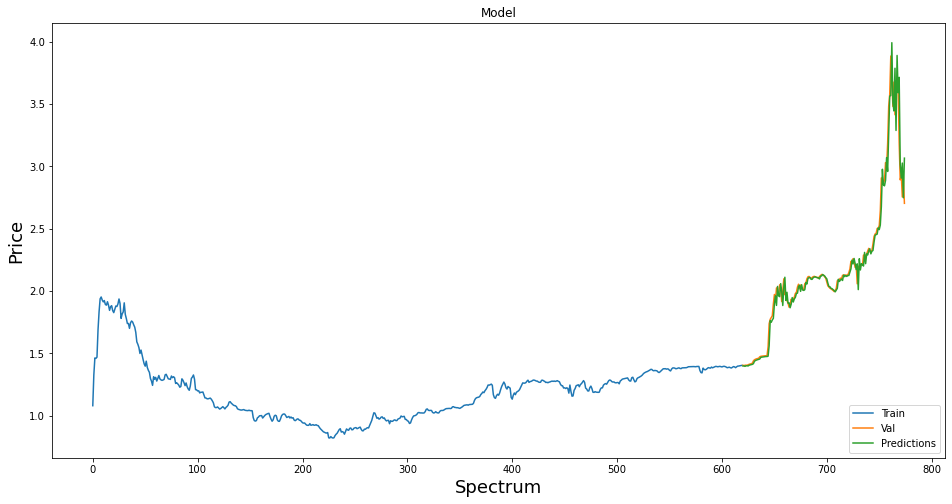

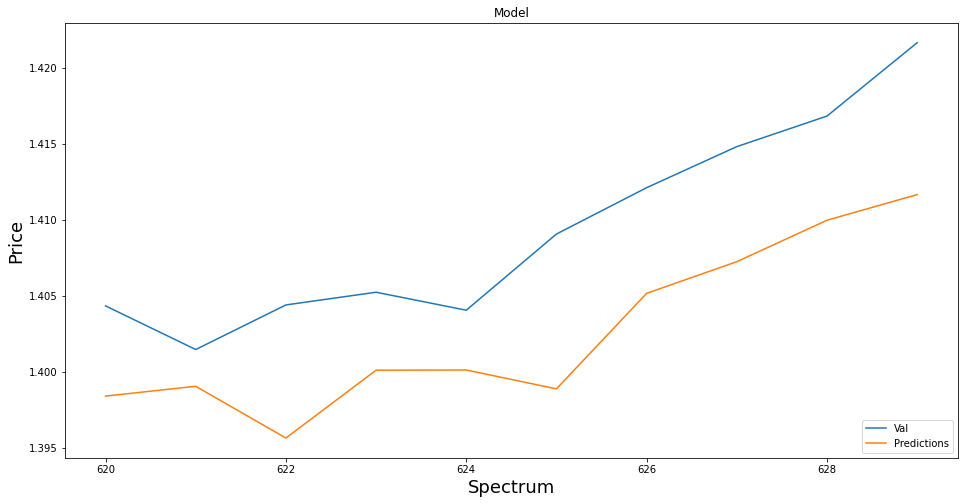

INFO:tensorflow:Assets written to: models/model_crypto_leousd/assets


INFO:tensorflow:Assets written to: models/model_crypto_leousd/assets


Error on leousd!
Error on ksmusd!
Error on compust!
Error on chexusd!
Error on adaf0ustf0!
Error on rbtusd!
Epoch 1/10
8/8 [==============================] - 3s 24ms/step - loss: 0.0763 - mse: 0.0763 - mae: 0.2542 - mape: 72.8104
Epoch 2/10
8/8 [==============================] - 0s 24ms/step - loss: 0.0116 - mse: 0.0116 - mae: 0.0992 - mape: 28.8117
Epoch 3/10
8/8 [==============================] - 0s 25ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0524 - mape: 15.0192
Epoch 4/10
8/8 [==============================] - 0s 23ms/step - loss: 8.4479e-04 - mse: 8.4479e-04 - mae: 0.0198 - mape: 5.9063
Epoch 5/10
8/8 [==============================] - 0s 24ms/step - loss: 0.0037 - mse: 0.0037 - mae: 0.0517 - mape: 15.8405
Epoch 6/10
8/8 [==============================] - 0s 24ms/step - loss: 0.0015 - mse: 0.0015 - mae: 0.0310 - mape: 8.4382
Epoch 7/10
8/8 [==============================] - 0s 24ms/step - loss: 9.6934e-04 - mse: 9.6934e-04 - mae: 0.0240 - mape: 6.8294
Epoch 8/10
8/8 [=========

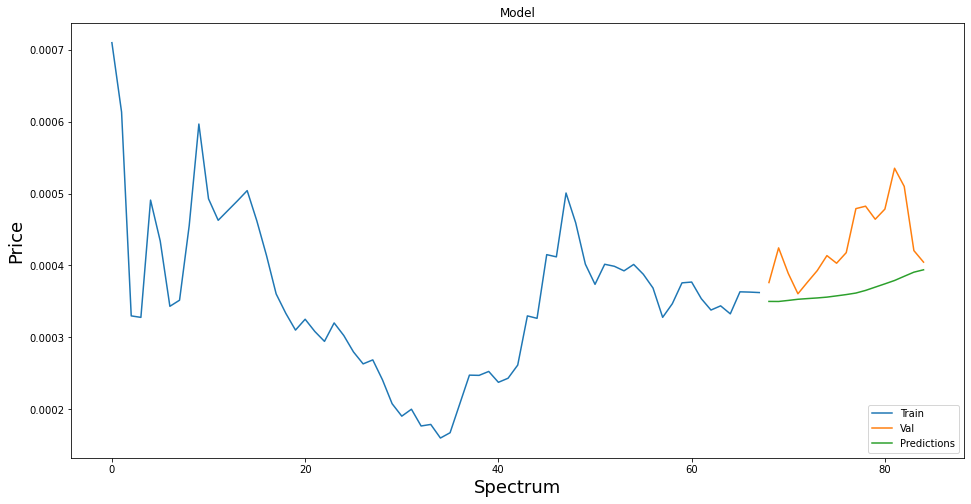

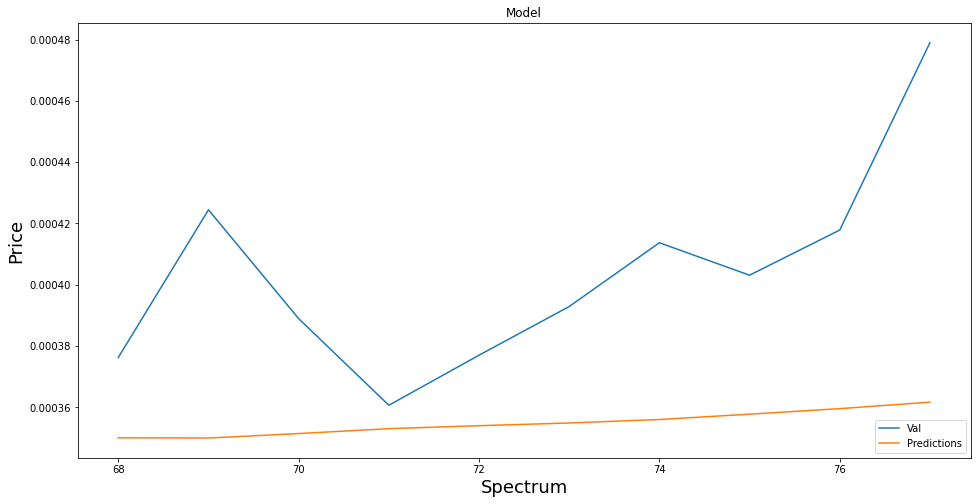

INFO:tensorflow:Assets written to: models/model_crypto_atobtc/assets


INFO:tensorflow:Assets written to: models/model_crypto_atobtc/assets


Error on atobtc!
Error on linkust!
Epoch 1/10
76/76 [==============================] - 4s 24ms/step - loss: 0.0436 - mse: 0.0436 - mae: 0.1597 - mape: 48.2753
Epoch 2/10
76/76 [==============================] - 2s 24ms/step - loss: 0.0134 - mse: 0.0134 - mae: 0.0883 - mape: 32.4061
Epoch 3/10
76/76 [==============================] - 2s 24ms/step - loss: 0.0093 - mse: 0.0093 - mae: 0.0745 - mape: 20.6568
Epoch 4/10
76/76 [==============================] - 2s 24ms/step - loss: 0.0113 - mse: 0.0113 - mae: 0.0816 - mape: 22.7280
Epoch 5/10
76/76 [==============================] - 2s 25ms/step - loss: 0.0164 - mse: 0.0164 - mae: 0.0877 - mape: 22.1293
Epoch 6/10
76/76 [==============================] - 2s 27ms/step - loss: 0.0061 - mse: 0.0061 - mae: 0.0536 - mape: 19.0455
Epoch 7/10
76/76 [==============================] - 2s 26ms/step - loss: 0.0050 - mse: 0.0050 - mae: 0.0548 - mape: 16.1170
Epoch 8/10
76/76 [==============================] - 2s 25ms/step - loss: 0.0033 - mse: 0.0033 - m

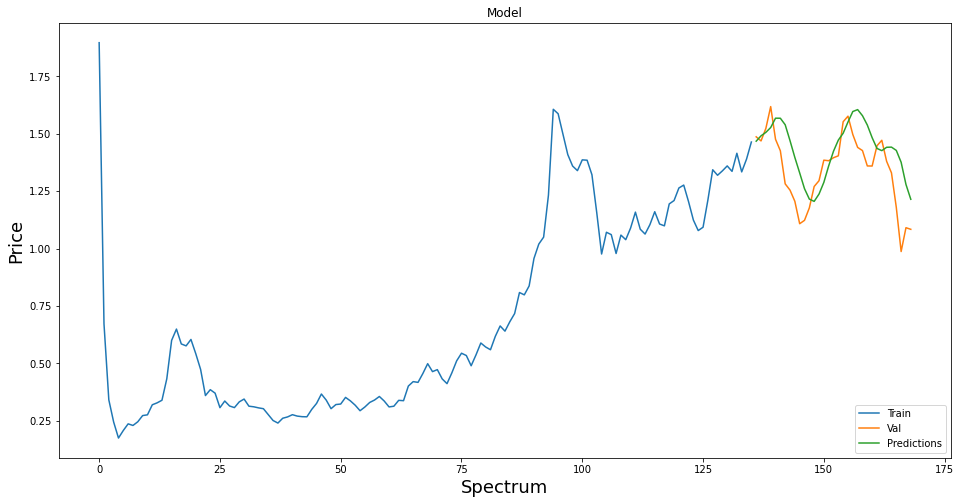

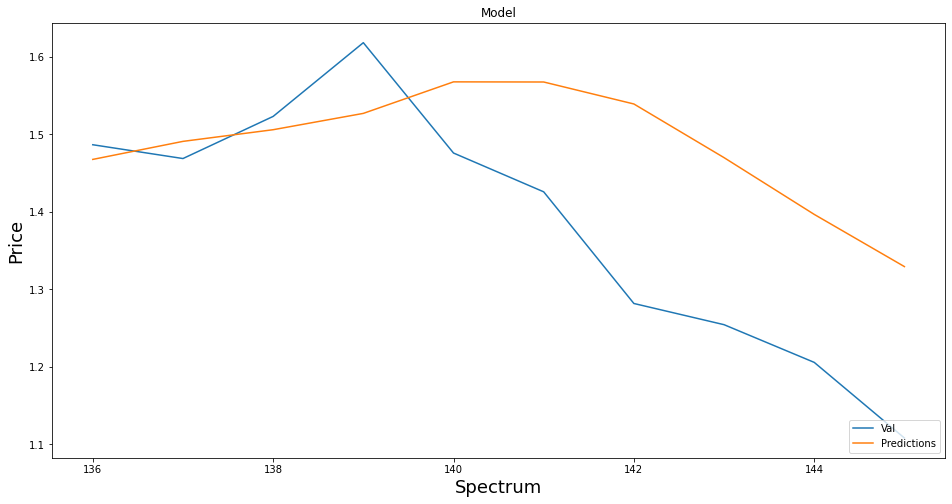

INFO:tensorflow:Assets written to: models/model_crypto_algusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_algusd/assets


Error on algusd!
Error on ringxusd!
Epoch 1/10
332/332 [==============================] - 11s 26ms/step - loss: 0.0137 - mse: 0.0137 - mae: 0.0816 - mape: 44.4868
Epoch 2/10
332/332 [==============================] - 9s 26ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0489 - mape: 22.0219
Epoch 3/10
332/332 [==============================] - 9s 27ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0357 - mape: 16.8833
Epoch 4/10
332/332 [==============================] - 8s 25ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0339 - mape: 16.2378
Epoch 5/10
332/332 [==============================] - 8s 25ms/step - loss: 0.0029 - mse: 0.0029 - mae: 0.0352 - mape: 16.6413
Epoch 6/10
332/332 [==============================] - 8s 25ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0301 - mape: 13.2257
Epoch 7/10
332/332 [==============================] - 8s 25ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0289 - mape: 12.1152
Epoch 8/10
332/332 [==============================] - 8s 25ms/step - loss: 0.0021

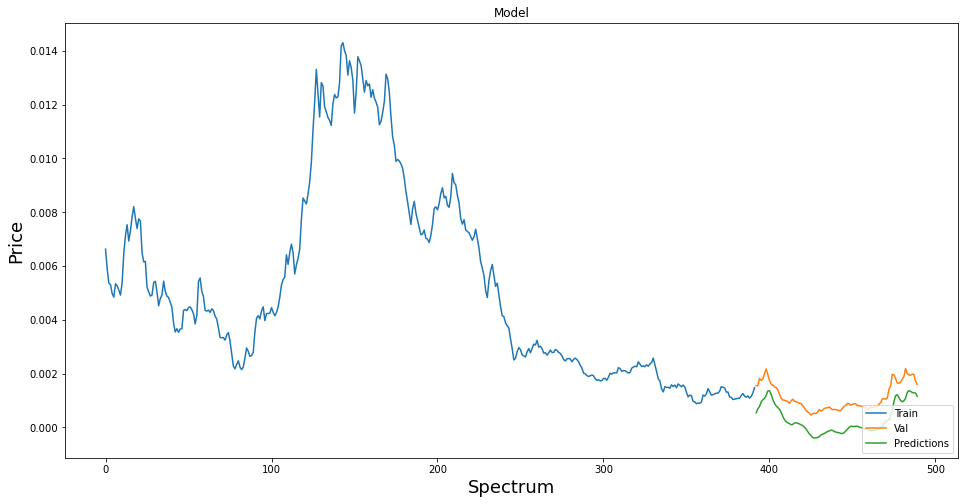

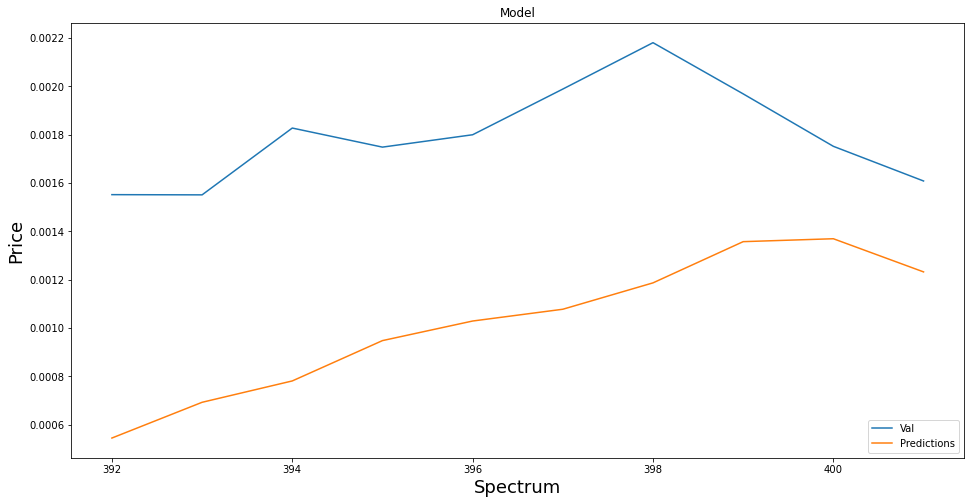

INFO:tensorflow:Assets written to: models/model_crypto_neobtc/assets


INFO:tensorflow:Assets written to: models/model_crypto_neobtc/assets


Error on neobtc!
Error on unif0ustf0!
Epoch 1/10
31/31 [==============================] - 4s 25ms/step - loss: 0.0486 - mse: 0.0486 - mae: 0.1748 - mape: 45.0268
Epoch 2/10
31/31 [==============================] - 1s 25ms/step - loss: 0.0090 - mse: 0.0090 - mae: 0.0767 - mape: 20.5788
Epoch 3/10
31/31 [==============================] - 1s 24ms/step - loss: 0.0073 - mse: 0.0073 - mae: 0.0738 - mape: 19.0243
Epoch 4/10
31/31 [==============================] - 1s 25ms/step - loss: 0.0076 - mse: 0.0076 - mae: 0.0645 - mape: 15.7234
Epoch 5/10
31/31 [==============================] - 1s 26ms/step - loss: 0.0063 - mse: 0.0063 - mae: 0.0697 - mape: 18.3379
Epoch 6/10
31/31 [==============================] - 1s 25ms/step - loss: 0.0060 - mse: 0.0060 - mae: 0.0671 - mape: 17.3627
Epoch 7/10
31/31 [==============================] - 1s 25ms/step - loss: 0.0046 - mse: 0.0046 - mae: 0.0549 - mape: 14.3990
Epoch 8/10
31/31 [==============================] - 1s 25ms/step - loss: 0.0051 - mse: 0.0051 

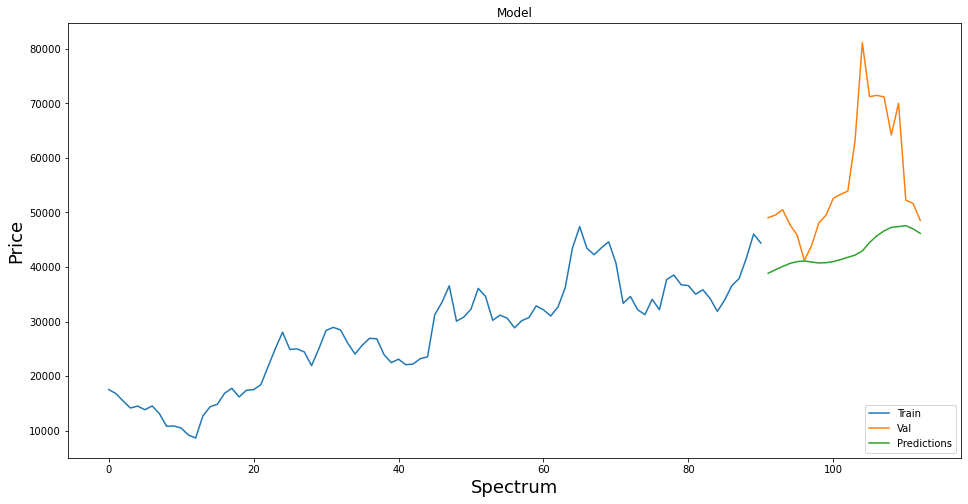

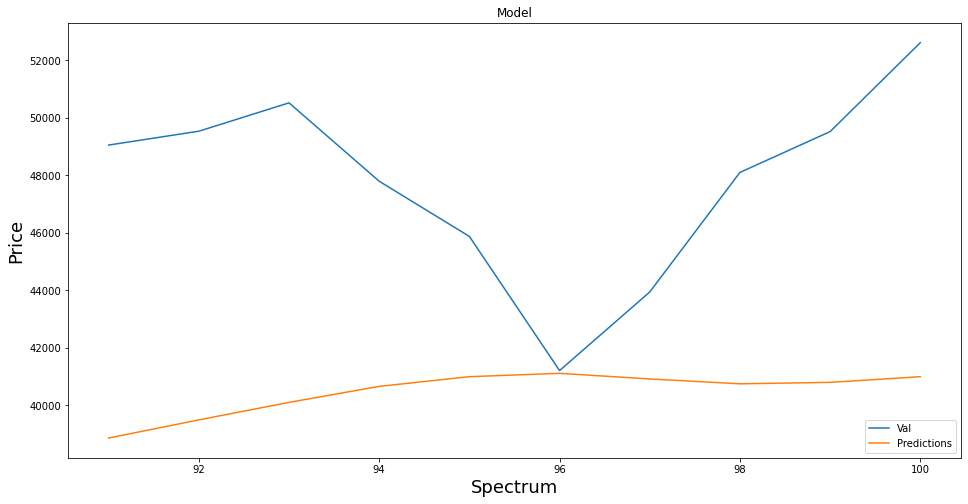

INFO:tensorflow:Assets written to: models/model_crypto_yfiust/assets


INFO:tensorflow:Assets written to: models/model_crypto_yfiust/assets


Error on yfiust!
Error on rcnusd!
Epoch 1/10
187/187 [==============================] - 6s 21ms/step - loss: 0.0174 - mse: 0.0174 - mae: 0.0816 - mape: 105703.3999
Epoch 2/10
187/187 [==============================] - 4s 20ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0506 - mape: 79075.1721
Epoch 3/10
187/187 [==============================] - 4s 21ms/step - loss: 0.0041 - mse: 0.0041 - mae: 0.0478 - mape: 110183.1922
Epoch 4/10
187/187 [==============================] - 4s 20ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0348 - mape: 146351.1579
Epoch 5/10
187/187 [==============================] - 4s 20ms/step - loss: 0.0018 - mse: 0.0018 - mae: 0.0288 - mape: 692.6991
Epoch 6/10
187/187 [==============================] - 4s 23ms/step - loss: 0.0026 - mse: 0.0026 - mae: 0.0331 - mape: 183820.2621
Epoch 7/10
187/187 [==============================] - 5s 26ms/step - loss: 0.0027 - mse: 0.0027 - mae: 0.0330 - mape: 169635.7262
Epoch 8/10
187/187 [==============================] - 5s 28m

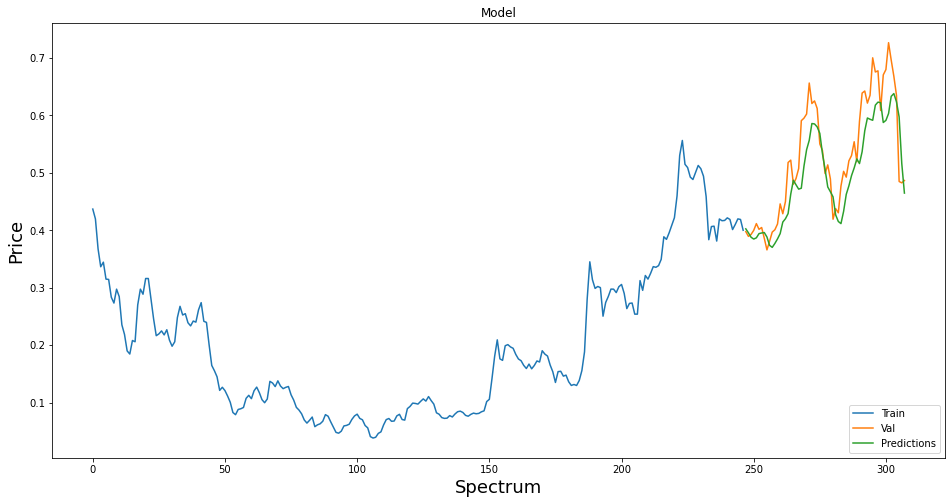

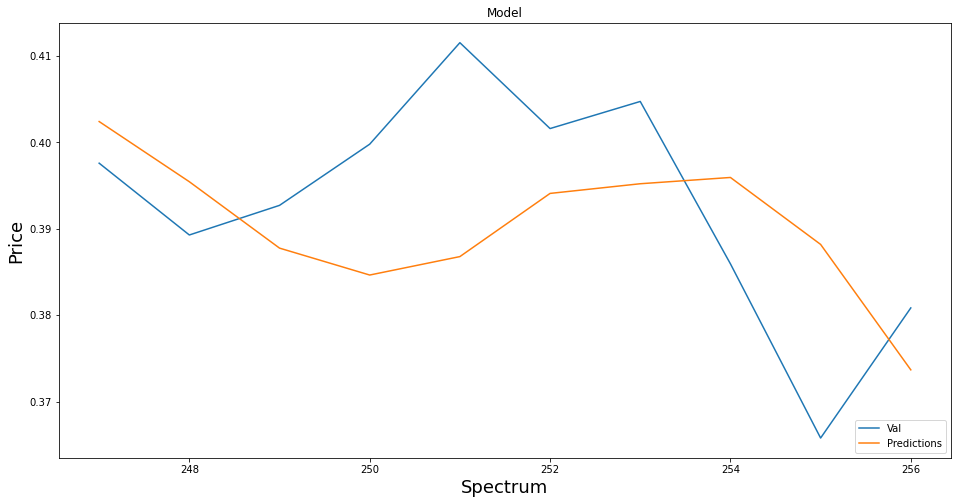

INFO:tensorflow:Assets written to: models/model_crypto_xlmusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_xlmusd/assets


Error on xlmusd!
Error on omnusd!
Epoch 1/10
2620/2620 [==============================] - 70s 26ms/step - loss: 2.9548e-04 - mse: 2.9548e-04 - mae: 0.0110 - mape: 80.9584
Epoch 2/10
2620/2620 [==============================] - 65s 25ms/step - loss: 7.2118e-05 - mse: 7.2118e-05 - mae: 0.0061 - mape: 54.9754
Epoch 3/10
2620/2620 [==============================] - 61s 23ms/step - loss: 5.1070e-05 - mse: 5.1070e-05 - mae: 0.0049 - mape: 41.5396
Epoch 4/10
2620/2620 [==============================] - 65s 25ms/step - loss: 3.0049e-05 - mse: 3.0049e-05 - mae: 0.0039 - mape: 34.2528
Epoch 5/10
2620/2620 [==============================] - 63s 24ms/step - loss: 2.5967e-05 - mse: 2.5967e-05 - mae: 0.0035 - mape: 30.0864 6s - loss: 2.5485e-05 - mse:
Epoch 6/10
2620/2620 [==============================] - 66s 25ms/step - loss: 3.1588e-05 - mse: 3.1588e-05 - mae: 0.0039 - mape: 31.8454
Epoch 7/10
2620/2620 [==============================] - 72s 27ms/step - loss: 3.2176e-05 - mse: 3.2176e-05 - mae: 0

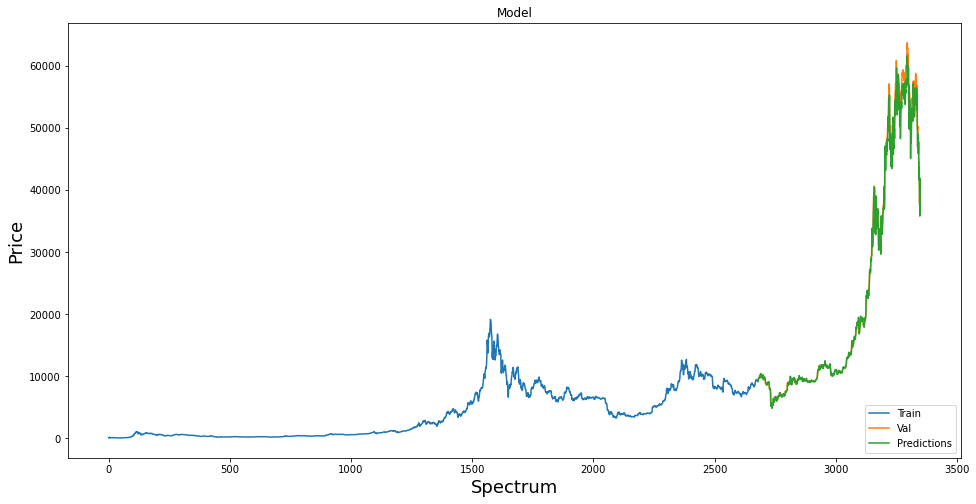

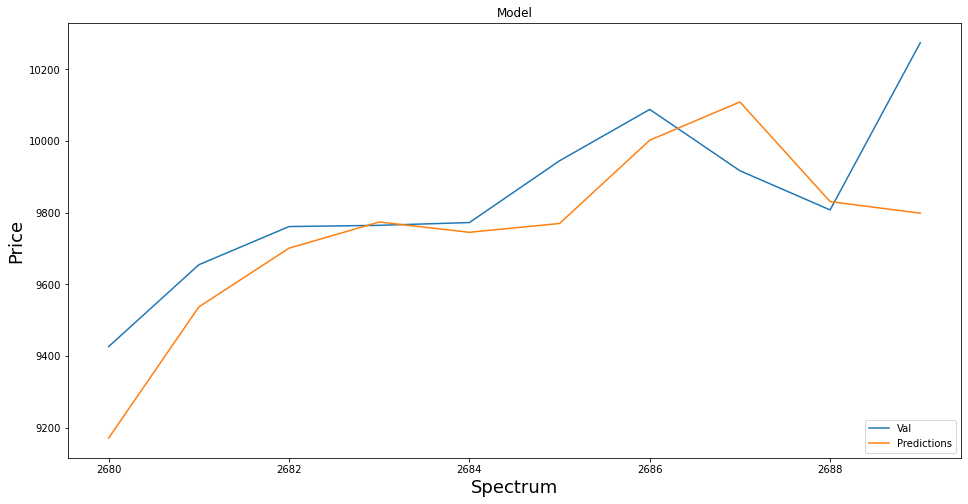

INFO:tensorflow:Assets written to: models/model_crypto_btcusd/assets


INFO:tensorflow:Assets written to: models/model_crypto_btcusd/assets


Error on btcusd!
Error on leoeth!
Error on batbtc!
Epoch 1/10
1192/1227 [============================>.] - ETA: 1s - loss: 0.0047 - mse: 0.0047 - mae: 0.0453 - mape: 2316.4474

In [ ]:
models = {}
rmse = {}
corr = {}
for file in model_files:
    try:
        crypto = file.split(".")[0]
        df = pd.read_csv('data/cryptoStock/{0}.csv'.format(crypto))['close']
        spectrumRatio = 1000
        df = df.groupby(df.index // spectrumRatio).mean().to_frame()
        df_filtered = df
        perc_train = .8
        models[crypto], rmse[crypto], corr[crypto] = m.modelBase(df_filtered, 60, perc_train, 10, True)
        models[crypto].save('models/model_crypto_{0}'.format(crypto))
        df_test = df_filtered.tail(math.ceil(df_filtered.shape[0] * 1 - perc_train))
        accuracy[crypto] = rmse[crypto] / (df_test.max() - df_test.min())
        print("Accuracy: {0}".format(accuracy[crypto]))
    except:
        print("Error on {0}!".format(crypto))
a_file = open("dictionaries/rmse_crypto.pkl", "wb")
pickle.dump(rmse, a_file)
a_file.close()
a_file = open("dictionaries/corr_crypto.pkl", "wb")
pickle.dump(corr, a_file)
a_file.close()

In [4]:
model_files[0]

'xrpusd.csv'

In [ ]:
df = pd.read_csv('data/cryptoStock/{0}'.format(model_files[0]))['close']
spectrumRatio = 1000
df = df.groupby(df.index // spectrumRatio).mean().to_frame()
df_filtered = df
m.modelBase(df_filtered, 60, .8, 13, True)

Epoch 1/13


In [ ]:
crypto = file.split(".")[0]
df = pd.read_csv('data/cryptoStock/{0}.csv'.format(crypto))['close']
spectrumRatio = 1000
df = df.groupby(df.index // spectrumRatio).mean().to_frame()
df_filtered = df
perc_train = .8
models[crypto], rmse[crypto] = m.modelBase(df_filtered, 60, perc_train, 13, True)
models[crypto].save('models/model_crypto_{0}'.format(crypto))
df_test = df_filtered.tail(math.ceil(df_filtered.shape[0] * 1 - perc_train))
accuracy[crypto] = rmse[crypto] / (df_test.max() - df_test.min())
print("Accuracy: {0}".format(accuracy[crypto]))

In [5]:
import pickle
file = open("dictionaries/rmse_crypto.pkl", "rb")
rmse = pickle.load(file)
accuracy = {}

for file in model_files:
    try:
        crypto = file.split(".")[0]
        df = pd.read_csv('data/cryptoStock/{0}.csv'.format(crypto))['close']
        spectrumRatio = 1000
        df = df.groupby(df.index // spectrumRatio).mean().to_frame()
        df_filtered = df
        df_test = df_filtered.tail(math.ceil(df_filtered.shape[0] * 1 - .8))
        accuracy[crypto] = rmse[crypto] / (df_test.max() - df_test.min())
        print('{0} done!'.format(file))
    except:
        print('Error on {0}'.format(file))
a_file = open("dictionaries/accuracy_crypto.pkl", "wb")
pickle.dump(accuracy, a_file)
a_file.close()

xrpusd.csv done!
Error on oxyust.csv
Error on waxusd.csv
ethust.csv done!
Error on astusd.csv
Error on eusbtc.csv
vsyusd.csv done!
eosusd.csv done!
Error on edoeth.csv
Error on pnketh.csv
dshbtc.csv done!
Error on okbust.csv
Error on chzusd.csv
Error on daibtc.csv
Error on dappust.csv
Error on mlnusd.csv
Error on iotf0ustf0.csv
iotbtc.csv done!
Error on dogusd.csv
trxeth.csv done!
Error on balust.csv
Error on xautusd.csv
Error on genusd.csv
Error on jstusd.csv
Error on swmusd.csv
Error on bmiust.csv
eoseth.csv done!
Error on essusd.csv
eosgbp.csv done!
Error on dogeusd.csv
Error on pnkusd.csv
edousd.csv done!
zecusd.csv done!
Error on fetust.csv
ampusd.csv done!
eosjpy.csv done!
trxusd.csv done!
Error on egldusd.csv
zbtusd.csv done!
Error on xautust.csv
Error on balusd.csv
Error on xautf0btcf0.csv
Error on dogust.csv
neoeth.csv done!
Error on europe50ixf0ustf0.csv
Error on eosf0ustf0.csv
Error on dappusd.csv
Error on neogbp.csv
pluusd.csv done!
Error on neceth.csv
etpusd.csv done!
Erro

In [ ]:

crypto = 'ethbtc'
df = pd.read_csv('data/cryptoStock/{0}.csv'.format(crypto))['close']
spectrumRatio = 1
df = df.groupby(df.index // spectrumRatio).mean().to_frame()
df_filtered = df
from classes import ethData, models
m = models.models()
model = m.modelBase(df_filtered, 120, .9, 10, True)
model.save('models/model_crypto_{0}'.format(crypto))

In [6]:
print(accuracy)

{'xrpusd': close    0.002083
dtype: float64, 'ethust': close    0.012087
dtype: float64, 'vsyusd': close    0.009604
dtype: float64, 'eosusd': close    0.002577
dtype: float64, 'dshbtc': close    0.010538
dtype: float64, 'iotbtc': close    0.009882
dtype: float64, 'trxeth': close    0.045121
dtype: float64, 'eoseth': close    0.016859
dtype: float64, 'eosgbp': close    0.177952
dtype: float64, 'edousd': close    0.048615
dtype: float64, 'zecusd': close    0.005418
dtype: float64, 'ampusd': close    0.088416
dtype: float64, 'eosjpy': close    0.168074
dtype: float64, 'trxusd': close    0.107609
dtype: float64, 'zbtusd': close    0.003568
dtype: float64, 'neoeth': close    0.006023
dtype: float64, 'pluusd': close    0.055916
dtype: float64, 'etpusd': close    0.013925
dtype: float64, 'eosust': close    0.088197
dtype: float64, 'ustusd': close    0.002365
dtype: float64, 'ethusd': close    0.007907
dtype: float64, 'batusd': close    0.152605
dtype: float64, 'xrpust': close    0.100248
dty

In [ ]:
import pickle
a_file = open("dictionaries/rmse_crypto.pkl", "wb")
pickle.dump(rmse, a_file)
a_file.close()